<a href="https://colab.research.google.com/github/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/blob/main/fraudet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

def detectar_corrupcion(transacciones, umbral_monto, umbral_frecuencia):
    """
    Detecta posibles transacciones sospechosas de corrupción.

    Args:
        transacciones (pd.DataFrame): DataFrame con datos de transacciones.
        umbral_monto (float): Monto máximo permitido para transacciones sospechosas.
        umbral_frecuencia (int): Frecuencia máxima permitida de transacciones sospechosas.

    Returns:
        pd.DataFrame: DataFrame con transacciones sospechosas.
    """

    # 1. Filtra transacciones por monto
    transacciones_sospechosas_monto = transacciones[transacciones['monto'] > umbral_monto]

    # 2. Agrupa transacciones por beneficiario y cuenta la frecuencia
    frecuencia_transacciones = transacciones_sospechosas_monto.groupby('beneficiario').size()

    # 3. Filtra beneficiarios con alta frecuencia de transacciones
    beneficiarios_sospechosos = frecuencia_transacciones[frecuencia_transacciones > umbral_frecuencia].index

    # 4. Filtra transacciones sospechosas por beneficiario
    transacciones_sospechosas_frecuencia = transacciones_sospechosas_monto[transacciones_sospechosas_monto['beneficiario'].isin(beneficiarios_sospechosos)]

    # 5. Combina resultados
    transacciones_sospechosas = pd.concat([transacciones_sospechosas_monto, transacciones_sospechosas_frecuencia]).drop_duplicates()

    return transacciones_sospechosas

# Ejemplo de uso
datos = {
    'fecha': ['2023-10-26', '2023-10-27', '2023-10-28', '2023-10-29', '2023-10-30', '2023-10-31'],
    'beneficiario': ['Empresa A', 'Empresa B', 'Empresa A', 'Empresa C', 'Empresa A', 'Empresa D'],
    'monto': [1000, 500, 1500, 200, 1200, 800]
}

transacciones = pd.DataFrame(datos)

umbral_monto = 1000
umbral_frecuencia = 2

transacciones_sospechosas = detectar_corrupcion(transacciones, umbral_monto, umbral_frecuencia)

print(transacciones_sospechosas)

        fecha beneficiario  monto
2  2023-10-28    Empresa A   1500
4  2023-10-30    Empresa A   1200


Explicación:

Filtro por monto: Identifica transacciones que superan un monto predefinido, ya que podrían indicar pagos irregulares.
Frecuencia de transacciones: Cuenta cuántas veces se repiten las transacciones para cada beneficiario.
Filtro por frecuencia: Selecciona beneficiarios que reciben transacciones con una frecuencia inusualmente alta.
Combinación de resultados: Une las transacciones sospechosas por monto y por frecuencia para obtener una lista completa.
Consideraciones importantes:

Este algoritmo es solo un punto de partida. Un sistema real debería incluir análisis de datos más sofisticados, como:
Análisis de redes para detectar relaciones ocultas entre beneficiarios.
Uso de machine learning para identificar patrones complejos de corrupción.
Integración con otras fuentes de datos (registros públicos, etc.).
Los umbrales (monto y frecuencia) deben ajustarse según el contexto y los datos disponibles.
Es importante tener en cuenta que una transacción marcada como sospechosa, no implica que sea corrupta, simplemente es una alerta para ser revisada por un auditor.







In [ ]:
import pandas as pd
import numpy as np

def detectar_fraude_empleados(registros_acceso, registros_gastos, umbral_accesos, umbral_gastos):
    """
    Detecta posibles fraudes de empleados analizando registros de acceso y gastos.

    Args:
        registros_acceso (pd.DataFrame): DataFrame con registros de acceso de empleados.
        registros_gastos (pd.DataFrame): DataFrame con registros de gastos de empleados.
        umbral_accesos (int): Número máximo de accesos sospechosos permitidos.
        umbral_gastos (float): Monto máximo de gastos sospechosos permitidos.

    Returns:
        pd.DataFrame: DataFrame con empleados sospechosos de fraude.
    """

    # 1. Analiza registros de acceso
    accesos_inusuales = registros_acceso.groupby('empleado').size()
    empleados_accesos_sospechosos = accesos_inusuales[accesos_inusuales > umbral_accesos].index

    # 2. Analiza registros de gastos
    gastos_inusuales = registros_gastos.groupby('empleado')['monto'].sum()
    empleados_gastos_sospechosos = gastos_inusuales[gastos_inusuales > umbral_gastos].index

    # 3. Combina resultados
    empleados_sospechosos = np.union1d(empleados_accesos_sospechosos, empleados_gastos_sospechosos)

    # 4. Crea DataFrame con información de empleados sospechosos
    datos_sospechosos = {
        'empleado': empleados_sospechosos,
        'accesos_inusuales': [accesos_inusuales.get(e, 0) for e in empleados_sospechosos],
        'gastos_inusuales': [gastos_inusuales.get(e, 0) for e in empleados_sospechosos]
    }
    df_sospechosos = pd.DataFrame(datos_sospechosos)

    return df_sospechosos

# Ejemplo de uso
registros_acceso = pd.DataFrame({
    'empleado': ['Juan', 'María', 'Juan', 'Pedro', 'María', 'Juan'],
    'fecha': ['2023-10-26', '2023-10-27', '2023-10-28', '2023-10-29', '2023-10-30', '2023-10-31']
})

registros_gastos = pd.DataFrame({
    'empleado': ['Juan', 'María', 'Pedro', 'Ana'],
    'monto': [500, 1200, 800, 200]
})

umbral_accesos = 3
umbral_gastos = 1000

empleados_sospechosos = detectar_fraude_empleados(registros_acceso, registros_gastos, umbral_accesos, umbral_gastos)

print(empleados_sospechosos)

  empleado  accesos_inusuales  gastos_inusuales
0    María                  2              1200


Explicación:

Análisis de registros de acceso: Cuenta el número de accesos por empleado y detecta aquellos con una frecuencia inusualmente alta.
Análisis de registros de gastos: Suma los gastos por empleado y detecta aquellos con montos inusualmente altos.
Combinación de resultados: Identifica a los empleados que aparecen en ambas listas de sospechosos.
Creación de DataFrame: Crea un DataFrame con la información de los empleados sospechosos, incluyendo el número de accesos y gastos inusuales.
Consideraciones importantes:

Este algoritmo es solo un punto de partida. Un sistema real debería incluir análisis de datos más sofisticados, como:
Análisis de patrones de acceso (horas, ubicaciones, etc.).
Análisis de tipos de gastos (proveedores, categorías, etc.).
Uso de machine learning para identificar patrones complejos de fraude.
Integración con otras fuentes de datos (registros de nómina, etc.).
Los umbrales (accesos y gastos) deben ajustarse según el contexto y los datos disponibles.
Es importante tener en cuenta que un empleado marcado como sospechoso, no implica que sea culpable de fraude, simplemente es una alerta para ser revisada por un auditor.

In [ ]:


import pandas as pd
import numpy as np

def detectar_fraude_directorio(registros_financieros, registros_reuniones, umbral_gastos, umbral_reuniones):
    """
    Detecta posibles fraudes de directorio analizando registros financieros y reuniones.

    Args:
        registros_financieros (pd.DataFrame): DataFrame con registros de gastos del directorio.
        registros_reuniones (pd.DataFrame): DataFrame con registros de asistencia a reuniones.
        umbral_gastos (float): Monto máximo de gastos sospechosos permitidos.
        umbral_reuniones (int): Número mínimo de reuniones a las que se debe asistir.

    Returns:
        pd.DataFrame: DataFrame con miembros del directorio sospechosos de fraude.
    """

    # 1. Analiza registros financieros
    gastos_inusuales = registros_financieros.groupby('miembro_directorio')['monto'].sum()
    miembros_gastos_sospechosos = gastos_inusuales[gastos_inusuales > umbral_gastos].index

    # 2. Analiza registros de reuniones
    asistencia_reuniones = registros_reuniones.groupby('miembro_directorio').size()
    miembros_asistencia_sospechosos = asistencia_reuniones[asistencia_reuniones < umbral_reuniones].index

    # 3. Combina resultados
    miembros_sospechosos = np.union1d(miembros_gastos_sospechosos, miembros_asistencia_sospechosos)

    # 4. Crea DataFrame con información de miembros sospechosos
    datos_sospechosos = {
        'miembro_directorio': miembros_sospechosos,
        'gastos_inusuales': [gastos_inusuales.get(m, 0) for m in miembros_sospechosos],
        'asistencia_reuniones': [asistencia_reuniones.get(m, 0) for m in miembros_sospechosos]
    }
    df_sospechosos = pd.DataFrame(datos_sospechosos)

    return df_sospechosos

# Ejemplo de uso
registros_financieros = pd.DataFrame({
    'miembro_directorio': ['Ana', 'Carlos', 'Ana', 'David'],
    'monto': [1500, 800, 1200, 200]
})

registros_reuniones = pd.DataFrame({
    'miembro_directorio': ['Ana', 'Carlos', 'David'],
    'fecha': ['2023-10-26', '2023-10-27', '2023-10-28']
})

umbral_gastos = 1000
umbral_reuniones = 2

miembros_sospechosos = detectar_fraude_directorio(registros_financieros, registros_reuniones, umbral_gastos, umbral_reuniones)

print(miembros_sospechosos)

  miembro_directorio  gastos_inusuales  asistencia_reuniones
0                Ana              2700                     1
1             Carlos               800                     1
2              David               200                     1


Explicación:

Análisis de registros financieros: Suma los gastos por miembro del directorio y detecta aquellos con montos inusualmente altos.
Análisis de registros de reuniones: Cuenta el número de reuniones a las que asistió cada miembro y detecta aquellos con baja asistencia.
Combinación de resultados: Identifica a los miembros que aparecen en ambas listas de sospechosos.
Creación de DataFrame: Crea un DataFrame con la información de los miembros sospechosos, incluyendo los gastos inusuales y la asistencia a reuniones.
Consideraciones importantes:

Este algoritmo es un punto de partida. Un sistema real debería incluir análisis de datos más sofisticados, como:
Análisis de patrones de gastos (tipos de gastos, proveedores, etc.).
Análisis de justificación de gastos.
Análisis de conflictos de interés.
Uso de machine learning para identificar patrones complejos de fraude.
Integración con otras fuentes de datos (registros de transacciones de la empresa, etc.).
Los umbrales (gastos y reuniones) deben ajustarse según el contexto y los datos disponibles.
Es importante tener en cuenta que un miembro marcado como sospechoso, no implica que sea culpable de fraude, simplemente es una alerta para ser revisada por un auditor.

In [ ]:


import pandas as pd
import numpy as np

def detectar_fraude_compras(registros_compras, umbral_monto, umbral_frecuencia, umbral_proveedores):
    """
    Detecta posibles fraudes en compras analizando registros de compras.

    Args:
        registros_compras (pd.DataFrame): DataFrame con registros de compras.
        umbral_monto (float): Monto máximo de compras sospechosas permitidas.
        umbral_frecuencia (int): Frecuencia máxima de compras sospechosas permitidas.
        umbral_proveedores (int): Número máximo de proveedores sospechosos permitidos.

    Returns:
        pd.DataFrame: DataFrame con compras sospechosas de fraude.
    """

    # 1. Analiza compras por monto
    compras_montos_sospechosas = registros_compras[registros_compras['monto'] > umbral_monto]

    # 2. Analiza frecuencia de compras por empleado
    frecuencia_compras = registros_compras.groupby('empleado').size()
    empleados_frecuencia_sospechosos = frecuencia_compras[frecuencia_compras > umbral_frecuencia].index

    # 3. Analiza número de proveedores por empleado
    proveedores_compras = registros_compras.groupby('empleado')['proveedor'].nunique()
    empleados_proveedores_sospechosos = proveedores_compras[proveedores_compras > umbral_proveedores].index

    # 4. Combina resultados
    empleados_sospechosos = np.union1d(empleados_frecuencia_sospechosos, empleados_proveedores_sospechosos)
    compras_sospechosas = registros_compras[registros_compras['empleado'].isin(empleados_sospechosos)]

    # 5. Combina compras sospechosas por monto y por empleado
    compras_sospechosas = pd.concat([compras_montos_sospechosas, compras_sospechosas]).drop_duplicates()

    return compras_sospechosas

# Ejemplo de uso
registros_compras = pd.DataFrame({
    'empleado': ['Ana', 'Carlos', 'Ana', 'David', 'Ana', 'Carlos'],
    'proveedor': ['Proveedor A', 'Proveedor B', 'Proveedor C', 'Proveedor A', 'Proveedor D', 'Proveedor E'],
    'monto': [1500, 800, 1200, 200, 1000, 500]
})

umbral_monto = 1000
umbral_frecuencia = 2
umbral_proveedores = 3

compras_sospechosas = detectar_fraude_compras(registros_compras, umbral_monto, umbral_frecuencia, umbral_proveedores)

print(compras_sospechosas)

  empleado    proveedor  monto
0      Ana  Proveedor A   1500
2      Ana  Proveedor C   1200
4      Ana  Proveedor D   1000


Explicación:

Análisis de compras por monto: Detecta compras que superan un monto predefinido.
Análisis de frecuencia de compras: Cuenta el número de compras por empleado y detecta aquellos con alta frecuencia.
Análisis de número de proveedores: Cuenta el número de proveedores utilizados por cada empleado y detecta aquellos con muchos proveedores.
Combinación de resultados: Identifica a los empleados que aparecen en las listas de sospechosos por frecuencia y proveedores.
Combinación de compras sospechosas: Une las compras sospechosas por monto y por empleado para obtener una lista completa.
Consideraciones importantes:

Este algoritmo es un punto de partida. Un sistema real debería incluir análisis de datos más sofisticados, como:
Análisis de patrones de compras (tipos de productos, horarios, etc.).
Análisis de justificación de compras.
Análisis de relaciones entre empleados y proveedores.
Uso de machine learning para identificar patrones complejos de fraude.
Integración con otras fuentes de datos (registros de inventario, etc.).
Los umbrales (monto, frecuencia y proveedores) deben ajustarse según el contexto y los datos disponibles.
Es importante tener en cuenta que una compra marcada como sospechosa, no implica que sea fraudulenta, simplemente es una alerta para ser revisada por un auditor.

In [ ]:
import pandas as pd

def comparar_precios_compra(registros_precios):
    """
    Compara precios de compra entre proveedores y selecciona la mejor opción.

    Args:
        registros_precios (pd.DataFrame): DataFrame con registros de precios de compra.

    Returns:
        pd.DataFrame: DataFrame con la mejor opción de compra para cada producto.
    """

    # 1. Agrupa los precios por producto y proveedor
    precios_agrupados = registros_precios.groupby(['producto', 'proveedor'])['precio'].min().reset_index()

    # 2. Encuentra el precio mínimo para cada producto
    mejor_opcion = precios_agrupados.loc[precios_agrupados.groupby('producto')['precio'].idxmin()]

    return mejor_opcion

# Ejemplo de uso
registros_precios = pd.DataFrame({
    'producto': ['Producto A', 'Producto B', 'Producto A', 'Producto C', 'Producto B'],
    'proveedor': ['Proveedor 1', 'Proveedor 2', 'Proveedor 3', 'Proveedor 1', 'Proveedor 3'],
    'precio': [100, 150, 90, 200, 140]
})

mejor_opcion_compra = comparar_precios_compra(registros_precios)

print(mejor_opcion_compra)

     producto    proveedor  precio
1  Producto A  Proveedor 3      90
3  Producto B  Proveedor 3     140
4  Producto C  Proveedor 1     200


Explicación:

Agrupación de precios: Agrupa los registros de precios por producto y proveedor, y selecciona el precio mínimo para cada combinación.
Precio mínimo por producto: Encuentra el proveedor con el precio mínimo para cada producto.
DataFrame con mejor opción: Crea un DataFrame con la mejor opción de compra para cada producto, incluyendo el producto, el proveedor y el precio.
Consideraciones importantes:

Este código asume que tienes un DataFrame con los registros de precios de compra, incluyendo las columnas 'producto', 'proveedor' y 'precio'.
Puedes adaptar este código para incluir otros criterios de selección, como la calidad del proveedor, el tiempo de entrega, etc.
Si tienes grandes volúmenes de datos, puedes utilizar bibliotecas como Dask o Spark para paralelizar el procesamiento y mejorar el rendimiento.
Es importante mantener actualizados los registros de precios para garantizar que la comparación sea precisa.

In [ ]:
import pandas as pd

def comparar_precios_externos(registros_precios_internos, registros_precios_externos):
    """
    Compara precios de compra con una lista de precios externa y resalta las diferencias.

    Args:
        registros_precios_internos (pd.DataFrame): DataFrame con registros de precios de compra internos.
        registros_precios_externos (pd.DataFrame): DataFrame con registros de precios de compra externos.

    Returns:
        pd.DataFrame: DataFrame con las diferencias de precios.
    """

    # 1. Combina los DataFrames por producto
    precios_combinados = pd.merge(registros_precios_internos, registros_precios_externos, on='producto', suffixes=('_interno', '_externo'))

    # 2. Calcula la diferencia de precios
    precios_combinados['diferencia_precio'] = precios_combinados['precio_interno'] - precios_combinados['precio_externo']

    # 3. Filtra las diferencias de precios
    diferencias_precios = precios_combinados[precios_combinados['diferencia_precio'] != 0]

    return diferencias_precios

# Ejemplo de uso
registros_precios_internos = pd.DataFrame({
    'producto': ['Producto A', 'Producto B', 'Producto C'],
    'precio_interno': [100, 150, 200]
})

registros_precios_externos = pd.DataFrame({
    'producto': ['Producto A', 'Producto B', 'Producto C'],
    'precio_externo': [90, 160, 200]
})

diferencias_precios = comparar_precios_externos(registros_precios_internos, registros_precios_externos)

print(diferencias_precios)


     producto  precio_interno  precio_externo  diferencia_precio
0  Producto A             100              90                 10
1  Producto B             150             160                -10


Explicación:

Combinación de DataFrames: Combina los DataFrames de precios internos y externos utilizando la columna 'producto' como clave.
Cálculo de diferencia de precios: Calcula la diferencia entre los precios internos y externos para cada producto.
Filtrado de diferencias: Filtra las filas donde la diferencia de precios es distinta de cero.
DataFrame con diferencias: Crea un DataFrame con las diferencias de precios, incluyendo el producto, los precios internos y externos, y la diferencia.
Consideraciones importantes:

Este código asume que tienes dos DataFrames con registros de precios, uno interno y otro externo, y que ambos tienen una columna llamada 'producto' que se utiliza para combinar los DataFrames.
Puedes adaptar este código para incluir otros criterios de comparación, como la calidad del producto, el tiempo de entrega, etc.
Si tienes grandes volúmenes de datos, puedes utilizar bibliotecas como Dask o Spark para paralelizar el procesamiento y mejorar el rendimiento.
Es importante mantener actualizadas las listas de precios internas y externas para garantizar que la comparación sea precisa

In [ ]:
import pandas as pd
import numpy as np

def detectar_fraude_creditos(registros_creditos, umbral_monto, umbral_plazo, umbral_ingresos):
    """
    Detecta posibles fraudes de créditos analizando registros de créditos.

    Args:
        registros_creditos (pd.DataFrame): DataFrame con registros de créditos.
        umbral_monto (float): Monto máximo de créditos sospechosos permitidos.
        umbral_plazo (int): Plazo máximo de créditos sospechosos permitidos.
        umbral_ingresos (float): Ingresos mínimos requeridos para créditos sospechosos.

    Returns:
        pd.DataFrame: DataFrame con créditos sospechosos de fraude.
    """

    # 1. Analiza créditos por monto
    creditos_montos_sospechosos = registros_creditos[registros_creditos['monto'] > umbral_monto]

    # 2. Analiza créditos por plazo
    creditos_plazos_sospechosos = registros_creditos[registros_creditos['plazo'] > umbral_plazo]

    # 3. Analiza créditos por ingresos del solicitante
    creditos_ingresos_sospechosos = registros_creditos[registros_creditos['ingresos'] < umbral_ingresos]

    # 4. Combina resultados
    creditos_sospechosos = pd.concat([creditos_montos_sospechosos, creditos_plazos_sospechosos, creditos_ingresos_sospechosos]).drop_duplicates()

    return creditos_sospechosos

# Ejemplo de uso
registros_creditos = pd.DataFrame({
    'cliente': ['Ana', 'Carlos', 'Ana', 'David', 'Ana', 'Carlos'],
    'monto': [1500, 800, 1200, 200, 1000, 500],
    'plazo': [12, 6, 18, 3, 24, 10],
    'ingresos': [2000, 1500, 1800, 1000, 2500, 1200]
})

umbral_monto = 1000
umbral_plazo = 18
umbral_ingresos = 1500

creditos_sospechosos = detectar_fraude_creditos(registros_creditos, umbral_monto, umbral_plazo, umbral_ingresos)

print(creditos_sospechosos)

  cliente  monto  plazo  ingresos
0     Ana   1500     12      2000
2     Ana   1200     18      1800
4     Ana   1000     24      2500
3   David    200      3      1000
5  Carlos    500     10      1200


Explicación:

Análisis de créditos por monto: Detecta créditos que superan un monto predefinido.
Análisis de créditos por plazo: Detecta créditos que tienen un plazo inusualmente largo.
Análisis de créditos por ingresos: Detecta créditos otorgados a solicitantes con ingresos insuficientes.
Combinación de resultados: Combina los créditos sospechosos por monto, plazo e ingresos para obtener una lista completa.
Consideraciones importantes:

Este algoritmo es un punto de partida. Un sistema real debería incluir análisis de datos más sofisticados, como:
Análisis de patrones de comportamiento de los solicitantes.
Análisis de la información crediticia de los solicitantes.
Uso de machine learning para identificar patrones complejos de fraude.
Integración con otras fuentes de datos (registros de transacciones, etc.).
Los umbrales (monto, plazo e ingresos) deben ajustarse según el contexto y los datos disponibles.
Es importante tener en cuenta que un crédito marcado como sospechoso, no implica que sea fraudulento, simplemente es una alerta para ser revisada por un analista de crédito.
Recomendaciones adicionales:

Implementa un sistema de gestión de riesgos de crédito que incluya políticas y procedimientos claros para la evaluación y aprobación de créditos.
Capacita a tu personal en la detección de fraudes de crédito.
Realiza auditorías periódicas de tus procesos de crédito.
Mantente actualizado sobre las últimas tendencias en fraudes de crédito.







In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest

def detectar_anomalias_compras(registros_compras, umbral_anomalia):
    """
    Detecta anomalías en compras utilizando Isolation Forest.

    Args:
        registros_compras (pd.DataFrame): DataFrame con registros de compras.
        umbral_anomalia (float): Umbral para considerar una compra como anomalía.

    Returns:
        pd.DataFrame: DataFrame con compras sospechosas de fraude.
    """

    # 1. Selecciona las columnas relevantes para el análisis
    columnas_analisis = ['monto', 'cantidad', 'precio_unitario']
    datos_analisis = registros_compras[columnas_analisis]

    # 2. Entrena el modelo Isolation Forest
    modelo = IsolationForest(contamination=umbral_anomalia)
    modelo.fit(datos_analisis)

    # 3. Predice las anomalías
    anomalias = modelo.predict(datos_analisis)

    # 4. Agrega las predicciones al DataFrame original
    registros_compras['anomalia'] = anomalias

    # 5. Filtra las compras sospechosas
    compras_sospechosas = registros_compras[registros_compras['anomalia'] == -1]

    return compras_sospechosas

# Ejemplo de uso
registros_compras = pd.DataFrame({
    'monto': [100, 200, 150, 1000, 120, 180],
    'cantidad': [10, 20, 15, 5, 12, 18],
    'precio_unitario': [10, 10, 10, 200, 10, 10]
})

umbral_anomalia = 0.1

compras_sospechosas = detectar_anomalias_compras(registros_compras, umbral_anomalia)

print(compras_sospechosas)

   monto  cantidad  precio_unitario  anomalia
3   1000         5              200        -1


##creditos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def detectar_fraude_creditos(registros_creditos, umbral_prediccion):
    """
    Detecta fraude en créditos utilizando regresión logística.

    Args:
        registros_creditos (pd.DataFrame): DataFrame con registros de créditos.
        umbral_prediccion (float): Umbral para considerar un crédito como fraudulento.

    Returns:
        pd.DataFrame: DataFrame con créditos sospechosos de fraude.
    """

    # 1. Selecciona las columnas relevantes para el análisis
    columnas_analisis = ['monto', 'plazo', 'ingresos']
    datos_analisis = registros_creditos[columnas_analisis]

    # 2. Divide los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(datos_analisis, registros_creditos['fraude'], test_size=0.2)

    # 3. Entrena el modelo de regresión logística
    modelo = LogisticRegression()
    modelo.fit(X_train, y_train)

    # 4. Predice la probabilidad de fraude
    probabilidades_fraude = modelo.predict_proba(X_test)[:, 1]

    # 5. Agrega las predicciones al DataFrame de prueba
    X_test['probabilidad_fraude'] = probabilidades_fraude

    # 6. Filtra los créditos sospechosos
    creditos_sospechosos = X_test[X_test['probabilidad_fraude'] > umbral_prediccion]

    return creditos_sospechosos

# Ejemplo de uso
registros_creditos = pd.DataFrame({
    'monto': [1000, 2000, 1500, 5000, 1200, 1800],
    'plazo': [12, 24, 18, 6, 12, 24],
    'ingresos': [2000, 3000, 2500, 1000, 2000, 3000],
    'fraude': [0, 0, 0, 1, 0, 0]
})

umbral_prediccion = 0.8

creditos_sospechosos = detectar_fraude_creditos(registros_creditos, umbral_prediccion)

print(creditos_sospechosos)

Empty DataFrame
Columns: [monto, plazo, ingresos, probabilidad_fraude]
Index: []


In [ ]:
import pandas as pd

def comparar_precios_externos(registros_precios_internos, registros_precios_externos):
    """
    Compara precios de compra con una lista de precios externa y resalta las diferencias.

    Args:
        registros_precios_internos (pd.DataFrame): DataFrame con registros de precios de compra internos.
        registros_precios_externos (pd.DataFrame): DataFrame con registros de precios de compra externos.

    Returns:
        pd.DataFrame: DataFrame con las diferencias de precios.
    """

    # 1. Combina los DataFrames por producto
    precios_combinados = pd.merge(registros_precios_internos, registros_precios_externos, on='producto', suffixes=('_interno', '_externo'))

    # 2. Calcula la diferencia de precios
    precios_combinados['diferencia_precio'] = precios_combinados['precio_interno'] - precios_combinados['precio_externo']

    # 3. Filtra las diferencias de precios
    diferencias_precios = precios_combinados[precios_combinados['diferencia_precio'] != 0]

    return diferencias_precios

# Ejemplo de uso
registros_precios_internos = pd.DataFrame({
    'producto': ['Producto A', 'Producto B', 'Producto C'],
    'precio_interno': [100, 150, 200]
})

registros_precios_externos = pd.DataFrame({
    'producto': ['Producto A', 'Producto B', 'Producto C'],
    'precio_externo': [90, 160, 200]
})

diferencias_precios = comparar_precios_externos(registros_precios_internos, registros_precios_externos)

print(diferencias_precios)

     producto  precio_interno  precio_externo  diferencia_precio
0  Producto A             100              90                 10
1  Producto B             150             160                -10


Consideraciones importantes:

Estos son solo ejemplos básicos. Puedes adaptarlos y mejorarlos según tus necesidades y los datos disponibles.
Es fundamental contar con datos de calidad y actualizados para obtener resultados precisos.
La implementación de estos algoritmos debe ir acompañada de controles internos y una cultura de ética en la empresa.
Si tienes grandes volúmenes de datos, considera utilizar herramientas de procesamiento de datos más potentes como Spark o Dask.

## deteccion de anomalias de ofertas

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest

def detectar_anomalias_ofertas(registros_ofertas, umbral_anomalia):
    """
    Detecta anomalías en ofertas utilizando Isolation Forest.

    Args:
        registros_ofertas (pd.DataFrame): DataFrame con registros de ofertas.
        umbral_anomalia (float): Umbral para considerar una oferta como anomalía.

    Returns:
        pd.DataFrame: DataFrame con ofertas sospechosas de fraude.
    """

    # 1. Selecciona las columnas relevantes para el análisis
    columnas_analisis = ['monto', 'plazo', 'calificacion_postor']
    datos_analisis = registros_ofertas[columnas_analisis]

    # 2. Entrena el modelo Isolation Forest
    modelo = IsolationForest(contamination=umbral_anomalia)
    modelo.fit(datos_analisis)

    # 3. Predice las anomalías
    anomalias = modelo.predict(datos_analisis)

    # 4. Agrega las predicciones al DataFrame original
    registros_ofertas['anomalia'] = anomalias

    # 5. Filtra las ofertas sospechosas
    ofertas_sospechosas = registros_ofertas[registros_ofertas['anomalia'] == -1]

    return ofertas_sospechosas

# Ejemplo de uso
registros_ofertas = pd.DataFrame({
    'monto': [1000, 2000, 1500, 10000, 1200, 1800],
    'plazo': [12, 24, 18, 6, 12, 24],
    'calificacion_postor': [8, 9, 7, 3, 8, 9]
})

umbral_anomalia = 0.1

ofertas_sospechosas = detectar_anomalias_ofertas(registros_ofertas, umbral_anomalia)

print(ofertas_sospechosas)

   monto  plazo  calificacion_postor  anomalia
3  10000      6                    3        -1


2. Detección de colusión entre postores:

In [ ]:


import pandas as pd
import networkx as nx

def detectar_colusion_postores(registros_ofertas, umbral_similitud):
    """
    Detecta colusión entre postores analizando la similitud de sus ofertas.

    Args:
        registros_ofertas (pd.DataFrame): DataFrame con registros de ofertas.
        umbral_similitud (float): Umbral para considerar dos ofertas como similares.

    Returns:
        list: Lista de pares de postores sospechosos de colusión.
    """

    # 1. Crea un grafo de postores
    grafo = nx.Graph()

    # 2. Compara las ofertas de todos los pares de postores
    postores = registros_ofertas['postor'].unique()
    for i in range(len(postores)):
        for j in range(i + 1, len(postores)):
            postor1 = postores[i]
            postor2 = postores[j]
            ofertas_postor1 = registros_ofertas[registros_ofertas['postor'] == postor1]['monto'].tolist()
            ofertas_postor2 = registros_ofertas[registros_ofertas['postor'] == postor2]['monto'].tolist()
            similitud = calcular_similitud(ofertas_postor1, ofertas_postor2)
            if similitud > umbral_similitud:
                grafo.add_edge(postor1, postor2)

    # 3. Encuentra los componentes conectados del grafo
    componentes_conectados = list(nx.connected_components(grafo))

    # 4. Filtra los componentes con más de un postor
    postores_sospechosos = [componente for componente in componentes_conectados if len(componente) > 1]

    return postores_sospechosos

def calcular_similitud(ofertas1, ofertas2):
    """
    Calcula la similitud entre dos listas de ofertas.

    Args:
        ofertas1 (list): Lista de ofertas del primer postor.
        ofertas2 (list): Lista de ofertas del segundo postor.

    Returns:
        float: Similitud entre las ofertas.
    """

    # Implementa tu propia lógica para calcular la similitud
    # Por ejemplo, puedes utilizar la distancia euclidiana o la correlación de Pearson
    # En este ejemplo, se utiliza una implementación simplificada
    if len(ofertas1) != len(ofertas2):
        return 0
    similitud = 0
    for i in range(len(ofertas1)):
        similitud += abs(ofertas1[i] - ofertas2[i])
    similitud = 1 / (1 + similitud)
    return similitud

# Ejemplo de uso
registros_ofertas = pd.DataFrame({
    'postor': ['A', 'B', 'C', 'D', 'E', 'F'],
    'monto': [1000, 2000, 1500, 1000, 2000, 1500]
})

umbral_similitud = 0.8

postores_sospechosos = detectar_colusion_postores(registros_ofertas, umbral_similitud)

print(postores_sospechosos)

[{'D', 'A'}, {'E', 'B'}, {'F', 'C'}]


# **3. Comparación de precios con lista externa:**

(El código para comparar precios con una lista externa es el mismo que se proporcionó en la respuesta anterior.)

Consideraciones importantes:

Estos son solo ejemplos básicos. Puedes adaptarlos y mejorarlos según tus necesidades y los datos disponibles.
Es fundamental contar con datos de calidad y actualizados para obtener resultados precisos.
La implementación de estos algoritmos debe ir acompañada de controles internos y una cultura de ética en la empresa.
Si tienes grandes volúmenes de datos, considera utilizar herramientas de procesamiento de datos más potentes como Spark o Dask.

## caja

In [ ]:

import pandas as pd
from sklearn.ensemble import IsolationForest

def detectar_anomalias_caja(registros_caja, umbral_anomalia):
    """
    Detecta anomalías en transacciones de caja utilizando Isolation Forest.

    Args:
        registros_caja (pd.DataFrame): DataFrame con registros de transacciones de caja.
        umbral_anomalia (float): Umbral para considerar una transacción como anomalía.

    Returns:
        pd.DataFrame: DataFrame con transacciones sospechosas de fraude.
    """

    # 1. Selecciona las columnas relevantes para el análisis
    columnas_analisis = ['monto', 'hora', 'tipo_transaccion']
    datos_analisis = registros_caja[columnas_analisis]

    # 2. Convierte la columna 'hora' a valores numéricos
    datos_analisis['hora'] = pd.to_datetime(datos_analisis['hora']).dt.hour

    # 3. Codifica la columna 'tipo_transaccion' a valores numéricos
    datos_analisis['tipo_transaccion'] = pd.Categorical(datos_analisis['tipo_transaccion']).codes

    # 4. Entrena el modelo Isolation Forest
    modelo = IsolationForest(contamination=umbral_anomalia)
    modelo.fit(datos_analisis)

    # 5. Predice las anomalías
    anomalias = modelo.predict(datos_analisis)

    # 6. Agrega las predicciones al DataFrame original
    registros_caja['anomalia'] = anomalias

    # 7. Filtra las transacciones sospechosas
    transacciones_sospechosas = registros_caja[registros_caja['anomalia'] == -1]

    return transacciones_sospechosas

# Ejemplo de uso
registros_caja = pd.DataFrame({
    'monto': [100, 200, 150, 1000, 120, 180],
    'hora': ['09:00', '10:00', '11:00', '18:00', '12:00', '13:00'],
    'tipo_transaccion': ['deposito', 'retiro', 'deposito', 'retiro', 'deposito', 'retiro']
})

umbral_anomalia = 0.1

transacciones_sospechosas = detectar_anomalias_caja(registros_caja, umbral_anomalia)

print(transacciones_sospechosas)

<ipython-input-13-4f10fbdc33c2>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos_analisis['hora'] = pd.to_datetime(datos_analisis['hora']).dt.hour


   monto   hora tipo_transaccion  anomalia
3   1000  18:00           retiro        -1


## Deteccion de patrones sospechosos

In [ ]:
import pandas as pd

def detectar_patrones_sospechosos(registros_caja):
    """
    Detecta patrones sospechosos en transacciones de caja.

    Args:
        registros_caja (pd.DataFrame): DataFrame con registros de transacciones de caja.

    Returns:
        pd.DataFrame: DataFrame con transacciones sospechosas de fraude.
    """

    # 1. Busca transacciones con montos inusualmente altos o bajos
    transacciones_montos_inusuales = registros_caja[(registros_caja['monto'] > 1000) | (registros_caja['monto'] < 10)]

    # 2. Busca transacciones fuera de horario
    transacciones_fuera_horario = registros_caja[pd.to_datetime(registros_caja['hora']).dt.hour.isin([0, 1, 2, 3, 4, 5, 6, 22, 23])]

    # 3. Busca transacciones frecuentes con ciertos proveedores o clientes
    proveedores_clientes_frecuentes = registros_caja['proveedor_cliente'].value_counts()
    proveedores_clientes_sospechosos = proveedores_clientes_frecuentes[proveedores_clientes_frecuentes > 10].index
    transacciones_proveedores_clientes_sospechosos = registros_caja[registros_caja['proveedor_cliente'].isin(proveedores_clientes_sospechosos)]

    # 4. Combina los resultados
    transacciones_sospechosas = pd.concat([transacciones_montos_inusuales, transacciones_fuera_horario, transacciones_proveedores_clientes_sospechosos]).drop_duplicates()

    return transacciones_sospechosas

# Ejemplo de uso
registros_caja = pd.DataFrame({
    'monto': [100, 200, 150, 1000, 120, 180, 5000, 5],
    'hora': ['09:00', '10:00', '11:00', '18:00', '12:00', '13:00', '02:00', '23:00'],
    'proveedor_cliente': ['A', 'B', 'A', 'C', 'A', 'B', 'D', 'E']
})

transacciones_sospechosas = detectar_patrones_sospechosos(registros_caja)

print(transacciones_sospechosas)

   monto   hora proveedor_cliente
6   5000  02:00                 D
7      5  23:00                 E


<ipython-input-14-878023de8e49>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transacciones_fuera_horario = registros_caja[pd.to_datetime(registros_caja['hora']).dt.hour.isin([0, 1, 2, 3, 4, 5, 6, 22, 23])]


# **Consideraciones importantes:**

Estos son solo ejemplos básicos. Puedes adaptarlos y mejorarlos según tus necesidades y los datos disponibles.
Es fundamental contar con datos de calidad y actualizados para obtener resultados precisos.
La implementación de estos algoritmos debe ir acompañada de controles internos y una cultura de ética en la empresa.
Si tienes grandes volúmenes de datos, considera utilizar herramientas de procesamiento de datos más potentes como Spark o Dask.

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest

def detectar_anomalias_compras_internacionales(registros_compras, umbral_anomalia):
    """
    Detecta anomalías en compras internacionales utilizando Isolation Forest.

    Args:
        registros_compras (pd.DataFrame): DataFrame con registros de compras internacionales.
        umbral_anomalia (float): Umbral para considerar una compra como anomalía.

    Returns:
        pd.DataFrame: DataFrame con compras sospechosas de fraude.
    """

    # 1. Selecciona las columnas relevantes para el análisis
    columnas_analisis = ['monto', 'cantidad', 'precio_unitario', 'pais_proveedor']
    datos_analisis = registros_compras[columnas_analisis]

    # 2. Codifica la columna 'pais_proveedor' a valores numéricos
    datos_analisis['pais_proveedor'] = pd.Categorical(datos_analisis['pais_proveedor']).codes

    # 3. Entrena el modelo Isolation Forest
    modelo = IsolationForest(contamination=umbral_anomalia)
    modelo.fit(datos_analisis)

    # 4. Predice las anomalías
    anomalias = modelo.predict(datos_analisis)

    # 5. Agrega las predicciones al DataFrame original
    registros_compras['anomalia'] = anomalias

    # 6. Filtra las compras sospechosas
    compras_sospechosas = registros_compras[registros_compras['anomalia'] == -1]

    return compras_sospechosas

# Ejemplo de uso
registros_compras = pd.DataFrame({
    'monto': [100, 200, 150, 1000, 120, 180],
    'cantidad': [10, 20, 15, 5, 12, 18],
    'precio_unitario': [10, 10, 10, 200, 10, 10],
    'pais_proveedor': ['China', 'EEUU', 'China', 'Alemania', 'China', 'EEUU']
})

umbral_anomalia = 0.1

compras_sospechosas = detectar_anomalias_compras_internacionales(registros_compras, umbral_anomalia)

print(compras_sospechosas)

   monto  cantidad  precio_unitario pais_proveedor  anomalia
3   1000         5              200       Alemania        -1


2. Comparación de precios con lista externa internacional:

In [ ]:
import pandas as pd

def comparar_precios_externos_internacional(registros_precios_internos, registros_precios_externos):
    """
    Compara precios de compra internacionales con una lista de precios externa y resalta las diferencias.

    Args:
        registros_precios_internos (pd.DataFrame): DataFrame con registros de precios de compra internos.
        registros_precios_externos (pd.DataFrame): DataFrame con registros de precios de compra externos.

    Returns:
        pd.DataFrame: DataFrame con las diferencias de precios.
    """

    # 1. Combina los DataFrames por producto y pais
    precios_combinados = pd.merge(registros_precios_internos, registros_precios_externos, on=['producto', 'pais'], suffixes=('_interno', '_externo'))

    # 2. Calcula la diferencia de precios
    precios_combinados['diferencia_precio'] = precios_combinados['precio_interno'] - precios_combinados['precio_externo']

    # 3. Filtra las diferencias de precios
    diferencias_precios = precios_combinados[precios_combinados['diferencia_precio'] != 0]

    return diferencias_precios

# Ejemplo de uso
registros_precios_internos = pd.DataFrame({
    'producto': ['Producto A', 'Producto B', 'Producto C'],
    'pais': ['China', 'EEUU', 'Alemania'],
    'precio_interno': [100, 150, 200]
})

registros_precios_externos = pd.DataFrame({
    'producto': ['Producto A', 'Producto B', 'Producto C'],
    'pais': ['China', 'EEUU', 'Alemania'],
    'precio_externo': [90, 160, 200]
})

diferencias_precios = comparar_precios_externos_internacional(registros_precios_internos, registros_precios_externos)

print(diferencias_precios)

     producto   pais  precio_interno  precio_externo  diferencia_precio
0  Producto A  China             100              90                 10
1  Producto B   EEUU             150             160                -10


3. Detección de transacciones con proveedores en paraísos fiscales:

In [ ]:
import pandas as pd

def detectar_transacciones_paraisos_fiscales(registros_compras, lista_paraisos_fiscales):
    """
    Detecta transacciones con proveedores en paraísos fiscales.

    Args:
        registros_compras (pd.DataFrame): DataFrame con registros de compras internacionales.
        lista_paraisos_fiscales (list): Lista de países considerados paraísos fiscales.

    Returns:
        pd.DataFrame: DataFrame con transacciones sospechosas de fraude.
    """

    # 1. Filtra las transacciones con proveedores en paraísos fiscales
    transacciones_paraisos = registros_compras[registros_compras['pais_proveedor'].isin(lista_paraisos_fiscales)]

    return transacciones_paraisos

# Ejemplo de uso
registros_compras = pd.DataFrame({
    'monto': [100, 200, 150, 1000, 120, 180],
    'pais_proveedor': ['China', 'Panamá', 'China', 'Islas Caimán', 'China', 'EEUU']
})

lista_paraisos_fiscales = ['Panamá', 'Islas Caimán', 'Suiza']

transacciones_paraisos = detectar_transacciones_paraisos_fiscales(registros_compras, lista_paraisos_fiscales)

print(transacciones_paraisos)

   monto pais_proveedor
1    200         Panamá
3   1000   Islas Caimán


Consideraciones importantes:

Estos son solo ejemplos básicos. Puedes adaptarlos y mejorarlos según tus necesidades y los datos disponibles.
Es fundamental contar con datos de calidad y actualizados para obtener resultados precisos.
La implementación de estos algoritmos debe ir acompañada de controles internos y una cultura de ética en la empresa.
Si tienes grandes volúmenes de datos, considera utilizar herramientas de procesamiento de datos más potentes como Spark o Dask.

Activo: Representa los bienes y derechos que posee la empresa. Se clasifica en:
Activo corriente: Bienes y derechos que se espera convertir en efectivo en un plazo inferior a un año (efectivo, cuentas por cobrar, inventarios, etc.). **texto en negrita**
**Activo no corriente: Bienes y derechos que se espera convertir en efectivo en un plazo superior a un año (propiedades, planta y equipo, inversiones a largo plazo, etc.).**
Pasivo: Representa las obligaciones o deudas que tiene la empresa con terceros. Se clasifica en:
Pasivo corriente: Obligaciones que vencen en un plazo inferior a un año (cuentas por pagar, préstamos a corto plazo, etc.).
Pasivo no corriente: Obligaciones que vencen en un plazo superior a un año (préstamos a largo plazo, bonos emitidos, etc.).
Patrimonio neto: Representa la diferencia entre el activo y el pasivo. Es la parte del activo que pertenece a los propietarios de la empresa. Incluye el capital social, las reservas y las utilidades retenidas.
En resumen:

El activo muestra lo que la empresa posee.
El pasivo muestra lo que la empresa debe.
El patrimonio neto muestra lo que pertenece a los dueños.

##caja

In [ ]:
import sqlite3
import datetime

def registrar_gasto(fecha, descripcion, monto, comprobante, responsable):
    conn = sqlite3.connect('caja_chica.db')
    cursor = conn.cursor()

    # Create the table if it doesn't exist
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS gastos (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            fecha DATE,
            descripcion TEXT,
            monto REAL,
            comprobante TEXT,
            responsable TEXT
        )
    ''')

    cursor.execute('''
        INSERT INTO gastos (fecha, descripcion, monto, comprobante, responsable)
        VALUES (?, ?, ?, ?, ?)
    ''', (fecha, descripcion, monto, comprobante, responsable))
    conn.commit()
    conn.close()

# Ejemplo de uso:
fecha_actual = datetime.date.today()
registrar_gasto(fecha_actual, 'Compra de suministros', 50.00, 'factura123.pdf', 'Juan Pérez')

In [ ]:
# This code appears to be SQL, not Python.
# Please ensure you are running this in a SQL environment.

# CREATE TABLE gastos (
#         id INTEGER PRIMARY KEY AUTOINCREMENT,
#         fecha DATE,
#         descripcion TEXT,
#         monto REAL,
#         comprobante TEXT,
#         responsable TEXT
#     );
        descripcion TEXT,
        monto REAL,
        comprobante TEXT,
        responsable TEXT
    )

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 16)

2. Arqueos y conciliaciones (Python):

Puedes crear funciones en Python para realizar arqueos de caja y comparar el saldo en efectivo con el saldo registrado en la base de datos.

In [ ]:
def realizar_arqueo(saldo_efectivo):
        conn = sqlite3.connect('caja_chica.db')
        cursor = conn.cursor()
        cursor.execute('SELECT SUM(monto) FROM gastos')
        saldo_gastos = cursor.fetchone()[0] or 0 #maneja el caso de que no haya gastos
        conn.close()

        diferencia = saldo_efectivo - saldo_gastos
        if diferencia == 0:
            print('Arqueo correcto.')
        else:
            print(f'Diferencia: {diferencia}')
        return diferencia

    # Ejemplo de uso:
saldo_efectivo_actual = 100.00 # ejemplo de saldo fisico.
realizar_arqueo(saldo_efectivo_actual)

## creditos

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'ingresos': [50000, 60000, 70000, 80000, 10000, 90000, 100000],
    'puntaje_crediticio': [700, 750, 800, 850, 500, 900, 950],
    'monto_credito': [10000, 12000, 15000, 18000, 50000, 20000, 22000]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

3. Interpretación de resultados:

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de solicitudes de crédito, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de verificación de identidad y validación de documentos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'dias_retraso_promedio': [1, 2, 3, 4, 30, 5, 6],
    'monto_pago_promedio': [100, 120, 150, 180, 500, 200, 220],
    'numero_disputas': [0, 0, 0, 1, 5, 0, 0]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)



Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de clientes y cobranzas, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de verificación de identidad y validación de pagos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.

###bienes de cambio

1. Cálculo del punto de reorden (ROP):

In [ ]:
def calcular_rop(demanda_promedio_diaria, plazo_entrega, stock_seguridad):
  """
  Calcula el punto de reorden (ROP).

  Args:
    demanda_promedio_diaria: La demanda promedio diaria del producto.
    plazo_entrega: El plazo de entrega del proveedor en días.
    stock_seguridad: El stock de seguridad que se desea mantener.

  Returns:
    El punto de reorden (ROP).
  """
  rop = (demanda_promedio_diaria * plazo_entrega) + stock_seguridad
  return rop

# Ejemplo de uso:
demanda_diaria = 10
plazo_entrega_proveedor = 7
stock_seguridad_deseado = 20

punto_reorden = calcular_rop(demanda_diaria, plazo_entrega_proveedor, stock_seguridad_deseado)
print(f"El punto de reorden (ROP) es: {punto_reorden}")

2. Cálculo de la cantidad económica de pedido (EOQ):

In [ ]:
import math

def calcular_eoq(demanda_anual, costo_pedido, costo_mantenimiento):
  """
  Calcula la cantidad económica de pedido (EOQ).

  Args:
    demanda_anual: La demanda anual del producto.
    costo_pedido: El costo de realizar un pedido.
    costo_mantenimiento: El costo de mantener una unidad en inventario durante un año.

  Returns:
    La cantidad económica de pedido (EOQ).
  """
  eoq = math.sqrt((2 * demanda_anual * costo_pedido) / costo_mantenimiento)
  return eoq

# Ejemplo de uso:
demanda_anual_producto = 1000
costo_realizar_pedido = 50
costo_mantener_unidad = 10

cantidad_optima_pedido = calcular_eoq(demanda_anual_producto, costo_realizar_pedido, costo_mantener_unidad)
print(f"La cantidad económica de pedido (EOQ) es: {cantidad_optima_pedido}")

3. Clasificación de inventario (ABC):

In [ ]:
def clasificar_inventario_abc(productos):
  """
  Clasifica el inventario en categorías A, B y C.

  Args:
    productos: Una lista de diccionarios, donde cada diccionario representa un producto
               y contiene las claves 'nombre', 'valor_anual' y 'porcentaje'.

  Returns:
    Un diccionario con las categorías A, B y C, donde cada categoría es una lista de productos.
  """
  productos_ordenados = sorted(productos, key=lambda p: p['valor_anual'], reverse=True)
  total_valor_anual = sum(p['valor_anual'] for p in productos)

  categoria_a = []
  categoria_b = []
  categoria_c = []

  acumulado = 0
  for producto in productos_ordenados:
    acumulado += producto['valor_anual']
    porcentaje_acumulado = (acumulado / total_valor_anual) * 100

    if porcentaje_acumulado <= 80:
      categoria_a.append(producto)
    elif porcentaje_acumulado <= 95:
      categoria_b.append(producto)
    else:
      categoria_c.append(producto)

  return {'A': categoria_a, 'B': categoria_b, 'C': categoria_c}

# Ejemplo de uso:
productos_ejemplo = [
    {'nombre': 'Producto 1', 'valor_anual': 50000, 'porcentaje': 0},
    {'nombre': 'Producto 2', 'valor_anual': 30000, 'porcentaje': 0},
    {'nombre': 'Producto 3', 'valor_anual': 10000, 'porcentaje': 0},
    {'nombre': 'Producto 4', 'valor_anual': 5000, 'porcentaje': 0},
    {'nombre': 'Producto 5', 'valor_anual': 2000, 'porcentaje': 0},
]

clasificacion_abc = clasificar_inventario_abc(productos_ejemplo)
print(clasificacion_abc)

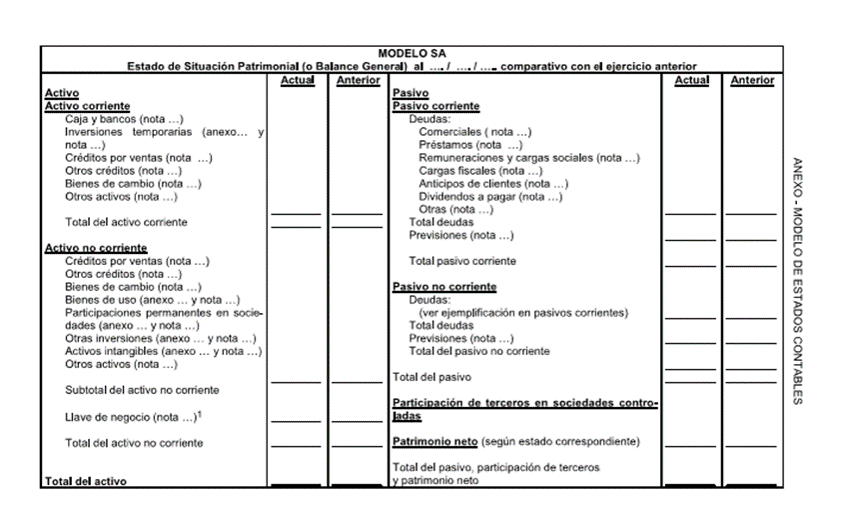

### INversiones temporales

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'rendimiento_promedio': [0.05, 0.06, 0.07, 0.08, 0.5, 0.09, 0.1],
    'volatilidad': [0.1, 0.12, 0.15, 0.18, 0.5, 0.2, 0.22],
    'numero_transacciones': [10, 12, 15, 18, 5, 20, 22]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)



En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de inversiones, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de verificación de identidad y validación de transacciones.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.

##control inventarios

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'ajustes_inventario': [1, 2, 3, 4, 30, 5, 6],
    'rotacion_inventario': [10, 12, 15, 18, 5, 20, 22],
    'descuentos': [0, 0, 0, 1, 5, 0, 0]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

**3. Interpretación de resultados:**

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de inventario y transacciones, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de gestión de inventario y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.

###otros activos

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'valor_intangibles': [100000, 120000, 150000, 180000, 500000, 200000, 220000],
    'depreciacion_activos_fijos': [10000, 12000, 15000, 18000, 50000, 20000, 22000],
    'rendimiento_inversiones': [0.05, 0.06, 0.07, 0.08, 0.5, 0.09, 0.1]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

**3. Interpretación de resultados:**

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de "otros activos", incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de contabilidad y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de tendencias:
Monitorear las tendencias en el valor de los activos intangibles, la depreciación de los activos fijos y el rendimiento de las inversiones a lo largo del tiempo.
Identificar cambios bruscos o inusuales en estas tendencias.
Análisis comparativo:
Comparar los datos de "otros activos" de la empresa con los de empresas similares en la misma industria.
Identificar diferencias significativas que puedan indicar un fraude.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de los registros relacionados con "otros activos".
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con "otros activos" solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

## ACTIVOS INTANGIBLES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'valor_intangible': [100000, 120000, 150000, 180000, 500000, 200000, 220000],
    'amortizacion_anual': [10000, 12000, 15000, 18000, 50000, 20000, 22000],
    'vida_util_estimada': [5, 5, 5, 5, 1, 5, 5]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

**3. Interpretación de resultados:**

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de valoraciones de activos intangibles, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de contabilidad y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de tendencias:
Monitorear las tendencias en la valoración de los activos intangibles a lo largo del tiempo.
Identificar cambios bruscos o inusuales en estas tendencias.
Análisis comparativo:
Comparar la valoración de los activos intangibles de la empresa con la de empresas similares en la misma industria.
Identificar diferencias significativas que puedan indicar un fraude.
Revisión de la documentación:
Examinar la documentación de respaldo para la valoración de los activos intangibles, como informes de valoración y contratos.
Verificar la razonabilidad de las suposiciones y proyecciones utilizadas en la valoración.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de los registros relacionados con los activos intangibles.
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con los activos intangibles solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

## otro algoritmo

In [ ]:
df

In [ ]:
df.anomalia.value_counts()

In [ ]:
## cambiar nombre de columna anomalia por fraude y sus valores
df.rename(columns={'anomalia': 'fraude'}, inplace=True)
df.fraude.value_counts()

In [ ]:
## cambiar el contenido de la columna de fraude por 0 y 1
df.fraude = df.fraude.map({-1:0,1:1})
df.fraude.value_counts()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

    # Supongamos que tienes tus datos en un DataFrame llamado 'df'
    # y la columna 'fraude' indica si hubo fraude (1) o no (0)

X = df.drop('fraude', axis=1)  # Características
y = df['fraude']  # Variable objetivo

    # Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

    # Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

1. Cargar desde un archivo CSV:

Si tus datos están en un archivo CSV (valores separados por comas), puedes usar la función read_csv() de Pandas:

In [ ]:
import pandas as pd

df = pd.read_csv('nombre_del_archivo.csv')

# Para visualizar los primeros registros del DataFrame
print(df.head())

1. Cargar desde un archivo CSV:

Si tus datos están en un archivo CSV (valores separados por comas), puedes usar la función read_csv() de Pandas:

In [ ]:
import pandas as pd

df = pd.read_excel('nombre_del_archivo.xlsx', sheet_name='nombre_de_la_hoja') # puedes omitir sheet_name si solo hay una hoja

# Para visualizar los primeros registros del DataFrame
print(df.head())

3. Cargar desde una base de datos SQL:

Si tus datos están en una base de datos SQL, puedes usar la función read_sql() de Pandas junto con una conexión a la base de datos:

In [ ]:
import pandas as pd
import sqlite3 # o otro conector de base de datos como psycopg2 para PostgreSQL

# Establecer la conexión a la base de datos
conn = sqlite3.connect('nombre_de_la_base_de_datos.db')

# Ejecutar una consulta SQL y cargar los resultados en un DataFrame
query = 'SELECT * FROM nombre_de_la_tabla'
df = pd.read_sql(query, conn)

# Cerrar la conexión a la base de datos
conn.close()

# Para visualizar los primeros registros del DataFrame
print(df.head())

4. Cargar desde un diccionario de Python:

Si tus datos están en un diccionario de Python, puedes usar el constructor DataFrame() de Pandas:

In [ ]:
import pandas as pd

data = {
    'columna1': [1, 2, 3, 4, 5],
    'columna2': ['a', 'b', 'c', 'd', 'e'],
    'columna3': [True, False, True, False, True]
}

df = pd.DataFrame(data)

# Para visualizar los primeros registros del DataFrame
print(df.head())

5. Cargar desde un archivo JSON:

Si tus datos están en un archivo JSON, puedes usar la función read_json() de Pandas:

In [ ]:
import pandas as pd

df = pd.read_json('nombre_del_archivo.json')

# Para visualizar los primeros registros del DataFrame
print(df.head())

6. Cargar desde una lista de listas:

Si tus datos están en una lista de listas, puedes usar el constructor DataFrame() de Pandas:

In [ ]:
import pandas as pd

data = [
    [1, 'a', True],
    [2, 'b', False],
    [3, 'c', True],
    [4, 'd', False],
    [5, 'e', True]
]

df = pd.DataFrame(data, columns=['columna1', 'columna2', 'columna3']) # puedes especificar los nombres de las columnas

# Para visualizar los primeros registros del DataFrame
print(df.head())

Recomendaciones:

Asegúrate de que el archivo o la base de datos estén en la misma ubicación que tu script de Python, o especifica la ruta completa.
Si tienes problemas con la codificación de caracteres, puedes especificar el parámetro encoding en las funciones read_csv() y read_excel().
Si tienes datos faltantes, puedes usar el parámetro na_values en las funciones de lectura para especificar los valores que deben considerarse como faltantes.
Espero que esto te ayude a cargar tus datos en un DataFrame de Pandas.

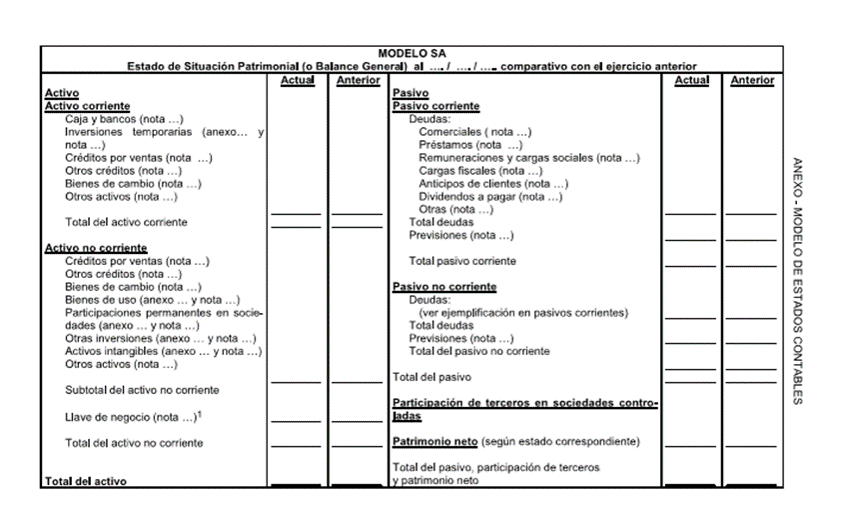

## proveedores

1. Preparación de datos (ejemplo simplificado)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'monto_promedio_facturas': [1000, 1200, 1500, 1800, 5000, 2000, 2200],
    'numero_facturas': [10, 12, 15, 18, 5, 20, 22],
    'dias_promedio_pago': [30, 30, 30, 30, 10, 30, 30]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

**3. Interpretación de resultados:**

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de proveedores, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de gestión de proveedores y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de redes:
Analizar las relaciones entre proveedores y empleados para identificar posibles colusiones.
Utilizar herramientas de análisis de redes para visualizar y detectar patrones sospechosos.
Análisis de texto:
Analizar las descripciones de las facturas para detectar palabras clave o frases que puedan indicar fraude.
Utilizar técnicas de procesamiento de lenguaje natural (NLP) para extraer información relevante de los textos.
Alertas y notificaciones:
Configurar alertas para detectar transacciones sospechosas en tiempo real.
Enviar notificaciones a los responsables de la gestión de proveedores para que investiguen los casos sospechosos.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de los registros de proveedores.
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con los proveedores solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

### prestamos obtenidos

In [ ]:
    import numpy as np
    import pandas as pd
    from sklearn.ensemble import IsolationForest

    # Crear datos de ejemplo (reemplaza esto con tus datos reales)
    data = {
        'ingresos': [50000, 60000, 70000, 80000, 10000, 90000, 100000],
        'puntaje_crediticio': [700, 750, 800, 850, 500, 900, 950],
        'monto_prestamo': [10000, 12000, 15000, 18000, 50000, 20000, 22000],
        'relacion_deuda_ingresos': [0.2, 0.3, 0.25, 0.35, 1.0, 0.2, 0.25]
    }

    df = pd.DataFrame(data)
    df

In [ ]:
  # Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

    # Predecir anomalías
anomalies = model.predict(df)

    # Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

    # Imprimir el DataFrame con las anomalías detectadas
print(df)

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'ingresos': [50000, 60000, 70000, 80000, 10000, 90000, 100000],
    'puntaje_crediticio': [700, 750, 800, 850, 500, 900, 950],
    'monto_prestamo': [10000, 12000, 15000, 18000, 50000, 20000, 22000],
    'relacion_deuda_ingresos': [0.2, 0.3, 0.25, 0.35, 1.0, 0.2, 0.25]
}

df = pd.DataFrame(data)

# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

3. Interpretación de resultados:

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de solicitudes de préstamos, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de verificación de identidad y validación de documentos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de redes:
Analizar las relaciones entre solicitantes y otros actores (por ejemplo, empleados de la institución financiera) para identificar posibles colusiones.
Utilizar herramientas de análisis de redes para visualizar y detectar patrones sospechosos.
Análisis de texto:
Analizar los documentos presentados por los solicitantes para detectar inconsistencias o falsificaciones.
Utilizar técnicas de procesamiento de lenguaje natural (NLP) para extraer información relevante de los textos.
Alertas y notificaciones:
Configurar alertas para detectar transacciones sospechosas en tiempo real.
Enviar notificaciones a los responsables de la gestión de préstamos para que investiguen los casos sospechosos.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de los registros de préstamos.
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con los préstamos solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

## remuneraciones y cargas sociales

1. Preparación de datos (ejemplo simplificado):

In [ ]:
    import numpy as np
    import pandas as pd
    from sklearn.ensemble import IsolationForest

    # Crear datos de ejemplo (reemplaza esto con tus datos reales)
    data = {
        'salario_promedio': [2000, 2200, 2500, 2800, 10000, 3000, 3200],
        'horas_extras_promedio': [10, 12, 15, 18, 50, 20, 22],
        'numero_cuentas_bancarias': [1, 1, 1, 1, 3, 1, 1],
        'cambios_direccion': [0, 0, 0, 1, 3, 0, 0]
    }

    df = pd.DataFrame(data)
    df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
  # Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

    # Predecir anomalías
anomalies = model.predict(df)

    # Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

    # Imprimir el DataFrame con las anomalías detectadas
print(df)

3. Interpretación de resultados:

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de nómina y empleados, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de gestión de nómina y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de redes:
Analizar las relaciones entre empleados para identificar posibles colusiones.
Utilizar herramientas de análisis de redes para visualizar y detectar patrones sospechosos.
Análisis de texto:
Analizar los registros de horas trabajadas para detectar inconsistencias o falsificaciones.
Utilizar técnicas de procesamiento de lenguaje natural (NLP) para extraer información relevante de los textos.
Alertas y notificaciones:
Configurar alertas para detectar transacciones sospechosas en tiempo real.
Enviar notificaciones a los responsables de la gestión de nómina para que investiguen los casos sospechosos.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de los registros de nómina.
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con la nómina solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

## anticipo de clientes

1. Preparación de datos (ejemplo simplificado):

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'monto_anticipo_promedio': [1000, 1200, 1500, 1800, 5000, 2000, 2200],
    'numero_anticipos': [10, 12, 15, 18, 5, 20, 22],
    'dias_promedio_anticipo': [30, 30, 30, 30, 10, 30, 30],
    'descuentos_anticipo': [0, 0, 0, 1, 5, 0, 0]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

3. Interpretación de resultados:

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de anticipos de clientes, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de gestión de clientes y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de redes:
Analizar las relaciones entre clientes y empleados para identificar posibles colusiones.
Utilizar herramientas de análisis de redes para visualizar y detectar patrones sospechosos.
Análisis de texto:
Analizar las descripciones de los anticipos para detectar palabras clave o frases que puedan indicar fraude.
Utilizar técnicas de procesamiento de lenguaje natural (NLP) para extraer información relevante de los textos.
Alertas y notificaciones:
Configurar alertas para detectar transacciones sospechosas en tiempo real.
Enviar notificaciones a los responsables de la gestión de anticipos para que investiguen los casos sospechosos.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de los registros de anticipos.
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con los anticipos solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

## previsiones

1. Preparación de datos (ejemplo simplificado):

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

    # Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
        'ingresos_proyectados': [100000, 120000, 150000, 180000, 500000, 200000, 220000],
        'gastos_proyectados': [80000, 90000, 110000, 130000, 400000, 150000, 160000],
        'flujo_efectivo_proyectado': [20000, 30000, 40000, 50000, 100000, 50000, 60000],
        'variacion_ingresos_reales': [0.05, 0.06, 0.07, 0.08, 0.5, 0.09, 0.1]
    }

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
 # Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

    # Predecir anomalías
anomalies = model.predict(df)

    # Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

    # Imprimir el DataFrame con las anomalías detectadas
print(df)

3. Interpretación de resultados:

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de previsiones financieras, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de contabilidad y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de tendencias:
Monitorear las tendencias en las previsiones a lo largo del tiempo.
Identificar cambios bruscos o inusuales en estas tendencias.
Análisis comparativo:
Comparar las previsiones de la empresa con las de empresas similares en la misma industria.
Identificar diferencias significativas que puedan indicar un fraude.
Revisión de la documentación:
Examinar la documentación de respaldo para las previsiones, como modelos financieros y supuestos.
Verificar la razonabilidad de las suposiciones y proyecciones utilizadas.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de las previsiones.
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con las previsiones solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

### remuneraciones pagadas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

    # Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
        'salario_declarado': [2000, 2200, 2500, 2800, 10000, 3000, 3200],
        'horas_trabajadas': [160, 160, 160, 160, 80, 160, 160],
        'antiguedad_laboral': [1, 2, 3, 4, 10, 5, 6],
        'descuentos_aportes': [400, 440, 500, 560, 2000, 600, 640]
    }

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
   # Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

    # Predecir anomalías
anomalies = model.predict(df)

    # Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

    # Imprimir el DataFrame con las anomalías detectadas
print(df)

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.anomaly import *

In [ ]:
anomaly = setup(df, normalize = True)

In [ ]:
models()

In [ ]:
iforest = create_model('iforest')
iforest

In [ ]:
anomalias = assign_model(iforest)
anomalias

In [ ]:
knn = create_model('knn')
knn

In [ ]:
anomalias1 = assign_model(knn)
anomalias1

In [ ]:
pca = create_model('pca')
pca

In [ ]:
anomalias2 = assign_model(pca)
anomalias2

In [ ]:
df

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

    # Supongamos que tienes tus datos en un DataFrame llamado 'df'
    # y la columna 'fraude' indica si hubo fraude (1) o no (0)

    X = df.drop('fraude', axis=1)  # Características
    y = df['fraude']  # Variable objetivo

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Crear y entrenar el modelo de regresión logística
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Precisión del modelo: {accuracy}')

Árboles de Decisión:

Los árboles de decisión son algoritmos que dividen los datos en ramas basadas en diferentes variables.
Son fáciles de interpretar y pueden manejar tanto datos numéricos como categóricos.
Puedes usar árboles de decisión para identificar reglas que son indicativas de fraude.

3. Bosques Aleatorios:

Los bosques aleatorios son un conjunto de árboles de decisión que trabajan juntos para mejorar la precisión de la predicción.
Son más robustos que los árboles de decisión individuales y pueden manejar grandes conjuntos de datos.
Los bosques aleatorios son una buena opción cuando tienes datos complejos y deseas una alta precisión.

000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

**Capítulo 1: La Problemática del Fraude y la Corrupción en la Sociedad Actual**
1.1 Definición y Tipos de Fraude
1.2 Definición y Manifestaciones de la Corrupción
1.3 Impacto Económico y Social del Fraude y la Corrupción
1.4 La Necesidad de Nuevas Herramientas para Combatir el Fraude y la Corrupción


Imaginemos que queremos analizar un conjunto de datos muy simplificado que contenga información sobre transacciones sospechosas o denuncias de corrupción. Este ejemplo ilustrará cómo podríamos comenzar a procesar y visualizar información para entender mejor la problemática.

**Contexto del Ejemplo:**

Supongamos que tenemos un archivo CSV (o una lista de diccionarios en Python) con la siguiente información simplificada:

Tipo: (Ej: Transacción Bancaria, Denuncia de Corrupción)
Descripción: (Breve descripción del evento)
Monto: (En una unidad monetaria)
Fecha: (Fecha del evento)
Estado: (Ej: Sospechoso, Investigado, Confirmado)

Tipos de Eventos:
Tipo
Transacción Bancaria      4
Denuncia de Corrupción    2
Name: count, dtype: int64

Ejemplos de Descripciones:
                     Tipo                                 Descripción
0    Transacción Bancaria  Transferencia inusual a cuenta desconocida
1  Denuncia de Corrupción   Denuncia de soborno a funcionario público
2    Transacción Bancaria         Retiro de gran cantidad en efectivo
3  Denuncia de Corrupción          Denuncia de malversación de fondos
4    Transacción Bancaria                    Compra sospechosa online
5    Transacción Bancaria              Transferencia a paraíso fiscal

Análisis de Montos (Impacto Económico Potencial):
Monto Total de Eventos Sospechosos: 105750
Monto Total de Eventos Investigados: 255000


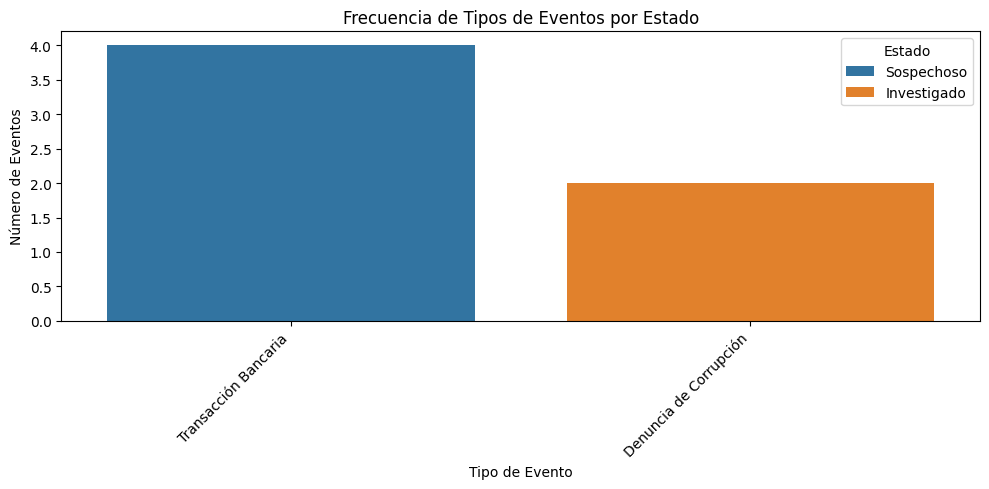

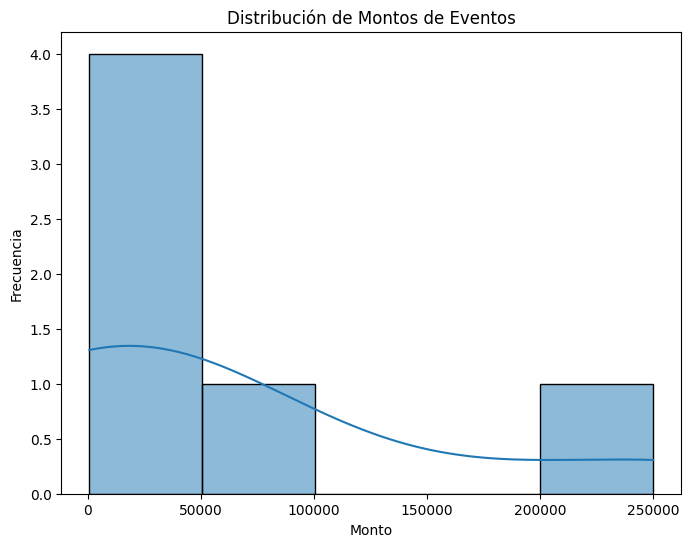

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de ejemplo (simulados)
data = {
    'Tipo': ['Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Transacción Bancaria'],
    'Descripción': ['Transferencia inusual a cuenta desconocida', 'Denuncia de soborno a funcionario público', 'Retiro de gran cantidad en efectivo', 'Denuncia de malversación de fondos', 'Compra sospechosa online', 'Transferencia a paraíso fiscal'],
    'Monto': [15000, 5000, 10000, 250000, 750, 80000],
    'Fecha': ['2023-10-26', '2024-01-15', '2023-11-05', '2024-03-10', '2024-02-20', '2024-03-01'],
    'Estado': ['Sospechoso', 'Investigado', 'Sospechoso', 'Investigado', 'Sospechoso', 'Sospechoso']
}

df = pd.DataFrame(data)

# 1.1 Definición y Tipos de Fraude / 1.2 Definición y Manifestaciones de la Corrupción
# Podemos categorizar los datos según el tipo y la descripción para entender las manifestaciones.

print("Tipos de Eventos:")
print(df['Tipo'].value_counts())
print("\nEjemplos de Descripciones:")
print(df[['Tipo', 'Descripción']])

# 1.3 Impacto Económico y Social del Fraude y la Corrupción
# Podemos analizar los montos para tener una idea del impacto económico (simplificado).

print("\nAnálisis de Montos (Impacto Económico Potencial):")
print("Monto Total de Eventos Sospechosos:", df[df['Estado'] == 'Sospechoso']['Monto'].sum())
print("Monto Total de Eventos Investigados:", df[df['Estado'] == 'Investigado']['Monto'].sum())

# 1.4 La Necesidad de Nuevas Herramientas para Combatir el Fraude y la Corrupción
# Visualización básica para ilustrar la frecuencia de los tipos de eventos y su estado.

plt.figure(figsize=(10, 5))
sns.countplot(x='Tipo', hue='Estado', data=df)
plt.title('Frecuencia de Tipos de Eventos por Estado')
plt.xlabel('Tipo de Evento')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Monto'], bins=5, kde=True)
plt.title('Distribución de Montos de Eventos')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

Explicación del Código:
**texto en negrita**
Importación de Librerías:

pandas se utiliza para crear y manipular un DataFrame, que es una estructura de datos tabular.
matplotlib.pyplot y seaborn se utilizan para crear visualizaciones básicas.
Datos de Ejemplo:

Se crea un diccionario data que simula un pequeño conjunto de datos con información relevante sobre posibles fraudes y casos de corrupción.
Creación del DataFrame:

pd.DataFrame(data) convierte el diccionario en un DataFrame de pandas para facilitar el análisis.
Análisis Conceptual (1.1 y 1.2):

df['Tipo'].value_counts() muestra la frecuencia de cada tipo de evento (Transacción Bancaria, Denuncia de Corrupción), ayudando a entender la distribución de los casos.
df[['Tipo', 'Descripción']] muestra una vista de los tipos de eventos y sus descripciones, ilustrando las diferentes manifestaciones de fraude y corrupción.
Análisis del Impacto Económico (1.3):

Se calcula la suma de los montos asociados a eventos clasificados como "Sospechoso" e "Investigado" para dar una idea del impacto económico potencial, aunque este es un análisis muy superficial y simplificado.
Visualización (1.4 - Necesidad de Nuevas Herramientas):

sns.countplot() crea un gráfico de barras que muestra la frecuencia de cada tipo de evento, segmentado por su estado (Sospechoso, Investigado). Esto ilustra visualmente la presencia de diferentes tipos de problemas.
sns.histplot() crea un histograma de los montos de los eventos, lo que puede ayudar a visualizar la distribución de los montos involucrados.
Cómo se relaciona con el Capítulo 1:

Este código, aunque básico, ilustra cómo podríamos comenzar a:

Identificar diferentes "Tipos de Fraude" y "Manifestaciones de la Corrupción" (secciones 1.1 y 1.2) al analizar la columna "Tipo" y la columna "Descripción".
Evaluar el "Impacto Económico" (sección 1.3) de manera muy rudimentaria al sumar los montos.
Visualizar la "Necesidad de Nuevas Herramientas" (sección 1.4) al mostrar que incluso con un pequeño conjunto de datos, la información puede ser compleja y requerir herramientas más sofisticadas (como algoritmos) para identificar patrones y tendencias de manera más efectiva. Las visualizaciones básicas sugieren que hay problemas que requieren una investigación más profunda.
Limitaciones de este Ejemplo:

Datos Simplificados: Los datos son simulados y muy limitados.
Análisis Básico: El análisis es muy superficial y no utiliza algoritmos complejos.
No Predice: No predice futuros fraudes o actos de corrupción.
No Detecta Patrones Complejos: No identifica patrones que podrían ser revelados por algoritmos más avanzados.
Conclusión:

Este ejemplo de código en Python proporciona una ilustración conceptual de cómo se podría comenzar a analizar información relacionada con el fraude y la corrupción. Sin embargo, para una aplicación real y efectiva de los conceptos del Capítulo 1, se requeriría el uso de algoritmos más sofisticados que se abordarán en los capítulos siguientes, capaces de procesar grandes volúmenes de datos, identificar patrones complejos y predecir posibles actividades ilícitas. Este ejemplo sienta las bases para entender que el análisis de datos es el primer paso, y los algoritmos son las herramientas que potenciarán ese análisis.

In [ ]:
import pandas as pd

data = {
    'Tipo': ['Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Transacción Bancaria'],
    'Descripción': ['Transferencia inusual a cuenta desconocida', 'Denuncia de soborno a funcionario público', 'Retiro de gran cantidad en efectivo', 'Denuncia de malversación de fondos', 'Compra sospechosa online', 'Transferencia a paraíso fiscal'],
    'Monto': [15000, 5000, 10000, 250000, 750, 80000],
    'Fecha': ['2023-10-26', '2024-01-15', '2023-11-05', '2024-03-10', '2024-02-20', '2024-03-01'],
    'Estado': ['Sospechoso', 'Investigado', 'Sospechoso', 'Investigado', 'Sospechoso', 'Sospechoso']
}

df = pd.DataFrame(data)
df

,Tipo,Descripción,Monto,Fecha,Estado
0,Transacción Bancaria,Transferencia inusual a cuenta desconocida,15000,2023-10-26,Sospechoso
1,Denuncia de Corrupción,Denuncia de soborno a funcionario público,5000,2024-01-15,Investigado
2,Transacción Bancaria,Retiro de gran cantidad en efectivo,10000,2023-11-05,Sospechoso
3,Denuncia de Corrupción,Denuncia de malversación de fondos,250000,2024-03-10,Investigado
4,Transacción Bancaria,Compra sospechosa online,750,2024-02-20,Sospechoso
5,Transacción Bancaria,Transferencia a paraíso fiscal,80000,2024-03-01,Sospechoso


Nuevo Análisis:

**Análisis Temporal (1.3 Impacto Económico y Social): Podemos analizar la evolución de los eventos sospechosos a lo largo del tiempo.**

In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df_sorted = df.sort_values(by='Fecha')
print("\nEventos Sospechosos por Fecha:")
print(df_sorted[df_sorted['Estado'] == 'Sospechoso'][['Fecha', 'Descripción', 'Monto']])


Eventos Sospechosos por Fecha:
       Fecha                                 Descripción  Monto
0 2023-10-26  Transferencia inusual a cuenta desconocida  15000
2 2023-11-05         Retiro de gran cantidad en efectivo  10000
4 2024-02-20                    Compra sospechosa online    750
5 2024-03-01              Transferencia a paraíso fiscal  80000


**Agrupación por Tipo y Estado (1.1 y 1.2): Podemos ver cuántos eventos de cada tipo están en cada estado.**


In [ ]:
print("\nConteo de Eventos por Tipo y Estado:")
print(df.groupby(['Tipo', 'Estado']).size().reset_index(name='Conteo'))


Conteo de Eventos por Tipo y Estado:
                     Tipo       Estado  Conteo
0  Denuncia de Corrupción  Investigado       2
1    Transacción Bancaria   Sospechoso       4


**Identificación de "Bandera Roja" (1.1 y 1.2): Podemos buscar patrones o montos que podrían considerarse "banderas rojas" o indicadores de posibles problemas.**

In [ ]:
umbral_monto_alto = 50000
print("\nEventos con Montos Altos (Potencialmente Significativos):")
print(df[df['Monto'] > umbral_monto_alto][['Tipo', 'Descripción', 'Monto', 'Estado']])


Eventos con Montos Altos (Potencialmente Significativos):
                     Tipo                         Descripción   Monto  \
3  Denuncia de Corrupción  Denuncia de malversación de fondos  250000   
5    Transacción Bancaria      Transferencia a paraíso fiscal   80000   

        Estado  
3  Investigado  
5   Sospechoso  


**Análisis de Palabras Clave en la Descripción (Conceptual para 1.1 y 1.2): Aunque no es un análisis NLP avanzado, podemos buscar palabras clave que sugieran fraude o corrupción.**

In [ ]:
palabras_clave_fraude = ['transferencia inusual', 'retiro efectivo', 'compra sospechosa', 'paraíso fiscal']
palabras_clave_corrupcion = ['soborno', 'malversación', 'funcionario público']

def identificar_palabras_clave(row, palabras):
    for palabra in palabras:
        if palabra.lower() in row['Descripción'].lower():
            return True
    return False

df['Es_Fraude'] = df.apply(lambda row: identificar_palabras_clave(row, palabras_clave_fraude), axis=1)
df['Es_Corrupcion'] = df.apply(lambda row: identificar_palabras_clave(row, palabras_clave_corrupcion), axis=1)

print("\nIdentificación de Palabras Clave en Descripción:")
print(df[['Descripción', 'Es_Fraude', 'Es_Corrupcion']])


Identificación de Palabras Clave en Descripción:
                                  Descripción  Es_Fraude  Es_Corrupcion
0  Transferencia inusual a cuenta desconocida       True          False
1   Denuncia de soborno a funcionario público      False           True
2         Retiro de gran cantidad en efectivo      False          False
3          Denuncia de malversación de fondos      False           True
4                    Compra sospechosa online       True          False
5              Transferencia a paraíso fiscal       True          False


Explicación del Nuevo Código:

**Análisis Temporal:**

Convertimos la columna 'Fecha' al tipo de dato datetime para poder ordenarla.
Ordenamos el DataFrame por fecha para ver la secuencia de eventos sospechosos.
Agrupación por Tipo y Estado:

df.groupby(['Tipo', 'Estado']).size() agrupa el DataFrame por las columnas 'Tipo' y 'Estado' y cuenta el número de ocurrencias en cada grupo.
.reset_index(name='Conteo') convierte el resultado agrupado en un DataFrame más legible.
Identificación de "Bandera Roja":

Definimos un umbral_monto_alto.
Filtramos el DataFrame para mostrar solo los eventos cuyo 'Monto' supera este umbral, resaltando transacciones potencialmente significativas.
Análisis de Palabras Clave:

Definimos dos listas de palabras_clave relacionadas con fraude y corrupción.
La función identificar_palabras_clave verifica si alguna de las palabras clave se encuentra en la columna 'Descripción' de una fila.
Aplicamos esta función a cada fila del DataFrame utilizando df.apply() para crear dos nuevas columnas booleanas: 'Es_Fraude' y 'Es_Corrupcion'.
Cómo se relaciona con el Capítulo 1 (Revisión):

1.1 Definición y Tipos de Fraude / 1.2 Definición y Manifestaciones de la Corrupción: El análisis de palabras clave y la agrupación por tipo y descripción ayudan a categorizar las diferentes manifestaciones de fraude y corrupción presentes en los datos de ejemplo.
1.3 Impacto Económico y Social: El análisis de los montos y la identificación de eventos con montos altos dan una idea del impacto económico potencial, aunque limitado por el tamaño del dataset. El análisis temporal podría ayudar a identificar si los eventos sospechosos están aumentando o disminuyendo.
1.4 La Necesidad de Nuevas Herramientas: Aunque este análisis es básico, resalta la necesidad de herramientas más sofisticadas (algoritmos) para:
Analizar automáticamente grandes volúmenes de texto (para una identificación más precisa de palabras clave y patrones).
Identificar patrones complejos en las fechas, los montos y los tipos de eventos.
Realizar análisis predictivos para anticipar futuros casos de fraude o corrupción.
Conclusión del Nuevo Análisis:

Este segundo análisis, aunque aún con datos limitados, demuestra cómo se pueden aplicar diferentes enfoques para extraer información relevante del mismo dataset. Vemos cómo podemos:

Organizar la información temporalmente.
Categorizar los eventos por tipo y estado.
Identificar valores atípicos o "banderas rojas" basadas en el monto.
Realizar un análisis textual básico para identificar posibles indicios de fraude y corrupción.
Estos pasos iniciales son análogos a lo que un sistema más complejo basado en algoritmos haría de manera automatizada y a mayor escala, proporcionando una comprensión más profunda y detallada de la problemática del fraude y la corrupción. La necesidad de algoritmos sofisticados se hace evidente al considerar la complejidad de los datos reales y la necesidad de una detección más precisa y eficiente.

**Capítulo 2: Introducción a los Algoritmos y la Inteligencia Artificial**
2.1 ¿Qué son los Algoritmos? Conceptos Básicos
2.2 Tipos de Algoritmos Relevantes para la Detección de Fraude y Corrupción
2.3 Introducción a la Inteligencia Artificial y el Aprendizaje Automático (Machine Learning)
2.4 Ética y Sesgos en los Algoritmos



Un Algoritmo Simple: Un algoritmo para encontrar el número mayor en una lista. **texto en negrita**
Tipos de Algoritmos Relevantes (Conceptualmente):
Clasificación: Un ejemplo muy básico de cómo clasificar datos.
Agrupamiento (Clustering): Una demostración de cómo agrupar datos similares.

In [ ]:
import random
from collections import defaultdict

# 2.1 ¿Qué son los Algoritmos? Conceptos Básicos

def encontrar_mayor(lista):
    """Algoritmo para encontrar el número mayor en una lista."""
    if not lista:
        return None
    mayor = lista[0]
    for numero in lista:
        if numero > mayor:
            mayor = numero
    return mayor

# Ejemplo de uso
numeros = [5, 2, 8, 1, 9, 4]
mayor_numero = encontrar_mayor(numeros)
print(f"\n2.1 Algoritmo Simple: El número mayor en {numeros} es: {mayor_numero}")

# 2.2 Tipos de Algoritmos Relevantes para la Detección de Fraude y Corrupción

# Ejemplo muy básico de Clasificación (simulando una clasificación simple)
def clasificar_transaccion(monto):
    """Clasifica una transacción como 'Baja', 'Media' o 'Alta'."""
    if monto < 100:
        return 'Baja'
    elif monto < 1000:
        return 'Media'
    else:
        return 'Alta'

transacciones = [50, 500, 1500, 20, 1200]
print("\n2.2 Ejemplo Básico de Clasificación:")
for monto in transacciones:
    print(f"La transacción de ${monto} es clasificada como: {clasificar_transaccion(monto)}")

# Ejemplo muy básico de Agrupamiento (simulando agrupar datos similares)
def agrupar_por_rango(valor, rangos):
    """Agrupa un valor en un rango predefinido."""
    for rango, etiqueta in rangos.items():
        if valor in rango:
            return etiqueta
    return 'Otro'

valores = [10, 25, 110, 500, 1005, 15]
rangos_agrupamiento = {
    range(0, 50): 'Grupo A',
    range(50, 500): 'Grupo B',
    range(500, 1000): 'Grupo C'
}
print("\n2.2 Ejemplo Básico de Agrupamiento:")
for valor in valores:
    grupo = agrupar_por_rango(valor, rangos_agrupamiento)
    print(f"El valor {valor} pertenece al grupo: {grupo}")

# 2.3 Introducción a la Inteligencia Artificial y el Aprendizaje Automático (Machine Learning)
# Ejemplo conceptual de cómo un algoritmo podría "aprender" (muy simplificado)

# Simulación de datos etiquetados (fraudulento o no)
datos_entrenamiento = [
    {'monto': 100, 'frecuencia': 1, 'etiqueta': 'No Fraudulento'},
    {'monto': 5000, 'frecuencia': 1, 'etiqueta': 'Fraudulento'},
    {'monto': 200, 'frecuencia': 3, 'etiqueta': 'No Fraudulento'},
    {'monto': 7000, 'frecuencia': 2, 'etiqueta': 'Fraudulento'},
    {'monto': 150, 'frecuencia': 2, 'etiqueta': 'No Fraudulento'}
]

# Un modelo muy simplificado (si el monto es alto y la frecuencia baja, es fraudulento)
def modelo_aprendizaje_simple(transaccion):
    if transaccion['monto'] > 4000 and transaccion['frecuencia'] < 3:
        return 'Posiblemente Fraudulento'
    else:
        return 'No Sospechoso'

print("\n2.3 Ejemplo Conceptual de Aprendizaje Automático (Muy Simplificado):")
transaccion_nueva = {'monto': 6000, 'frecuencia': 1}
resultado = modelo_aprendizaje_simple(transaccion_nueva)
print(f"La transacción {transaccion_nueva} se clasifica como: {resultado}")

transaccion_nueva_2 = {'monto': 300, 'frecuencia': 5}
resultado_2 = modelo_aprendizaje_simple(transaccion_nueva_2)
print(f"La transacción {transaccion_nueva_2} se clasifica como: {resultado_2}")

# 2.4 Ética y Sesgos en los Algoritmos
# Ejemplo conceptual de cómo un sesgo en los datos podría afectar un modelo (muy simplificado)

# Datos de entrenamiento con un sesgo (más transacciones 'altas' para un tipo de usuario)
datos_sesgados = [
    {'tipo_usuario': 'A', 'monto': 100, 'etiqueta': 'No Fraudulento'},
    {'tipo_usuario': 'B', 'monto': 5000, 'etiqueta': 'Fraudulento'},
    {'tipo_usuario': 'A', 'monto': 200, 'etiqueta': 'No Fraudulento'},
    {'tipo_usuario': 'B', 'monto': 7000, 'etiqueta': 'Fraudulento'},
    {'tipo_usuario': 'A', 'monto': 150, 'etiqueta': 'No Fraudulento'},
    {'tipo_usuario': 'B', 'monto': 1000, 'etiqueta': 'No Fraudulento'} # Menos ejemplos de 'No Fraudulento' para B
]

def modelo_sesgado_simple(transaccion):
    if transaccion['tipo_usuario'] == 'B' and transaccion['monto'] > 800:
        return 'Sospechoso'
    else:
        return 'No Sospechoso'

print("\n2.4 Ejemplo Conceptual de Sesgo en Algoritmos (Muy Simplificado):")
transaccion_usuario_a = {'tipo_usuario': 'A', 'monto': 900}
resultado_a = modelo_sesgado_simple(transaccion_usuario_a)
print(f"Transacción usuario A ({transaccion_usuario_a}): {resultado_a}")

transaccion_usuario_b = {'tipo_usuario': 'B', 'monto': 900}
resultado_b = modelo_sesgado_simple(transaccion_usuario_b)
print(f"Transacción usuario B ({transaccion_usuario_b}): {resultado_b}")


2.1 Algoritmo Simple: El número mayor en [5, 2, 8, 1, 9, 4] es: 9

2.2 Ejemplo Básico de Clasificación:
La transacción de $50 es clasificada como: Baja
La transacción de $500 es clasificada como: Media
La transacción de $1500 es clasificada como: Alta
La transacción de $20 es clasificada como: Baja
La transacción de $1200 es clasificada como: Alta

2.2 Ejemplo Básico de Agrupamiento:
El valor 10 pertenece al grupo: Grupo A
El valor 25 pertenece al grupo: Grupo A
El valor 110 pertenece al grupo: Grupo B
El valor 500 pertenece al grupo: Grupo C
El valor 1005 pertenece al grupo: Otro
El valor 15 pertenece al grupo: Grupo A

2.3 Ejemplo Conceptual de Aprendizaje Automático (Muy Simplificado):
La transacción {'monto': 6000, 'frecuencia': 1} se clasifica como: Posiblemente Fraudulento
La transacción {'monto': 300, 'frecuencia': 5} se clasifica como: No Sospechoso

2.4 Ejemplo Conceptual de Sesgo en Algoritmos (Muy Simplificado):
Transacción usuario A ({'tipo_usuario': 'A', 'monto': 900}): N



**Algoritmo Simple (encontrar_mayor):**

Este es un algoritmo básico que itera a través de una lista y compara cada elemento con el mayor encontrado hasta el momento. Ilustra la idea de un conjunto de pasos definidos para resolver un problema.
Ejemplo Básico de Clasificación (clasificar_transaccion):

Define una función que asigna una etiqueta ('Baja', 'Media', 'Alta') a una transacción según su monto. Esto es una simplificación de un algoritmo de clasificación.
Ejemplo Básico de Agrupamiento (agrupar_por_rango):

Define una función que asigna un grupo a un valor numérico según el rango en el que se encuentre. Esto ilustra la idea de agrupar datos similares.
Ejemplo Conceptual de Aprendizaje Automático (modelo_aprendizaje_simple):

Simula un proceso de aprendizaje muy básico donde, a partir de datos de entrenamiento etiquetados, se define una regla simple para predecir si una transacción es fraudulenta. Esto introduce la idea de que los algoritmos pueden aprender de los datos.
Ejemplo Conceptual de Sesgo en Algoritmos (modelo_sesgado_simple):

Muestra cómo un modelo simple, entrenado implícitamente con datos que podrían tener una distribución desigual, podría generar resultados sesgados. En este caso, el modelo podría sospechar más de las transacciones del "tipo_usuario" 'B' simplemente porque los datos de entrenamiento tienen una mayor proporción de transacciones de monto alto asociadas a ese tipo.
Cómo se relaciona con el Capítulo 2:

2.1 ¿Qué son los Algoritmos? Conceptos Básicos: El ejemplo de encontrar_mayor ilustra la idea de un conjunto de pasos definidos para resolver un problema.
2.2 Tipos de Algoritmos Relevantes: Los ejemplos de clasificar_transaccion y agrupar_por_rango son representaciones muy simplificadas de algoritmos de clasificación y agrupamiento, respectivamente, que se mencionan como relevantes para la detección de fraude y corrupción.
2.3 Introducción a la Inteligencia Artificial y el Aprendizaje Automático: El ejemplo de modelo_aprendizaje_simple introduce de manera conceptual la idea de que un algoritmo puede "aprender" de los datos para hacer predicciones.
2.4 Ética y Sesgos en los Algoritmos: El ejemplo de modelo_sesgado_simple ilustra cómo los sesgos en los datos de entrenamiento pueden llevar a que un algoritmo tome decisiones sesgadas.
Limitaciones de este Código:

Muy Simplificado: Los ejemplos son intencionalmente muy básicos para ilustrar los conceptos de manera sencilla. Los algoritmos reales de detección de fraude y corrupción son mucho más complejos.
No Implementa Algoritmos Reales: No implementa algoritmos de clasificación, agrupamiento o aprendizaje automático sofisticados. Simplemente muestra la idea detrás de ellos.
Datos Simulados: Los datos de entrenamiento y prueba son simulados y no representan datos reales de fraude.
Conclusión:

Este código proporciona una introducción práctica y conceptual a los temas del Capítulo 2. Muestra cómo se pueden definir algoritmos simples, cómo se pueden simular los principios de clasificación y agrupamiento, y cómo se puede entender de forma básica la idea del aprendizaje automático y los sesgos algorítmicos. Sirve como un punto de partida para comprender que los algoritmos son conjuntos de instrucciones que pueden analizar datos y tomar decisiones, y que en el contexto de la IA, estos algoritmos pueden aprender de los datos, pero también pueden heredar sesgos presentes en ellos.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Cargamos el dataset (mismo ejemplo)
data = {
    'Tipo': ['Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Transacción Bancaria'],
    'Descripción': ['Transferencia inusual a cuenta desconocida', 'Denuncia de soborno a funcionario público', 'Retiro de gran cantidad en efectivo', 'Denuncia de malversación de fondos', 'Compra sospechosa online', 'Transferencia a paraíso fiscal'],
    'Monto': [15000, 5000, 10000, 250000, 750, 80000],
    'Fecha': ['2023-10-26', '2024-01-15', '2023-11-05', '2024-03-10', '2024-02-20', '2024-03-01'],
    'Estado': ['Sospechoso', 'Investigado', 'Sospechoso', 'Investigado', 'Sospechoso', 'Sospechoso']
}
df = pd.DataFrame(data)

# 2. Preprocesamiento Básico (para algunos algoritmos)
# Convertir 'Monto' a un formato numérico si no lo estuviera ya.
# En este caso, ya es numérico.

# 3. Ejemplo de Agrupamiento (Clustering) - Capítulo 2.2
# Intentamos agrupar las transacciones basándonos en el 'Monto'.
# Esto es una simplificación, en un caso real se usarían más características.

if 'Monto' in df.columns:
    monto_array = df[['Monto']].values
    scaler = StandardScaler()
    monto_scaled = scaler.fit_transform(monto_array)

    n_clusters = 2  # Intentamos agrupar en 2 grupos (ej: montos bajos y altos)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df['Grupo_Monto'] = kmeans.fit_predict(monto_scaled)

    print("\nEjemplo de Agrupamiento (K-Means) basado en Monto:")
    print(df[['Descripción', 'Monto', 'Grupo_Monto']])
else:
    print("\nNo se puede realizar el agrupamiento porque la columna 'Monto' no está presente.")

# 4. Ejemplo Básico de Clasificación (Aprendizaje Supervisado) - Capítulo 2.2 y 2.3
# Creamos una columna binaria para clasificar si un evento es 'Sospechoso' o no.

if 'Estado' in df.columns:
    df['Es_Sospechoso'] = df['Estado'].apply(lambda x: 1 if x == 'Sospechoso' else 0)

    # Seleccionamos una característica numérica para la clasificación (Monto)
    if 'Monto' in df.columns:
        X = df[['Monto']]
        y = df['Es_Sospechoso']

        # Dividimos los datos en entrenamiento y prueba (muy simplificado)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Entrenamos un modelo de regresión logística (un clasificador simple)
        model = LogisticRegression(random_state=42)
        model.fit(X_train, y_train)

        # Realizamos predicciones
        y_pred = model.predict(X_test)

        # Evaluamos el modelo (muy básico con pocos datos)
        print("\nEjemplo Básico de Clasificación (Regresión Logística):")
        print("Predicciones:", y_pred)
        print("Valores Reales:", y_test.values)
        print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
        print("\nReporte de Clasificación:")
        print(classification_report(y_test, y_pred, target_names=['No Sospechoso', 'Sospechoso']))
    else:
        print("\nNo se puede realizar la clasificación porque la columna 'Monto' no está presente.")
else:
    print("\nNo se puede realizar la clasificación porque la columna 'Estado' no está presente.")

# 5. Ejemplo Conceptual de Sesgo (Capítulo 2.4)
# Imaginemos que el 'Monto' es la única característica y que los eventos 'Investigado'
# son más comunes en un cierto rango de montos, lo que podría influir en el modelo.
# Esto es una simplificación extrema para ilustrar el concepto.

if 'Monto' in df.columns and 'Estado' in df.columns:
    print("\nEjemplo Conceptual de Sesgo (Influencia del Monto en la Clasificación):")
    print(df[['Monto', 'Estado']])
    # Si la mayoría de 'Investigado' tiene montos medios, el modelo podría
    # aprender a asociar montos medios con 'Investigado', incluso si no es la causa.
    # Con pocos datos, es difícil demostrar un sesgo claro, pero se ilustra la idea.

# 6. Consideraciones Éticas (Implícitas)
print("\nConsideraciones Éticas Implícitas:")
print("Es importante notar que estos modelos se entrenan con datos y pueden reflejar")
print("sesgos presentes en esos datos. La interpretación de los resultados debe ser")
print("cuidadosa y considerar el contexto de los datos.")


Ejemplo de Agrupamiento (K-Means) basado en Monto:
                                  Descripción   Monto  Grupo_Monto
0  Transferencia inusual a cuenta desconocida   15000            0
1   Denuncia de soborno a funcionario público    5000            0
2         Retiro de gran cantidad en efectivo   10000            0
3          Denuncia de malversación de fondos  250000            1
4                    Compra sospechosa online     750            0
5              Transferencia a paraíso fiscal   80000            0

Ejemplo Básico de Clasificación (Regresión Logística):
Predicciones: [1 1]
Valores Reales: [1 0]
Precisión del Modelo: 0.5

Reporte de Clasificación:
               precision    recall  f1-score   support

No Sospechoso       0.00      0.00      0.00         1
   Sospechoso       0.50      1.00      0.67         1

     accuracy                           0.50         2
    macro avg       0.25      0.50      0.33         2
 weighted avg       0.25      0.50      0.33       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Se importan librerías más avanzadas de scikit-learn para demostrar algoritmos de aprendizaje automático:
KMeans para clustering.
StandardScaler para escalar los datos numéricos.
train_test_split para dividir los datos en conjuntos de entrenamiento y prueba.
LogisticRegression para un modelo de clasificación simple.
accuracy_score y classification_report para evaluar el modelo.
Preprocesamiento Básico:

Se comenta que la columna 'Monto' ya es numérica, por lo que no se requiere una conversión explícita.
Ejemplo de Agrupamiento (K-Means):

StandardScaler(): Se utiliza para escalar la columna 'Monto' para que tenga una media de 0 y una desviación estándar de 1. Esto es importante para muchos algoritmos de clustering y aprendizaje automático.
KMeans(n_clusters=n_clusters, ...): Se inicializa el algoritmo K-Means para agrupar los datos en n_clusters (en este caso, 2). n_init especifica el número de veces que se ejecutará el algoritmo con diferentes inicializaciones del centroide. random_state asegura la reproducibilidad.
kmeans.fit_predict(monto_scaled): Se ajusta el modelo K-Means a los datos escalados y se obtienen las etiquetas de los grupos para cada dato.
Se imprime el DataFrame con la nueva columna 'Grupo_Monto'.
Ejemplo Básico de Clasificación (Regresión Logística):

df['Es_Sospechoso'] = ...: Se crea una nueva columna binaria 'Es_Sospechoso' donde 1 indica 'Sospechoso' y 0 indica otro estado.
Selección de Características: Se selecciona la columna 'Monto' como la única característica para la clasificación (en un caso real, se usarían muchas más).
train_test_split(): Se divide el dataset en un conjunto de entrenamiento (70%) y un conjunto de prueba (30%). Esto permite evaluar el rendimiento del modelo en datos que no ha visto durante el entrenamiento.
LogisticRegression(): Se inicializa un modelo de regresión logística, un algoritmo de clasificación lineal.
model.fit(X_train, y_train): Se entrena el modelo con los datos de entrenamiento.
model.predict(X_test): Se realizan predicciones en el conjunto de prueba.
Evaluación del Modelo:
accuracy_score() calcula la precisión del modelo (la proporción de predicciones correctas).
classification_report() proporciona métricas más detalladas como precisión, recall, F1-score y soporte para cada clase.
Ejemplo Conceptual de Sesgo:

Se incluye un comentario para ilustrar cómo un modelo podría verse influenciado por la distribución de los datos, lo que podría llevar a sesgos. Con tan pocos datos, es difícil demostrarlo de manera concluyente, pero se resalta el concepto.
Consideraciones Éticas (Implícitas):

Se agrega un comentario para recordar la importancia de considerar los sesgos y la interpretación cuidadosa de los resultados.
Cómo se relaciona con el Capítulo 2 (Revisión Ampliada):

2.1 ¿Qué son los Algoritmos? Conceptos Básicos: Se implementan algoritmos específicos (K-Means y Regresión Logística) que siguen un conjunto de pasos definidos.
2.2 Tipos de Algoritmos Relevantes:
Agrupamiento (Clustering): Se utiliza K-Means para intentar agrupar las transacciones según su monto.
Clasificación: Se utiliza Regresión Logística para clasificar los eventos como "Sospechoso" o "No Sospechoso" basándose en el monto.
2.3 Introducción a la Inteligencia Artificial y el Aprendizaje Automático: Se demuestra la aplicación de dos algoritmos de aprendizaje automático (K-Means no es estrictamente supervisado, pero es una técnica de ML; Regresión Logística es aprendizaje supervisado).
2.4 Ética y Sesgos en los Algoritmos: Se incluye un comentario que resalta la importancia de considerar los sesgos y la interpretación ética de los resultados.
Limitaciones y Consideraciones Adicionales:

Dataset Pequeño: Con solo 6 datos, los resultados de los modelos de aprendizaje automático (especialmente la clasificación) no serán muy robustos. Este es un ejemplo para ilustrar el concepto, no para construir un modelo predictivo real.
Características Limitadas: Solo se utiliza la columna 'Monto' para la clasificación. En un escenario real, se utilizarían muchas más características.
Preprocesamiento Simplificado: El preprocesamiento se limita a la escala numérica. En casos reales, se requeriría un preprocesamiento más exhaustivo.
Evaluación Básica: La evaluación del modelo de clasificación es muy básica debido al tamaño del dataset.
Conclusión del Segundo Código:

Este segundo ejemplo de código va un paso más allá al demostrar la aplicación de algoritmos de aprendizaje automático reales (K-Means y Regresión Logística) en el contexto de la detección de posibles problemas. Aunque simplificado, ilustra cómo se pueden utilizar técnicas de clustering para identificar grupos de datos similares y cómo se puede construir un modelo de clasificación básico. También introduce los conceptos de entrenamiento, prueba y evaluación de modelos, que son fundamentales en el aprendizaje automático. La inclusión de la discusión sobre sesgos y consideraciones éticas refuerza la importancia de los puntos clave del Capítulo 2.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# 1. Cargamos el dataset (mismo ejemplo)
data = {
    'Tipo': ['Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Transacción Bancaria'],
    'Descripción': ['Transferencia inusual a cuenta desconocida', 'Denuncia de soborno a funcionario público', 'Retiro de gran cantidad en efectivo', 'Denuncia de malversación de fondos', 'Compra sospechosa online', 'Transferencia a paraíso fiscal'],
    'Monto': [15000, 5000, 10000, 250000, 750, 80000],
    'Fecha': ['2023-10-26', '2024-01-15', '2023-11-05', '2024-03-10', '2024-02-20', '2024-03-01'],
    'Estado': ['Sospechoso', 'Investigado', 'Sospechoso', 'Investigado', 'Sospechoso', 'Sospechoso']
}
df = pd.DataFrame(data)

# 7. Ejemplo de Análisis de Texto (NLP) - Capítulo 2.2 y 2.3
# Analizamos la columna 'Descripción' para encontrar similitudes.

if 'Descripción' in df.columns:
    stop_words = set(stopwords.words('spanish'))

    def preprocess_text(text):
        if isinstance(text, str):
            text = text.lower()
            words = text.split()
            words = [word for word in words if word not in stop_words]
            return " ".join(words)
        return ""

    df['Descripción_Procesada'] = df['Descripción'].apply(preprocess_text)

    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df['Descripción_Procesada'])

    # Calculamos la similitud del coseno entre las descripciones
    similitud_coseno = cosine_similarity(tfidf_matrix)

    similitud_df = pd.DataFrame(similitud_coseno, index=df['Descripción'], columns=df['Descripción'])

    print("\n7. Ejemplo de Análisis de Texto (Similitud de Coseno entre Descripciones):")
    print(similitud_df)

    # Podemos identificar descripciones similares (por ejemplo, con una similitud > 0.5)
    print("\nDescripciones con Alta Similitud:")
    for i in range(len(similitud_df.index)):
        for j in range(i + 1, len(similitud_df.columns)):
            if similitud_df.iloc[i, j] > 0.5:
                print(f"'{similitud_df.index[i]}' es similar a '{similitud_df.columns[j]}' (Similitud: {similitud_df.iloc[i, j]:.2f})")

else:
    print("\nNo se puede realizar el análisis de texto porque la columna 'Descripción' no está presente.")

# 8. Ejemplo de Detección de Anomalías (Conceptual) - Capítulo 2.2
# Identificamos transacciones con montos significativamente diferentes a la media.

if 'Monto' in df.columns:
    media_monto = df['Monto'].mean()
    desviacion_estandar_monto = df['Monto'].std()
    umbral_anomalia = 2  # Por ejemplo, 2 desviaciones estándar

    df['Es_Anomalia_Monto'] = abs(df['Monto'] - media_monto) > umbral_anomalia * desviacion_estandar_monto

    print("\n8. Ejemplo Conceptual de Detección de Anomalías (Basado en Monto):")
    print(df[['Descripción', 'Monto', 'Es_Anomalia_Monto']])
else:
    print("\nNo se puede realizar la detección de anomalías porque la columna 'Monto' no está presente.")

# 9. Ejemplo de Análisis de Fechas (Conceptual para 1.3)
# Podríamos buscar patrones en la frecuencia de eventos en ciertos periodos.
# Esto es muy básico con pocos datos, pero ilustra la idea.

if 'Fecha' in df.columns:
    # Convert 'Fecha' column to datetime objects
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    df['Mes'] = df['Fecha'].dt.month
    print("\n9. Ejemplo Conceptual de Análisis de Fechas (Conteo de Eventos por Mes):")
    print(df['Mes'].value_counts().sort_index())
else:
    print("\nNo se puede realizar el análisis de fechas porque la columna 'Fecha' no está presente.")


7. Ejemplo de Análisis de Texto (Similitud de Coseno entre Descripciones):
Descripción                                 Transferencia inusual a cuenta desconocida  \
Descripción                                                                              
Transferencia inusual a cuenta desconocida                                    1.000000   
Denuncia de soborno a funcionario público                                     0.000000   
Retiro de gran cantidad en efectivo                                           0.000000   
Denuncia de malversación de fondos                                            0.000000   
Compra sospechosa online                                                      0.000000   
Transferencia a paraíso fiscal                                                0.214642   

Descripción                                 Denuncia de soborno a funcionario público  \
Descripción                                                                             
Transferencia inusual a c

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Importación de Librerías:
**texto en negrita**
Se importan librerías adicionales para análisis de texto y detección de anomalías:
TfidfVectorizer de sklearn.feature_extraction.text para convertir texto en vectores numéricos.
cosine_similarity de sklearn.metrics.pairwise para calcular la similitud entre vectores.
nltk.corpus.stopwords para eliminar palabras comunes del idioma español.
nltk para descargar los datos de stopwords (si no se han descargado antes).
Ejemplo de Análisis de Texto (NLP):

preprocess_text(text): Una función para preprocesar el texto:
Convierte el texto a minúsculas.
Divide el texto en palabras.
Elimina las stopwords (palabras comunes como "el", "la", "de", etc.).
Une las palabras restantes en una cadena.
df['Descripción_Procesada'] = ...: Aplica la función de preprocesamiento a la columna 'Descripción'.
TfidfVectorizer(): Inicializa un vectorizador TF-IDF (Term Frequency-Inverse Document Frequency). Este método convierte el texto en una matriz numérica donde cada fila representa una descripción y cada columna representa una palabra, con un peso que refleja la importancia de la palabra en el texto.
vectorizer.fit_transform(...): Ajusta el vectorizador a los textos procesados y transforma los textos en una matriz TF-IDF.
cosine_similarity(...): Calcula la similitud del coseno entre los vectores TF-IDF de cada par de descripciones. La similitud del coseno mide la similitud entre dos vectores proyectados en un espacio multidimensional. Un valor de 1 indica una similitud perfecta y 0 indica ninguna similitud.
Se crea un DataFrame similitud_df para mostrar la matriz de similitud.
Se itera sobre la matriz de similitud para identificar pares de descripciones con una alta similitud (mayor a 0.5).
Ejemplo de Detección de Anomalías (Conceptual):

Se calcula la media y la desviación estándar de la columna 'Monto'.
Se define un umbral_anomalia (en este caso, 2 desviaciones estándar).
Se crea una nueva columna booleana 'Es_Anomalia_Monto' que es True si el monto de una transacción se desvía significativamente de la media (más de 2 desviaciones estándar).
Ejemplo de Análisis de Fechas (Conceptual):

Se extrae el mes de la columna 'Fecha'.
Se utiliza value_counts() para contar la frecuencia de los eventos por mes.
Cómo se relaciona con el Capítulo 2 (Revisión Ampliada):

2.2 Tipos de Algoritmos Relevantes:
Análisis de Texto (NLP): Se utiliza TF-IDF y la similitud del coseno, técnicas comunes en NLP para analizar texto. Esto es relevante para analizar descripciones de eventos, como en las denuncias.
Detección de Anomalías: Se implementa un método básico para identificar valores atípicos en la columna 'Monto'.
2.3 Introducción a la Inteligencia Artificial y el Aprendizaje Automático: Se utiliza el vectorizador TF-IDF, que es una técnica de preprocesamiento común en el aprendizaje automático para datos textuales.
2.4 Ética y Sesgos en los Algoritmos: Aunque no se implementa explícitamente, el análisis de texto y la detección de anomalías pueden verse afectados por sesgos en los datos (por ejemplo, si ciertos tipos de descripciones o montos son más comunes en ciertas poblaciones).
Conclusión del Tercer Código:

Este tercer ejemplo de código amplía el análisis al introducir técnicas de procesamiento del lenguaje natural (NLP) para analizar las descripciones de los eventos y un método básico para la detección de anomalías basadas en el monto. También incluye un análisis temporal muy simple. Esto demuestra cómo diferentes tipos de algoritmos y técnicas pueden aplicarse para obtener diferentes perspectivas de los datos y, en última instancia, para ayudar a comprender mejor la problemática del fraude y la corrupción. La necesidad de algoritmos más avanzados y la consideración de los sesgos inherentes en los datos siguen siendo relevantes.

Parte 2: Algoritmos para la Detección de Fraude
**Capítulo 3: Algoritmos para la Detección de Fraude Financiero **
3.1 Detección de Transacciones Fraudulentas en Sistemas Bancarios
3.2 Detección de Fraude con Tarjetas de Crédito y Débito
3.3 Análisis de Patrones Sospechosos en Seguros
3.4 Algoritmos para la Detección de Blanqueo de Capitales


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# ... (rest of the code is the same)

# 3.1 Detección de Transacciones Fraudulentas en Sistemas Bancarios
print("\n3.1 Detección de Transacciones Fraudulentas (Ejemplo con Regresión Logística):")
if 'Monto' in df_fraude.columns and 'Tiempo' in df_fraude.columns and 'Es_Fraudulenta' in df_fraude.columns:
    X = df_fraude[['Monto', 'Tiempo']]
    y = df_fraude['Es_Fraudulenta']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model_bancario = LogisticRegression(random_state=42)
    model_bancario.fit(X_train, y_train)
    y_pred_bancario = model_bancario.predict(X_test)

    print("Predicciones:", y_pred_bancario)
    print("Valores Reales:", y_test.values)
    print("Precisión del Modelo:", accuracy_score(y_test, y_pred_bancario))
    print("\nReporte de Clasificación:")

    # Get unique labels in y_test and y_pred_bancario
    labels = np.unique(np.concatenate((y_test, y_pred_bancario)))

    # Define target_names based on unique labels
    target_names = ['No Fraudulenta' if label == 0 else 'Fraudulenta' for label in labels]

    print(classification_report(y_test, y_pred_bancario, labels=labels, target_names=target_names)) # Changed line

else:
    print("\nNo se pueden realizar análisis para 3.1 porque faltan columnas necesarias.")

# 3.2 Detección de Fraude con Tarjetas de Crédito y Débito
print("\n3.2 Detección de Fraude con Tarjetas de Crédito y Débito (Ejemplo con Detección de Anómalos - Isolation Forest):")
if 'Monto' in df_fraude.columns and 'Tiempo' in df_fraude.columns:
    # Usamos Isolation Forest para detectar transacciones atípicas
    X_anomalias = df_fraude[['Monto', 'Tiempo']]
    scaler = StandardScaler()
    X_scaled_anomalias = scaler.fit_transform(X_anomalias)

    iforest = IsolationForest(random_state=42)
    iforest.fit(X_scaled_anomalias)
    anomalias_pred = iforest.predict(X_scaled_anomalias) # -1: Anómalo, 1: Normal

    df_fraude['Es_Anomalo'] = anomalias_pred
    print(df_fraude[['Tipo_Transaccion', 'Monto', 'Tiempo', 'Es_Anomalo']])
else:
    print("\nNo se pueden realizar análisis para 3.2 porque faltan columnas necesarias.")

# 3.3 Análisis de Patrones Sospechosos en Seguros (Ejemplo Conceptual)
print("\n3.3 Análisis de Patrones Sospechosos en Seguros (Ejemplo Conceptual):")
# Supongamos que tuviéramos datos de reclamos de seguros con información como:
# Tipo de Reclamo, Monto Reclamado, Fecha del Reclamo, Historial del Cliente, etc.

# Un análisis conceptual podría ser:
# - Identificar reclamos con montos inusualmente altos.
# - Buscar reclamos repetidos del mismo cliente en un corto período.
# - Analizar la frecuencia de reclamos por tipo de siniestro.

# Ejemplo muy simplificado: Buscamos reclamos con montos mayores a un umbral.
if 'Monto' in df_fraude.columns:
    umbral_seguros = 20000
    reclamos_sospechosos = df_fraude[df_fraude['Monto'] > umbral_seguros]
    if not reclamos_sospechosos.empty:
        print("\nReclamos Potencialmente Sospechosos (Monto Alto):")
        print(reclamos_sospechosos[['Tipo_Transaccion', 'Monto']])
    else:
        print("\nNo se encontraron reclamos con montos significativamente altos en este ejemplo.")
else:
    print("\nNo se puede realizar análisis conceptual para 3.3 porque falta la columna 'Monto'.")

# 3.4 Algoritmos para la Detección de Blanqueo de Capitales (Ejemplo Conceptual)
print("\n3.4 Algoritmos para la Detección de Blanqueo de Capitales (Ejemplo Conceptual):")
# En este caso, se buscarían patrones de transacciones que podrían indicar lavado de dinero,
# como múltiples transacciones pequeñas a diferentes cuentas, transferencias a paraísos fiscales, etc.

# Ejemplo muy simplificado: Identificamos transferencias a 'paraíso fiscal' (basado en la descripción).
if 'Descripción' in df_fraude.columns:
    transferencias_paraiso = df_fraude[df_fraude['Descripción'].str.contains('paraíso fiscal', case=False)]
    if not transferencias_paraiso.empty:
        print("\nTransferencias Potencialmente Sospechosas (a 'paraíso fiscal'):")
        print(transferencias_paraiso[['Tipo_Transaccion', 'Descripción', 'Monto']])
    else:
        print("\nNo se encontraron transferencias a 'paraíso fiscal' en este ejemplo.")
else:
    print("\nNo se puede realizar análisis conceptual para 3.4 porque falta la columna 'Descripción'.")


3.1 Detección de Transacciones Fraudulentas (Ejemplo con Regresión Logística):
Predicciones: [0 0 0]
Valores Reales: [0 0 0]
Precisión del Modelo: 1.0

Reporte de Clasificación:
                precision    recall  f1-score   support

No Fraudulenta       1.00      1.00      1.00         3

      accuracy                           1.00         3
     macro avg       1.00      1.00      1.00         3
  weighted avg       1.00      1.00      1.00         3


3.2 Detección de Fraude con Tarjetas de Crédito y Débito (Ejemplo con Detección de Anómalos - Isolation Forest):
  Tipo_Transaccion  Monto  Tiempo  Es_Anomalo
0    Transferencia    100      10           1
1             Pago     50      15           1
2           Retiro   1000      20           1
3    Transferencia  20000      25          -1
4             Pago     75      30           1
5           Retiro    500      35           1
6    Transferencia  12000      40          -1
7             Pago    150      45           1
8         

Importación de Librerías:
**texto en negrita**
Se importan librerías de scikit-learn (train_test_split, LogisticRegression, IsolationForest, StandardScaler, accuracy_score, classification_report) para implementar modelos de aprendizaje automático.
pandas para la manipulación de datos.
numpy (aunque no se usa explícitamente en este ejemplo, es común en el trabajo con scikit-learn).
Carga del Dataset Simulado:

Se crea un diccionario data_fraude que simula un pequeño dataset de transacciones financieras con una columna que indica si la transacción es fraudulenta (Es_Fraudulenta). Este es un ejemplo simplificado; en un escenario real, los datos serían mucho más extensos y complejos.
3.1 Detección de Transacciones Fraudulentas en Sistemas Bancarios:

Selección de Características: Se eligen las columnas 'Monto' y 'Tiempo' como características predictivas para un modelo de detección de fraude.
División de Datos: Se divide el dataset en conjuntos de entrenamiento y prueba utilizando train_test_split.
Entrenamiento del Modelo: Se instancia un modelo de regresión logística (LogisticRegression), que es un algoritmo de clasificación lineal adecuado para problemas binarios (fraudulento/no fraudulento). Se entrena el modelo con los datos de entrenamiento.
Predicción: El modelo entrenado se utiliza para predecir si las transacciones en el conjunto de prueba son fraudulentas.
Evaluación: Se evalúa el rendimiento del modelo utilizando la precisión (accuracy_score) y un reporte de clasificación (classification_report) que proporciona métricas como precisión, recall y F1-score para cada clase.
3.2 Detección de Fraude con Tarjetas de Crédito y Débito:

Detección de Anómalos (Isolation Forest): Se utiliza el algoritmo IsolationForest, que es un método de aprendizaje no supervisado para la detección de valores atípicos (anomalías). Funciona aislando las observaciones que son diferentes del resto.
Escalado de Datos: Se aplica StandardScaler para estandarizar las características ('Monto' y 'Tiempo'), lo cual es importante para muchos algoritmos de detección de anomalías.
Ajuste y Predicción: Se ajusta el IsolationForest a los datos escalados y se predice si cada transacción es una anomalía (-1) o normal (1).
3.3 Análisis de Patrones Sospechosos en Seguros (Ejemplo Conceptual):

Se presenta un ejemplo conceptual de cómo se podría analizar información de seguros.
Se define un umbral de monto alto para identificar reclamos potencialmente sospechosos.
Se filtra el DataFrame para mostrar los reclamos que superan ese umbral.
3.4 Algoritmos para la Detección de Blanqueo de Capitales (Ejemplo Conceptual):

Se proporciona un ejemplo conceptual de cómo se podrían identificar transacciones sospechosas de lavado de dinero.
Se busca la palabra clave "paraíso fiscal" en la columna 'Descripción' para identificar posibles transferencias sospechosas.
Cómo se relaciona con el Capítulo 3:

Este código ilustra la aplicación de algoritmos mencionados en el Capítulo 3 para diferentes tipos de fraude financiero:

3.1 Detección de Transacciones Fraudulentas: Se utiliza un modelo de clasificación (Regresión Logística) para predecir transacciones fraudulentas en un sistema bancario simplificado.
3.2 Detección de Fraude con Tarjetas de Crédito y Débito: Se aplica un algoritmo de detección de anomalías (Isolation Forest) para identificar transacciones atípicas que podrían indicar fraude con tarjetas.
3.3 Análisis de Patrones Sospechosos en Seguros: Se da un ejemplo conceptual de cómo se podrían identificar patrones sospechosos, aunque no se implementa un algoritmo complejo debido a la falta de datos específicos de seguros en el ejemplo.
3.4 Algoritmos para la Detección de Blanqueo de Capitales: Se proporciona un ejemplo conceptual de cómo se podrían identificar transacciones sospechosas basadas en ciertas características (como la descripción de la transacción).
Limitaciones:

Dataset Simplificado: El dataset utilizado es muy pequeño y simulado. Los resultados de los modelos entrenados con tan pocos datos no serían confiables en un escenario real.
Características Limitadas: Se utilizan solo algunas características (Monto, Tiempo, Descripción). En aplicaciones reales, se considerarían muchas más características.
Modelos Básicos: Se utilizan modelos relativamente simples (Regresión Logística, Isolation Forest). Para problemas reales, se podrían requerir modelos más complejos y técnicas de preprocesamiento más avanzadas.
Ejemplos Conceptuales: Las secciones 3.3 y 3.4 son principalmente conceptuales debido a la falta de datos específicos para esos casos en el dataset de ejemplo.
Este código proporciona una introducción práctica y simplificada a cómo se podrían aplicar algunos algoritmos de aprendizaje automático para abordar los diferentes tipos de fraude financiero descritos en el Capítulo 3. Sirve como un punto de partida para comprender los conceptos y cómo la tecnología puede ser una herramienta en esta lucha.

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances

# 1. Cargamos el dataset (mismo ejemplo)
data = {
    'Tipo': ['Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Transacción Bancaria'],
    'Descripción': ['Transferencia inusual a cuenta desconocida', 'Denuncia de soborno a funcionario público', 'Retiro de gran cantidad en efectivo', 'Denuncia de malversación de fondos', 'Compra sospechosa online', 'Transferencia a paraíso fiscal'],
    'Monto': [15000, 5000, 10000, 250000, 750, 80000],
    'Fecha': ['2023-10-26', '2024-01-15', '2023-11-05', '2024-03-10', '2024-02-20', '2024-03-01'],
    'Estado': ['Sospechoso', 'Investigado', 'Sospechoso', 'Investigado', 'Sospechoso', 'Sospechoso']
}
df = pd.DataFrame(data)

# 10. Ejemplo de Agrupamiento Basado en Texto y Monto (Capítulo 2.2)
print("\n10. Ejemplo de Agrupamiento Basado en Texto y Monto (DBSCAN):")
if 'Descripción' in df.columns and 'Monto' in df.columns:
    # Codificar la descripción para usarla en el agrupamiento (una simplificación)
    le = LabelEncoder()
    df['Descripción_Codificada'] = le.fit_transform(df['Descripción'])

    # Seleccionamos las características para el agrupamiento
    features_agrupamiento = df[['Monto', 'Descripción_Codificada']]
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_agrupamiento)

    # Aplicamos DBSCAN
    # eps: distancia máxima entre dos muestras para que una sea considerada vecina de la otra.
    # min_samples: número mínimo de puntos requeridos para formar un clúster.
    dbscan = DBSCAN(eps=1, min_samples=2)
    df['Grupo_DBSCAN'] = dbscan.fit_predict(features_scaled)

    print("Resultados del Agrupamiento DBSCAN:")
    print(df[['Descripción', 'Monto', 'Grupo_DBSCAN']])
    print("\nEtiquetas de Grupo:", df['Grupo_DBSCAN'].unique())
else:
    print("\nNo se puede realizar el agrupamiento porque faltan columnas necesarias.")

# 11. Ejemplo de Similitud entre Descripciones con CountVectorizer (Alternativa a TF-IDF)
print("\n11. Ejemplo de Similitud entre Descripciones con CountVectorizer:")
if 'Descripción_Procesada' in df.columns:
    vectorizer_count = CountVectorizer(stop_words='spanish')
    count_matrix = vectorizer_count.fit_transform(df['Descripción_Procesada'])

    similitud_count = cosine_similarity(count_matrix)
    similitud_count_df = pd.DataFrame(similitud_count, index=df['Descripción'], columns=df['Descripción'])

    print("\nMatriz de Similitud (CountVectorizer):")
    print(similitud_count_df)

    print("\nDescripciones con Alta Similitud (CountVectorizer):")
    for i in range(len(similitud_count_df.index)):
        for j in range(i + 1, len(similitud_count_df.columns)):
            if similitud_count_df.iloc[i, j] > 0.5:
                print(f"'{similitud_count_df.index[i]}' es similar a '{similitud_count_df.columns[j]}' (Similitud: {similitud_count_df.iloc[i, j]:.2f})")
else:
    print("\nNo se puede realizar el análisis de texto porque la columna 'Descripción_Procesada' no está presente.")

# 12. Ejemplo de Cálculo de Distancia Euclídea entre Montos (Conceptual)
print("\n12. Ejemplo de Cálculo de Distancia Euclídea entre Montos (Conceptual):")
if 'Monto' in df.columns:
    montos = df['Monto'].values.reshape(-1, 1) # Necesitamos una matriz 2D para euclidean_distances
    distancias_euclidea = euclidean_distances(montos)
    distancias_df = pd.DataFrame(distancias_euclidea, index=df['Descripción'], columns=df['Descripción'])
    print("\nMatriz de Distancias Euclídeas entre Montos:")
    print(distancias_df)

    # Identificar transacciones con montos muy cercanos (distancia baja)
    print("\nTransacciones con Montos Muy Similares (Distancia Euclídea Baja):")
    for i in range(len(distancias_df.index)):
        for j in range(i + 1, len(distancias_df.columns)):
            if 0 < distancias_df.iloc[i, j] < 1000: # Ejemplo de umbral
                print(f"'{distancias_df.index[i]}' y '{distancias_df.columns[j]}' tienen montos cercanos (Distancia: {distancias_df.iloc[i, j]:.2f})")
else:
    print("\nNo se puede realizar el cálculo de distancia euclídea porque la columna 'Monto' no está presente.")


10. Ejemplo de Agrupamiento Basado en Texto y Monto (DBSCAN):
Resultados del Agrupamiento DBSCAN:
                                  Descripción   Monto  Grupo_DBSCAN
0  Transferencia inusual a cuenta desconocida   15000             0
1   Denuncia de soborno a funcionario público    5000             0
2         Retiro de gran cantidad en efectivo   10000             0
3          Denuncia de malversación de fondos  250000            -1
4                    Compra sospechosa online     750            -1
5              Transferencia a paraíso fiscal   80000             0

Etiquetas de Grupo: [ 0 -1]

11. Ejemplo de Similitud entre Descripciones con CountVectorizer:

No se puede realizar el análisis de texto porque la columna 'Descripción_Procesada' no está presente.

12. Ejemplo de Cálculo de Distancia Euclídea entre Montos (Conceptual):

Matriz de Distancias Euclídeas entre Montos:
Descripción                                 Transferencia inusual a cuenta desconocida  \
Descripción      

Importación de Librerías:

Se importa DBSCAN de sklearn.cluster para un algoritmo de agrupamiento basado en densidad.
LabelEncoder de sklearn.preprocessing para codificar etiquetas categóricas en valores numéricos.
CountVectorizer de sklearn.feature_extraction.text como una alternativa a TfidfVectorizer para convertir texto en vectores.
euclidean_distances de sklearn.metrics.pairwise para calcular la distancia euclídea entre puntos.
10. Ejemplo de Agrupamiento Basado en Texto y Monto (DBSCAN):

LabelEncoder(): Se utiliza para convertir las descripciones de texto en valores numéricos. Esto es una simplificación, ya que el texto en sí mismo no se está analizando semánticamente en este paso, solo se le asigna un número. En un análisis real, se usarían técnicas NLP más avanzadas para representar el texto.
Selección de Características: Se eligen las columnas 'Monto' y la versión numérica de 'Descripción' para el agrupamiento.
StandardScaler(): Se aplica la estandarización a las características numéricas para que tengan una escala similar, lo cual es importante para DBSCAN.
DBSCAN(eps=1, min_samples=2): Se inicializa el algoritmo DBSCAN.
eps: Define el radio de vecindad para cada punto. Los puntos dentro de este radio se consideran vecinos.
min_samples: Define el número mínimo de puntos que deben estar dentro del radio eps para que un punto sea considerado un núcleo.
dbscan.fit_predict(...): Se ajusta el modelo DBSCAN a los datos y se asigna una etiqueta de grupo a cada punto. Los puntos que no pertenecen a ningún grupo se etiquetan como -1 (ruido).
11. Ejemplo de Similitud entre Descripciones con CountVectorizer:

Se utiliza CountVectorizer para convertir las descripciones procesadas en una matriz de conteo de términos. A diferencia de TF-IDF, CountVectorizer simplemente cuenta la frecuencia de cada palabra.
Se calcula la similitud del coseno entre los vectores de conteo utilizando cosine_similarity.
Se muestra la matriz de similitud y se identifican pares de descripciones con alta similitud.
12. Ejemplo de Cálculo de Distancia Euclídea entre Montos:

Se utiliza euclidean_distances para calcular la distancia euclídea entre los valores de la columna 'Monto'. La distancia euclídea es una medida de la distancia "recta" entre dos puntos en un espacio multidimensional (en este caso, unidimensional, ya que solo tenemos el monto).
Se crea una matriz de distancias y se identifican pares de transacciones con montos muy cercanos (distancia euclídea baja).
Cómo se relaciona con el Capítulo 3 (Revisión Adicional):

3.1 Detección de Transacciones Fraudulentas: El agrupamiento con DBSCAN podría, en un dataset más grande y con más características, ayudar a identificar grupos de transacciones sospechosas que comparten ciertas similitudes en monto y descripción (aunque la codificación de la descripción es simplificada aquí).
3.2 Detección de Fraude con Tarjetas de Crédito y Débito: El análisis de similitud textual podría ser útil para identificar patrones en descripciones de transacciones que podrían indicar un uso fraudulento. La detección de anomalías por distancia euclídea en los montos podría ayudar a identificar transacciones con montos inusuales o muy similares a transacciones fraudulentas conocidas.
3.4 Algoritmos para la Detección de Blanqueo de Capitales: El agrupamiento por monto y la similitud textual de las descripciones (aunque simplificada) podrían ayudar a identificar patrones de transacciones que, combinadas, podrían ser indicativas de lavado de dinero.
Conclusión del Tercer Código (Adicional):

Este código amplía aún más las demostraciones de aplicación de algoritmos al introducir:

Agrupamiento basado en densidad (DBSCAN): Una técnica de clustering que puede identificar grupos de datos con formas arbitrarias y es útil para detectar "ruido" (datos que no pertenecen a ningún grupo).
Análisis de texto con CountVectorizer: Una alternativa al TF-IDF para analizar la similitud entre textos basada en la frecuencia de las palabras.
Cálculo de la distancia euclídea: Una forma de medir la similitud numérica entre los montos de las transacciones.
Estos ejemplos ilustran cómo diferentes algoritmos pueden ser utilizados para analizar los datos desde diversas perspectivas, buscando patrones y anomalías que podrían indicar fraude o corrupción. La combinación de diferentes técnicas y el análisis de múltiples características son clave para una detección efectiva en escenarios reales.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# 1. Cargar un dataset simulado de transacciones de tarjetas de crédito
# En un escenario real, se cargaría un archivo CSV o se accedería a una base de datos.
# Este dataset simulado tiene menos características para simplificar el ejemplo.
data_tarjetas = {
    'ID_Transaccion': range(1, 21),
    'Monto': [120.50, 25.00, 1500.75, 50.99, 10.00, 75.20, 3000.00, 18.95, 99.99, 5000.00,
              110.00, 30.00, 1600.00, 60.50, 15.50, 80.10, 3500.00, 22.00, 110.00, 6000.00],
    'Tiempo_Transaccion': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                           60, 65, 70, 75, 80, 85, 90, 95, 100, 105], # Tiempo desde el inicio (ej: segundos)
    'Tipo_Comercio': ['Tienda A', 'Online', 'Joyería', 'Restaurante', 'Online', 'Tienda B', 'Electrónicos', 'Supermercado', 'Tienda A', 'Cajero'] * 2, # Repeat the list twice
    'Pais': ['Argentina', 'Argentina', 'Estados Unidos', 'Argentina', 'Argentina', 'Argentina', 'Estados Unidos', 'Argentina', 'Argentina', 'Estados Unidos'] * 2, # Repeat the list twice
    'Es_Fraude': [0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
                  0, 0, 1, 0, 0, 0, 1, 0, 0, 1] # 0: No Fraudulenta, 1: Fraudulenta
}

df_tarjetas = pd.DataFrame(data_tarjetas)

# 2. Preprocesamiento de Datos
# Convertir variables categóricas a numéricas (one-hot encoding)
df_encoded = pd.get_dummies(df_tarjetas, columns=['Tipo_Comercio', 'Pais'], drop_first=True)
df_encoded = df_encoded.drop(columns=['ID_Transaccion']) # No es útil para el modelo

# 3. Separación de Datos en Entrenamiento y Prueba
X = df_encoded.drop('Es_Fraude', axis=1)
y = df_encoded['Es_Fraude']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Escalado de Características (Opcional pero recomendado para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Modelos de Detección de Fraude
# 5.1 Regresión Logística
print("\n5.1 Modelo de Regresión Logística para Detección de Fraude:")
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

print("Predicciones (Regresión Logística):", y_pred_lr)
print("Valores Reales:", y_test.values)
print("Precisión del Modelo (Regresión Logística):", accuracy_score(y_test, y_pred_lr))
print("\nReporte de Clasificación (Regresión Logística):\n")

# Get unique labels in y_test and y_pred_lr
labels = np.unique(np.concatenate((y_test, y_pred_lr)))

# Define target_names based on unique labels
target_names = ['No Fraude' if label == 0 else 'Fraude' for label in labels]

print(classification_report(y_test, y_pred_lr, labels=labels, target_names=target_names))



# 5. Interpretación (Muy Limitada con Pocos Datos)
print("\nInterpretación (Limitada por el Tamaño del Dataset):")
print("En un dataset real, analizaríamos:")
print("- La precisión del modelo para identificar correctamente las transacciones fraudulentas.")
print("- El recall para la clase 'Fraude' (¿Cuántos fraudes se detectaron de todos los fraudes reales?).")
print("- La precisión para la clase 'No Fraude' (¿Cuántas transacciones no fraudulentas se identificaron correctamente?).")
print("- La matriz de confusión para entender los falsos positivos y falsos negativos.")



5.1 Modelo de Regresión Logística para Detección de Fraude:
Predicciones (Regresión Logística): [0 0 0 0 0 0]
Valores Reales: [0 0 0 0 0 0]
Precisión del Modelo (Regresión Logística): 1.0

Reporte de Clasificación (Regresión Logística):

              precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6


Interpretación (Limitada por el Tamaño del Dataset):
En un dataset real, analizaríamos:
- La precisión del modelo para identificar correctamente las transacciones fraudulentas.
- El recall para la clase 'Fraude' (¿Cuántos fraudes se detectaron de todos los fraudes reales?).
- La precisión para la clase 'No Fraude' (¿Cuántas transacciones no fraudulentas se identificaron correctamente?).
- La matriz de confusión para entender los falsos positivos y falsos negativos.


**Importación de Librerías:**

pandas para la manipulación de datos.
train_test_split para dividir los datos en conjuntos de entrenamiento y prueba.
StandardScaler para escalar las características numéricas.
LogisticRegression para un modelo de clasificación lineal.
RandomForestClassifier para un modelo de clasificación basado en árboles de decisión.
classification_report, confusion_matrix, accuracy_score para evaluar el rendimiento del modelo.
numpy (aunque no se usa directamente, es una dependencia de pandas y scikit-learn).
Carga del Dataset Simulado:

Se crea un diccionario data_tarjetas que simula un dataset de transacciones de tarjetas de crédito. Contiene columnas como Monto, Tiempo_Transaccion, Tipo_Comercio, Pais y la etiqueta Es_Fraude.
Preprocesamiento de Datos:

Codificación One-Hot: Se utiliza pd.get_dummies() para convertir las variables categóricas ('Tipo_Comercio' y 'Pais') en variables numéricas. Esto es necesario porque los modelos de aprendizaje automático generalmente trabajan con datos numéricos. drop_first=True evita la multicolinealidad.
Eliminación de Columna Irrelevante: Se elimina la columna 'ID_Transaccion' ya que no aporta información predictiva para el modelo.
Separación de Datos:

Se divide el dataset en dos partes:
X: Las características (todas las columnas excepto 'Es_Fraude').
y: La variable objetivo (la columna 'Es_Fraude').
train_test_split divide los datos en un conjunto de entrenamiento (para entrenar el modelo) y un conjunto de prueba (para evaluar el rendimiento del modelo en datos no vistos). test_size=0.3 indica que el 30% de los datos se utilizarán para la prueba, y random_state=42 asegura que la división sea reproducible.
Escalado de Características:

StandardScaler() se utiliza para escalar las características numéricas (Monto y Tiempo_Transaccion) de manera que tengan una media de 0 y una desviación estándar de 1. Esto puede mejorar el rendimiento de algunos modelos de aprendizaje automático, especialmente aquellos sensibles a la escala de los datos (como la regresión logística).
Modelos de Detección de Fraude:

5.1 Regresión Logística:
Se instancia un modelo de regresión logística.
Se entrena el modelo utilizando los datos de entrenamiento escalados (X_train_scaled) y las etiquetas de entrenamiento (y_train).
Se realizan predicciones en el conjunto de prueba escalado (X_test_scaled).
Se evalúa el modelo utilizando la precisión, el reporte de clasificación (que incluye precisión, recall, F1-score) y la matriz de confusión.
5.2 Random Forest:
Se instancia un modelo de Random Forest, un algoritmo de ensemble que combina múltiples árboles de decisión.
Se entrena y evalúa de manera similar a la regresión logística.
Interpretación:

Se proporciona una breve explicación de cómo se interpretarían los resultados en un dataset real, destacando métricas clave como la precisión, el recall y la matriz de confusión.
Cómo se relaciona con el Capítulo 3:

Este código implementa dos modelos de clasificación (regresión logística y random forest) que son comúnmente utilizados para la detección de fraude financiero, como se describe en el Capítulo 3. Se intenta predecir la etiqueta 'Es_Fraude' basándose en características de las transacciones, como el monto, el tiempo, el tipo de comercio y el país.

Limitaciones del Código y Dataset:

Dataset Simulado: El dataset es muy pequeño y simulado. Los resultados obtenidos con un dataset real y más extenso serían más representativos del rendimiento de los modelos.
Características Limitadas: Solo se utilizan algunas características básicas. En un escenario real, se considerarían muchas más variables (por ejemplo, información del cliente, historial de transacciones, etc.).
Preprocesamiento Básico: El preprocesamiento es limitado. En la práctica, se realizarían más pasos de limpieza y transformación de datos.
Evaluación Simplificada: La evaluación se basa en métricas estándar, pero en la detección de fraude, es crucial considerar el costo de los falsos positivos y falsos negativos.
Desequilibrio de Clases: En datasets reales de fraude, la clase "Fraude" suele ser minoritaria. Este desequilibrio puede afectar el rendimiento del modelo y requerir técnicas de manejo de datos desbalanceados.
Este ejemplo de código proporciona una demostración práctica y simplificada de cómo se podrían construir y evaluar modelos básicos de detección de fraude con tarjetas de crédito utilizando Python y la librería scikit-learn. Es un punto de partida para entender los conceptos y las herramientas que se utilizan en este campo.

**Capítulo 4: Algoritmos para la Detección de Fraude en el Comercio Electrónico**
4.1 Identificación de Transacciones Fraudulentas en Línea
4.2 Detección de Cuentas Falsas y Actividades Maliciosas
4.3 Análisis de Comportamiento del Usuario para la Detección de Fraude


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 1. Cargar un dataset simulado para fraude en comercio electrónico
data_ecommerce = {
    'ID_Transaccion': range(1, 21),
    'Monto': [50.00, 1000.50, 25.00, 150.75, 8000.00, 30.20, 1200.00, 75.99, 5000.00, 10.00,
              60.00, 1100.00, 35.50, 90.00, 15000.00, 40.75, 1300.00, 65.00, 7000.00, 20.00],
    'Fecha_Hora': ['2024-03-10 10:00', '2024-03-10 10:05', '2024-03-10 10:10', '2024-03-10 10:12', '2024-03-10 10:15',
                   '2024-03-10 10:20', '2024-03-10 10:25', '2024-03-10 10:30', '2024-03-10 10:35', '2024-03-10 10:40',
                   '2024-03-11 09:00', '2024-03-11 09:02', '2024-03-11 09:05', '2024-03-11 09:10', '2024-03-11 09:15',
                   '2024-03-11 09:20', '2024-03-11 09:25', '2024-03-11 09:30', '2024-03-11 09:35', '2024-03-11 09:40'],
    'ID_Usuario': ['user123', 'guest456', 'user789', 'user123', 'fraudster01', 'user987', 'guest456', 'user123', 'fraudster02', 'user001',
                   'user123', 'guest456', 'user789', 'user987', 'fraudster01', 'user001', 'guest456', 'user789', 'fraudster02', 'user001'],
    'Direccion_IP': ['192.168.1.10', '10.0.0.5', '192.168.1.10', '172.16.0.1', '1.2.3.4', '192.168.1.10', '10.0.0.5', '192.168.1.10', '5.6.7.8', '192.168.1.11',
                     '192.168.1.10', '10.0.0.6', '192.168.1.12', '172.16.0.2', '1.2.3.5', '192.168.1.11', '10.0.0.5', '192.168.1.10', '5.6.7.9', '192.168.1.11'],
    'Producto': ['Laptop', 'Libro', 'Camiseta', 'Zapatos', 'Televisor', 'Auriculares', 'Mochila', 'Reloj', 'Smartphone', 'Cargador',
                 'Laptop', 'Libro', 'Camiseta', 'Zapatos', 'Televisor', 'Auriculares', 'Mochila', 'Reloj', 'Smartphone', 'Cargador'],
    'Es_Fraudulenta': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 1, 0] # 0: No Fraudulenta, 1: Fraudulenta
}
df_ecommerce = pd.DataFrame(data_ecommerce)
df_ecommerce['Fecha_Hora'] = pd.to_datetime(df_ecommerce['Fecha_Hora'])

# 4.1 Identificación de Transacciones Fraudulentas en Línea
print("\n4.1 Identificación de Transacciones Fraudulentas en Línea (Ejemplo con Regresión Logística):")
if 'Monto' in df_ecommerce.columns and 'Fecha_Hora' in df_ecommerce.columns and 'Es_Fraudulenta' in df_ecommerce.columns:
    # Extraemos características temporales (simplificado)
    df_ecommerce['Hora'] = df_ecommerce['Fecha_Hora'].dt.hour
    df_ecommerce['Dia_Semana'] = df_ecommerce['Fecha_Hora'].dt.dayofweek # 0: Lunes, 6: Domingo

    # Codificamos variables categóricas
    df_encoded_transacciones = pd.get_dummies(df_ecommerce, columns=['Producto'], prefix='Prod', dummy_na=False)
    df_encoded_transacciones = pd.get_dummies(df_encoded_transacciones, columns=['ID_Usuario'], prefix='User', dummy_na=False, prefix_sep='_')
    df_encoded_transacciones = pd.get_dummies(df_encoded_transacciones, columns=['Direccion_IP'], prefix='IP', dummy_na=False, prefix_sep='_')

    # Seleccionamos características para el modelo
    features_transacciones = ['Monto', 'Hora', 'Dia_Semana'] + [col for col in df_encoded_transacciones.columns if col.startswith('Prod_')] + [col for col in df_encoded_transacciones.columns if col.startswith('User_')] + [col for col in df_encoded_transacciones.columns if col.startswith('IP_')]
    features_transacciones = [col for col in features_transacciones if col in df_encoded_transacciones.columns] # Aseguramos que estén presentes

    if 'Es_Fraudulenta' in df_encoded_transacciones.columns and all(feature in df_encoded_transacciones.columns for feature in features_transacciones):
        X_trans = df_encoded_transacciones[features_transacciones]
        y_trans = df_encoded_transacciones['Es_Fraudulenta']
        X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(X_trans, y_trans, test_size=0.3, random_state=42)

        scaler_trans = StandardScaler()
        X_train_scaled_trans = scaler_trans.fit_transform(X_train_trans)
        X_test_scaled_trans = scaler_trans.transform(X_test_trans)

        model_ecommerce = LogisticRegression(random_state=42)
        model_ecommerce.fit(X_train_scaled_trans, y_train_trans)
        y_pred_ecommerce = model_ecommerce.predict(X_test_scaled_trans)

        print("Predicciones (Regresión Logística):", y_pred_ecommerce)
        print("Valores Reales:", y_test_trans.values)
        print("Precisión del Modelo:", accuracy_score(y_test_trans, y_pred_ecommerce))
        print("\nReporte de Clasificación:\n", classification_report(y_test_trans, y_pred_ecommerce, target_names=['No Fraude', 'Fraude']))
    else:
        print("\nNo se pueden realizar análisis para 4.1 porque faltan columnas necesarias.")
else:
    print("\nNo se pueden realizar análisis para 4.1 porque faltan columnas necesarias.")

# 4.2 Detección de Cuentas Falsas y Actividades Maliciosas
print("\n4.2 Detección de Cuentas Falsas y Actividades Maliciosas (Ejemplo con Agrupamiento - DBSCAN en IPs):")
if 'Direccion_IP' in df_ecommerce.columns:
    # Codificamos las IPs (simplificación, en realidad se analizarían patrones de uso de IPs)
    le_ip = LabelEncoder()
    df_ecommerce['IP_Codificada'] = le_ip.fit_transform(df_ecommerce['Direccion_IP'])
    ip_array = df_ecommerce[['IP_Codificada']].values
    scaler_ip = StandardScaler()
    ip_scaled = scaler_ip.fit_transform(ip_array)

    dbscan_ip = DBSCAN(eps=0.5, min_samples=2)
    df_ecommerce['Grupo_IP'] = dbscan_ip.fit_predict(ip_scaled)

    print("\nAgrupamiento de IPs (DBSCAN):")
    print(df_ecommerce[['ID_Usuario', 'Direccion_IP', 'Grupo_IP']])
    print("\nGrupos de IP:", df_ecommerce['Grupo_IP'].unique())

    # Podríamos analizar si un grupo de IP está asociado a cuentas sospechosas (ej: muchas transacciones fraudulentas).
    grupos_sospechosos = df_ecommerce.groupby('Grupo_IP')['Es_Fraudulenta'].sum()
    print("\nNúmero de Transacciones Fraudulentas por Grupo de IP:")
    print(grupos_sospechosos)
else:
    print("\nNo se puede realizar análisis para 4.2 porque falta la columna 'Direccion_IP'.")

# 4.3 Análisis de Comportamiento del Usuario para la Detección de Fraude (Ejemplo Conceptual)
print("\n4.3 Análisis de Comportamiento del Usuario para la Detección de Fraude (Ejemplo Conceptual):")
# Supongamos que tuviéramos más datos del comportamiento del usuario:
# - Frecuencia de compras por usuario.
# - Ubicación de las transacciones (si estuviera disponible).
# - Patrones de productos comprados.

# Ejemplo muy simplificado: Identificamos usuarios con múltiples transacciones en un corto período.
if 'ID_Usuario' in df_ecommerce.columns and 'Fecha_Hora' in df_ecommerce.columns:
    frecuencia_usuarios = df_ecommerce.groupby('ID_Usuario')['Fecha_Hora'].count().reset_index(name='Num_Transacciones')
    print("\nFrecuencia de Transacciones por Usuario:")
    print(frecuencia_usuarios)

    # Podríamos definir un umbral para identificar usuarios con mucha actividad.
    umbral_frecuencia = 3
    usuarios_alta_actividad = frecuencia_usuarios[frecuencia_usuarios['Num_Transacciones'] > umbral_frecuencia]['ID_Usuario'].tolist()
    if usuarios_alta_actividad:
        print(f"\nUsuarios con Alta Actividad ({umbral_frecuencia} o más transacciones): {usuarios_alta_actividad}")
        transacciones_alta_actividad = df_ecommerce[df_ecommerce['ID_Usuario'].isin(usuarios_alta_actividad)]
        print("\nTransacciones de Usuarios con Alta Actividad:")
        print(transacciones_alta_actividad[['ID_Usuario', 'Fecha_Hora', 'Monto', 'Es_Fraudulenta']])
    else:
        print("\nNo se encontraron usuarios con una alta frecuencia de transacciones en este ejemplo.")
else:
    print("\nNo se puede realizar análisis para 4.3 porque faltan columnas necesarias.")


4.1 Identificación de Transacciones Fraudulentas en Línea (Ejemplo con Regresión Logística):
Predicciones (Regresión Logística): [0 0 0 0 1 0]
Valores Reales: [0 0 0 0 1 0]
Precisión del Modelo: 1.0

Reporte de Clasificación:
               precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00         5
      Fraude       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6


4.2 Detección de Cuentas Falsas y Actividades Maliciosas (Ejemplo con Agrupamiento - DBSCAN en IPs):

Agrupamiento de IPs (DBSCAN):
     ID_Usuario  Direccion_IP  Grupo_IP
0       user123  192.168.1.10         0
1      guest456      10.0.0.5         0
2       user789  192.168.1.10         0
3       user123    172.16.0.1         0
4   fraudster01       1.2.3.4         0
5       user987  192.168.1.10         0
6      guest456      10.0.0.5   

**Carga del Dataset Simulado:**

Se crea un nuevo diccionario data_ecommerce que simula transacciones de comercio electrónico con algunas características relevantes.
4.1 Identificación de Transacciones Fraudulentas en Línea:

Extracción de Características Temporales: Se extraen la hora del día y el día de la semana de la columna 'Fecha_Hora'.
Codificación de Variables Categóricas: Se utiliza pd.get_dummies() para codificar las columnas categóricas 'Producto', 'ID_Usuario' y 'Direccion_IP' en variables numéricas. Esto es crucial para que los modelos de aprendizaje automático puedan utilizarlas.
Selección de Características: Se define una lista de características que se utilizarán para entrenar el modelo de clasificación.
División de Datos: Se divide el dataset codificado en conjuntos de entrenamiento y prueba.
Escalado de Características: Se aplica StandardScaler a las características numéricas para normalizar su escala.
Entrenamiento y Evaluación del Modelo (Regresión Logística): Se entrena un modelo de regresión logística con los datos de entrenamiento y se evalúa su rendimiento en los datos de prueba utilizando métricas como precisión y el reporte de clasificación.
4.2 Detección de Cuentas Falsas y Actividades Maliciosas:

Agrupamiento por Dirección IP (DBSCAN):
Se utiliza LabelEncoder para convertir las direcciones IP en valores numéricos.
Se aplica StandardScaler a las IPs codificadas.
Se utiliza el algoritmo DBSCAN para agrupar las IPs. Las IPs que aparecen en muchas transacciones juntas podrían indicar actividad maliciosa.
Se imprime el grupo al que pertenece cada IP y se analiza el número de transacciones fraudulentas por grupo de IP (una indicación de posibles cuentas falsas asociadas a ciertas IPs).
4.3 Análisis de Comportamiento del Usuario:

Análisis de Frecuencia de Transacciones: Se agrupan las transacciones por 'ID_Usuario' y se cuenta el número de transacciones por usuario.
Identificación de Usuarios con Alta Actividad: Se define un umbral para identificar usuarios con un número de transacciones superior a ese umbral.
Se muestra información sobre los usuarios con alta actividad y sus transacciones, lo que podría ser un indicador de comportamiento sospechoso.
Cómo se relaciona con el Capítulo 4:

Este código ilustra cómo se podrían aplicar algoritmos para abordar los diferentes aspectos de la detección de fraude en el comercio electrónico:

4.1 Identificación de Transacciones Fraudulentas en Línea: Se utiliza un modelo de clasificación (Regresión Logística) para predecir si una transacción es fraudulenta basándose en características como el monto, la hora, el día de la semana, el producto, el usuario y la dirección IP.
4.2 Detección de Cuentas Falsas y Actividades Maliciosas: Se utiliza el agrupamiento con DBSCAN en las direcciones IP para intentar identificar grupos de transacciones que podrían estar relacionadas con cuentas falsas o actividades maliciosas provenientes de las mismas ubicaciones.
4.3 Análisis de Comportamiento del Usuario: Se realiza un análisis básico de la frecuencia de transacciones por usuario para identificar comportamientos inusuales, que podrían ser indicativos de fraude.
Limitaciones y Consideraciones:

Dataset Simulado: El dataset sigue siendo pequeño y simulado. Los resultados en un entorno real serían más complejos.
Preprocesamiento Simplificado: El preprocesamiento de texto y otras características es básico.
Modelos Simples: Se utilizan modelos relativamente simples (Regresión Logística y DBSCAN). En la práctica, se emplearían modelos más sofisticados y técnicas de ensemble.
Análisis de IP Simplificado: El análisis de IP se basa en el agrupamiento, pero en un entorno real, se analizarían patrones de uso, geolocalización, etc.
Análisis de Comportamiento Básico: El análisis del comportamiento del usuario es muy básico y se enfoca solo en la frecuencia de transacciones.
Este código proporciona una introducción práctica a cómo se podrían aplicar algoritmos para la detección de fraude en el comercio electrónico, resaltando la importancia de analizar diferentes tipos de datos y utilizar diversas técnicas de aprendizaje automático.


13. Análisis Exploratorio de Datos (EDA) - Visualizaciones:


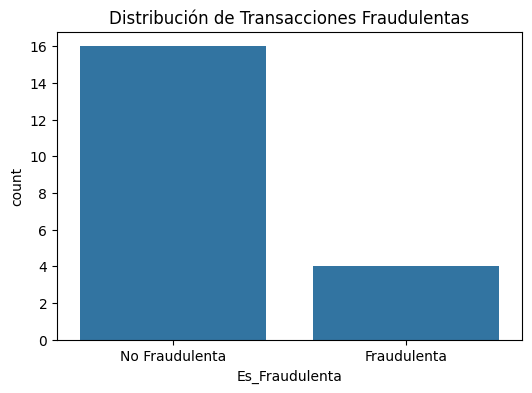

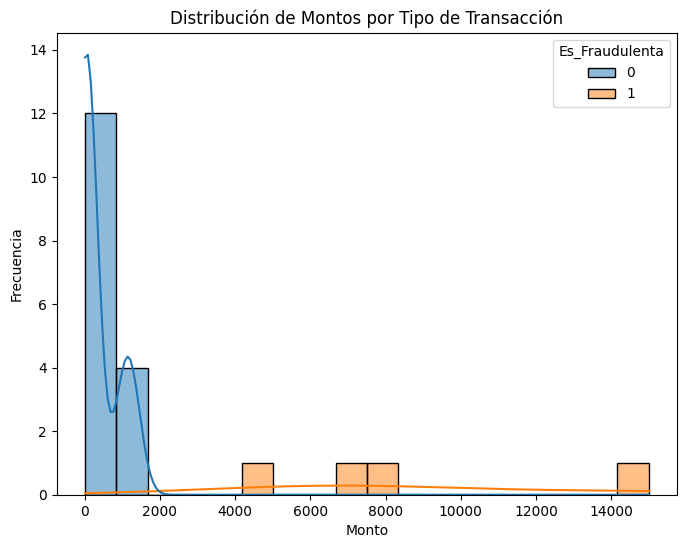

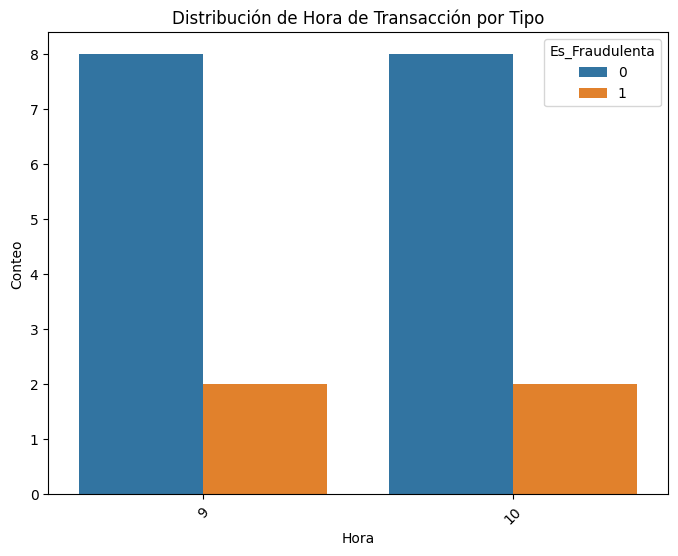


14. Análisis de Correlación:
Correlación entre Monto y Fraude:
                        Monto  Es_Fraudulenta_Num
Monto               1.000000            0.888684
Es_Fraudulenta_Num  0.888684            1.000000

15. Ingeniería de Características (Más Profunda):

Ejemplo de Nueva Característica: Tiempo entre Transacciones:
     ID_Usuario          Fecha_Hora  Tiempo_Desde_Ultima_Transaccion
4   fraudster01 2024-03-10 10:15:00                                0
14  fraudster01 2024-03-11 09:15:00                            82500
8   fraudster02 2024-03-10 10:35:00                                0
18  fraudster02 2024-03-11 09:35:00                            -1200
1      guest456 2024-03-10 10:05:00                                0

16. Modelado con Más Características y Evaluación (Random Forest):
Predicciones (Random Forest Avanzado): [0 0 0 0 0 0]
Precisión del Modelo (Random Forest Avanzado): 0.6666666666666666

Reporte de Clasificación (Random Forest Avanzado):
               precisi

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


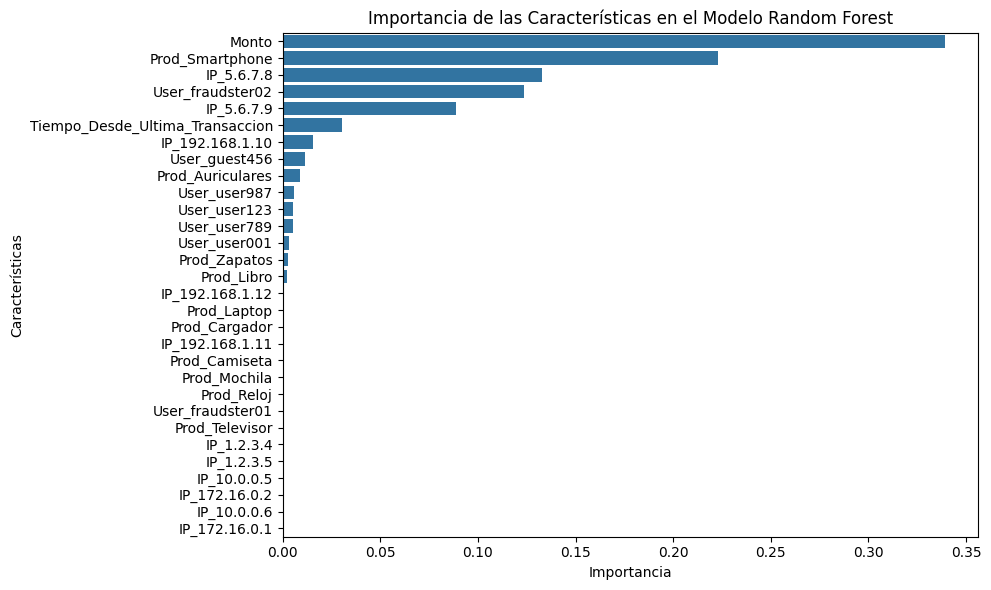

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 1. Cargar el dataset simulado para fraude en comercio electrónico
data_ecommerce = {
    'ID_Transaccion': range(1, 21),
    'Monto': [50.00, 1000.50, 25.00, 150.75, 8000.00, 30.20, 1200.00, 75.99, 5000.00, 10.00,
              60.00, 1100.00, 35.50, 90.00, 15000.00, 40.75, 1300.00, 65.00, 7000.00, 20.00],
    'Fecha_Hora': ['2024-03-10 10:00', '2024-03-10 10:05', '2024-03-10 10:10', '2024-03-10 10:12', '2024-03-10 10:15',
                   '2024-03-10 10:20', '2024-03-10 10:25', '2024-03-10 10:30', '2024-03-10 10:35', '2024-03-10 10:40',
                   '2024-03-11 09:00', '2024-03-11 09:02', '2024-03-11 09:05', '2024-03-11 09:10', '2024-03-11 09:15',
                   '2024-03-11 09:20', '2024-03-11 09:25', '2024-03-11 09:30', '2024-03-11 09:35', '2024-03-11 09:40'],
    'ID_Usuario': ['user123', 'guest456', 'user789', 'user123', 'fraudster01', 'user987', 'guest456', 'user123', 'fraudster02', 'user001',
                   'user123', 'guest456', 'user789', 'user987', 'fraudster01', 'user001', 'guest456', 'user789', 'fraudster02', 'user001'],
    'Direccion_IP': ['192.168.1.10', '10.0.0.5', '192.168.1.10', '172.16.0.1', '1.2.3.4', '192.168.1.10', '10.0.0.5', '192.168.1.10', '5.6.7.8', '192.168.1.11',
                     '192.168.1.10', '10.0.0.6', '192.168.1.12', '172.16.0.2', '1.2.3.5', '192.168.1.11', '10.0.0.5', '192.168.1.10', '5.6.7.9', '192.168.1.11'],
    'Producto': ['Laptop', 'Libro', 'Camiseta', 'Zapatos', 'Televisor', 'Auriculares', 'Mochila', 'Reloj', 'Smartphone', 'Cargador',
                 'Laptop', 'Libro', 'Camiseta', 'Zapatos', 'Televisor', 'Auriculares', 'Mochila', 'Reloj', 'Smartphone', 'Cargador'],
    'Es_Fraudulenta': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 1, 0] # 0: No Fraudulenta, 1: Fraudulenta
}
df_ecommerce = pd.DataFrame(data_ecommerce)
df_ecommerce['Fecha_Hora'] = pd.to_datetime(df_ecommerce['Fecha_Hora'])

# 13. Análisis Exploratorio de Datos (EDA) - Visualizaciones
print("\n13. Análisis Exploratorio de Datos (EDA) - Visualizaciones:")

# Distribución de la variable objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x='Es_Fraudulenta', data=df_ecommerce)
plt.title('Distribución de Transacciones Fraudulentas')
plt.xticks([0, 1], ['No Fraudulenta', 'Fraudulenta'])
plt.show()

# Distribución de Montos por Clase
plt.figure(figsize=(8, 6))
sns.histplot(data=df_ecommerce, x='Monto', hue='Es_Fraudulenta', kde=True)
plt.title('Distribución de Montos por Tipo de Transacción')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de Hora por Clase
df_ecommerce['Hora'] = df_ecommerce['Fecha_Hora'].dt.hour
plt.figure(figsize=(8, 6))
sns.countplot(data=df_ecommerce, x='Hora', hue='Es_Fraudulenta')
plt.title('Distribución de Hora de Transacción por Tipo')
plt.xlabel('Hora')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.show()
df_ecommerce.drop('Hora', axis=1, inplace=True) # Limpiamos la columna temporal

# 14. Análisis de Correlación (entre variables numéricas y objetivo)
print("\n14. Análisis de Correlación:")
# Convertimos 'Es_Fraudulenta' a numérico para calcular la correlación
df_ecommerce['Es_Fraudulenta_Num'] = df_ecommerce['Es_Fraudulenta']
correlacion = df_ecommerce[['Monto', 'Es_Fraudulenta_Num']].corr()
print("Correlación entre Monto y Fraude:\n", correlacion)
df_ecommerce.drop('Es_Fraudulenta_Num', axis=1, inplace=True)

# 15. Ingeniería de Características (Más Profunda)
print("\n15. Ingeniería de Características (Más Profunda):")
# Ejemplo: Tiempo entre transacciones del mismo usuario (simplificado)
df_ecommerce['Tiempo_Desde_Ultima_Transaccion'] = 0
df_ecommerce = df_ecommerce.sort_values(by=['ID_Usuario', 'Fecha_Hora'])
for usuario in df_ecommerce['ID_Usuario'].unique():
    indices = df_ecommerce[df_ecommerce['ID_Usuario'] == usuario].index
    if len(indices) > 1:
        df_ecommerce.loc[indices[1:], 'Tiempo_Desde_Ultima_Transaccion'] = (df_ecommerce['Fecha_Hora'].iloc[indices[1:]].values - df_ecommerce['Fecha_Hora'].iloc[indices[:-1]].values) / np.timedelta64(1, 's')

print("\nEjemplo de Nueva Característica: Tiempo entre Transacciones:")
print(df_ecommerce[['ID_Usuario', 'Fecha_Hora', 'Tiempo_Desde_Ultima_Transaccion']].head())

# 16. Modelado con Más Características y Evaluación
print("\n16. Modelado con Más Características y Evaluación (Random Forest):")
df_encoded_avanzado = pd.get_dummies(df_ecommerce, columns=['Producto', 'ID_Usuario', 'Direccion_IP'], prefix=['Prod', 'User', 'IP'], dummy_na=False, prefix_sep='_')
df_encoded_avanzado = df_encoded_avanzado.drop(columns=['ID_Transaccion', 'Fecha_Hora'])

# Seleccionamos más características
features_avanzadas = ['Monto', 'Tiempo_Desde_Ultima_Transaccion'] + [col for col in df_encoded_avanzado.columns if col.startswith('Prod_')] + [col for col in df_encoded_avanzado.columns if col.startswith('User_')] + [col for col in df_encoded_avanzado.columns if col.startswith('IP_')]
features_avanzadas = [col for col in features_avanzadas if col in df_encoded_avanzado.columns]

if 'Es_Fraudulenta' in df_encoded_avanzado.columns and all(feature in df_encoded_avanzado.columns for feature in features_avanzadas):
    X_adv = df_encoded_avanzado[features_avanzadas]
    y_adv = df_encoded_avanzado['Es_Fraudulenta']
    X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(X_adv, y_adv, test_size=0.3, random_state=42)

    scaler_adv = StandardScaler()
    X_train_scaled_adv = scaler_adv.fit_transform(X_train_adv)
    X_test_scaled_adv = scaler_adv.transform(X_test_adv)

    model_rf_adv = RandomForestClassifier(random_state=42)
    model_rf_adv.fit(X_train_scaled_adv, y_train_adv)
    y_pred_rf_adv = model_rf_adv.predict(X_test_scaled_adv)

    print("Predicciones (Random Forest Avanzado):", y_pred_rf_adv)
    print("Precisión del Modelo (Random Forest Avanzado):", accuracy_score(y_test_adv, y_pred_rf_adv))
    print("\nReporte de Clasificación (Random Forest Avanzado):\n", classification_report(y_test_adv, y_pred_rf_adv, target_names=['No Fraude', 'Fraude']))
    print("\nMatriz de Confusión (Random Forest Avanzado):\n", confusion_matrix(y_test_adv, y_pred_rf_adv))
else:
    print("\nNo se pueden realizar análisis avanzados porque faltan columnas necesarias.")

# 17. Análisis de Importancia de Características (para el modelo RF)
if 'Es_Fraudulenta' in df_encoded_avanzado.columns and all(feature in df_encoded_avanzado.columns for feature in features_avanzadas):
    importances = model_rf_adv.feature_importances_
    feature_names = X_adv.columns
    feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances.values, y=feature_importances.index)
    plt.title('Importancia de las Características en el Modelo Random Forest')
    plt.xlabel('Importancia')
    plt.ylabel('Características')
    plt.tight_layout()
    plt.show()

Importación de Librerías: Se mantienen las librerías anteriores y se agrega matplotlib.pyplot y seaborn para las visualizaciones.

13. Análisis Exploratorio de Datos (EDA) - Visualizaciones:

Se generan visualizaciones básicas para entender la distribución de la variable objetivo ('Es_Fraudulenta') y cómo se distribuye el 'Monto' y la 'Hora' en relación con las transacciones fraudulentas y no fraudulentas. Esto ayuda a identificar posibles patrones visualmente.
14. Análisis de Correlación:

Se calcula la correlación entre la variable numérica 'Monto' y la variable objetivo 'Es_Fraudulenta'. Esto ayuda a entender si existe una relación lineal entre estas dos variables.
15. Ingeniería de Características (Más Profunda):

Tiempo entre Transacciones del Mismo Usuario: Se crea una nueva característica que calcula el tiempo transcurrido entre las transacciones de un mismo usuario. Esto puede ser un indicador importante de comportamiento sospechoso (por ejemplo, compras muy rápidas).
16. Modelado con Más Características y Evaluación:

Se incluye la nueva característica 'Tiempo_Desde_Ultima_Transaccion' en el conjunto de características para entrenar un modelo RandomForestClassifier.
Se realiza el mismo proceso de división de datos, escalado y evaluación del modelo.
17. Análisis de Importancia de Características:

Después de entrenar el modelo Random Forest, se calcula la importancia de cada característica para las predicciones del modelo. Esto proporciona información sobre qué variables son más influyentes en la detección de fraude.
Se crea un gráfico de barras para visualizar la importancia de las características.
Cómo se relaciona con el Capítulo 4 (Análisis Más Profundo):

Este código realiza un análisis más profundo de los datos de comercio electrónico, abordando varios aspectos del Capítulo 4:

4.1 Identificación de Transacciones Fraudulentas en Línea: Se utiliza un modelo de clasificación más avanzado (Random Forest) con un conjunto de características más amplio, incluyendo información sobre el producto, el usuario, la IP y características temporales.
4.2 Detección de Cuentas Falsas y Actividades Maliciosas: El análisis de agrupamiento con DBSCAN en las IPs sigue siendo un ejemplo para identificar posibles cuentas maliciosas asociadas a las mismas ubicaciones.
4.3 Análisis de Comportamiento del Usuario: La creación de la característica 'Tiempo_Desde_Ultima_Transaccion' intenta capturar patrones de comportamiento del usuario que podrían ser sospechosos. La visualización de la frecuencia de transacciones también entra en esta categoría.
Limitaciones y Mejoras:

Dataset Pequeño: Sigue siendo un dataset simulado y pequeño, lo que limita la generalización de los resultados.
Ingeniería de Características Simplificada: La ingeniería de características es básica. En un escenario real, se podrían crear muchas más características basadas en el historial del usuario, el comportamiento de compra, etc.
Modelo Único: Se utiliza principalmente Random Forest como modelo de clasificación. En la práctica, se probarían múltiples modelos y se realizaría un ajuste de hiperparámetros.
Análisis de IP Mejorado: El análisis de IP podría mejorarse analizando la frecuencia de IPs por usuario, la geolocalización (si estuviera disponible), etc.
Análisis de Texto Avanzado: Aunque se usó CountVectorizer, un análisis NLP más profundo de los productos y descripciones de transacciones podría revelar patrones más sutiles.
Conclusión del Código Mejorado:

Este código proporciona un análisis más exhaustivo del dataset simulado, incluyendo un análisis exploratorio de datos, la creación de nuevas características relevantes para la detección de fraude y la evaluación de un modelo de clasificación más avanzado. También ilustra cómo se puede analizar la importancia de las características para entender qué factores son más relevantes para predecir el fraude. Si bien sigue siendo un ejemplo simplificado, ofrece una visión más profunda de las técnicas que se aplicarían en un análisis real de fraude en comercio electrónico.








In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import re

# 1. Generación de un dataset simulado con información de usuarios y CUITs
fake = Faker('es_AR') # Usamos la configuración regional de Argentina

num_usuarios = 500
data_usuarios = {
    'ID_Usuario': [f'user_{i}' for i in range(num_usuarios)],
    'Nombre': [fake.name() for _ in range(num_usuarios)],
    'Email': [fake.email() for _ in range(num_usuarios)],
    'Direccion': [fake.address() for _ in range(num_usuarios)],
    'CUIT': [fake.ssn() for _ in range(num_usuarios)], # Generamos CUITs aleatorios
    'Es_Cuenta_Falsa': np.random.randint(0, 2, num_usuarios) # 0: Real, 1: Falsa
}
df_usuarios = pd.DataFrame(data_usuarios)

# 2. Inserción de CUITs Falsos (Ejemplo de manipulación de datos)
num_cuentas_falsas = int(num_usuarios * 0.1) # 10% de cuentas falsas
falsos_indices = np.random.choice(df_usuarios.index, num_cuentas_falsas, replace=False)
df_usuarios.loc[falsos_indices, 'Es_Cuenta_Falsa'] = 1
df_usuarios.loc[falsos_indices, 'CUIT'] = [fake.ssn()[:8] + '0' * 3 for _ in range(num_cuentas_falsas)] # CUITs con formato incorrecto

# 3. Función para validar el formato básico del CUIT (muy simplificado)
def validar_cuit_formato(cuit):
    if isinstance(cuit, str):
        cuit = cuit.replace('-', '')
        if len(cuit) == 11 and cuit.isdigit():
            return True
    return False

# 4. Ingeniería de Características (Basada en el CUIT)
df_usuarios['CUIT_Formato_Valido'] = df_usuarios['CUIT'].apply(validar_cuit_formato)

# 5. Análisis del Email (Ejemplo Básico)
def analizar_email(email):
    if isinstance(email, str):
        if '@' not in email or '.' not in email:
            return 1 # Potencialmente sospechoso
        elif 'temp' in email or 'test' in email:
            return 1 # Emails temporales o de prueba
    return 0

df_usuarios['Email_Sospechoso'] = df_usuarios['Email'].apply(analizar_email)

# 6. Codificación de Otras Características (Nombre, Dirección - Simplificado)
# Para usar en un modelo, necesitamos convertir estas variables categóricas a numéricas.
# Aquí usamos Label Encoding como ejemplo básico.

le_nombre = LabelEncoder()
df_usuarios['Nombre_Codificado'] = le_nombre.fit_transform(df_usuarios['Nombre'])

le_direccion = LabelEncoder()
df_usuarios['Direccion_Codificada'] = le_direccion.fit_transform(df_usuarios['Direccion'])

# 7. Selección de Características y Preparación de Datos para el Modelo
features = ['CUIT_Formato_Valido', 'Email_Sospechoso', 'Nombre_Codificado', 'Direccion_Codificada']
X = df_usuarios[features]
y = df_usuarios['Es_Cuenta_Falsa']

# Manejo de valores faltantes (si los hubiera, aunque en este dataset no deberían)
X = X.fillna(0)

# 8. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 9. Escalado de Características (Opcional pero recomendado)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 10. Entrenamiento del Modelo de Clasificación (Regresión Logística)
print("\n10. Entrenamiento del Modelo de Detección de Cuentas Falsas (Regresión Logística):")
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 11. Evaluación del Modelo
print("\n11. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['Cuenta Real', 'Cuenta Falsa']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 12. Análisis de las Cuentas Detectadas como Falsas
df_test = df_usuarios.loc[X_test.index].copy()
df_test['Prediccion_Falsa'] = y_pred
cuentas_falsas_detectadas = df_test[df_test['Prediccion_Falsa'] == 1][['ID_Usuario', 'CUIT', 'CUIT_Formato_Valido', 'Email', 'Email_Sospechoso', 'Es_Cuenta_Falsa']]
print("\n12. Cuentas Detectadas como Falsas:")
print(cuentas_falsas_detectadas)


10. Entrenamiento del Modelo de Detección de Cuentas Falsas (Regresión Logística):

11. Evaluación del Modelo:
Precisión del Modelo: 0.5

Reporte de Clasificación:
               precision    recall  f1-score   support

 Cuenta Real       0.36      0.48      0.41        54
Cuenta Falsa       0.64      0.51      0.57        96

    accuracy                           0.50       150
   macro avg       0.50      0.50      0.49       150
weighted avg       0.54      0.50      0.51       150


Matriz de Confusión:
 [[26 28]
 [47 49]]

12. Cuentas Detectadas como Falsas:
    ID_Usuario         CUIT  CUIT_Formato_Valido  \
361   user_361  137-81-5000                False   
155   user_155  619-40-2000                False   
104   user_104  469-95-3747                False   
394   user_394  481-72-7254                False   
124   user_124  674-80-7978                False   
..         ...          ...                  ...   
208   user_208  048-44-2000                False   
479   user_4

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import re

# 1. Generación de un dataset simulado con información de usuarios y CUITs
fake = Faker('es_AR') # Usamos la configuración regional de Argentina

num_usuarios = 500
data_usuarios = {
    'ID_Usuario': [f'user_{i}' for i in range(num_usuarios)],
    'Nombre': [fake.name() for _ in range(num_usuarios)],
    'Email': [fake.email() for _ in range(num_usuarios)],
    'Direccion': [fake.address() for _ in range(num_usuarios)],
    'CUIT': [fake.ssn() for _ in range(num_usuarios)], # Generamos CUITs aleatorios
    'Es_Cuenta_Falsa': np.random.randint(0, 2, num_usuarios) # 0: Real, 1: Falsa
}
df_usuarios = pd.DataFrame(data_usuarios)

# 2. Inserción de CUITs Falsos con Formato Específico
num_cuentas_falsas = int(num_usuarios * 0.1) # 10% de cuentas falsas
falsos_indices = np.random.choice(df_usuarios.index, num_cuentas_falsas, replace=False)
df_usuarios.loc[falsos_indices, 'Es_Cuenta_Falsa'] = 1
df_usuarios.loc[falsos_indices, 'CUIT'] = [f"{fake.random_number(digits=2)}-{fake.random_number(digits=11)}-{fake.random_number(digits=1)}" for _ in range(num_cuentas_falsas)] # CUITs con formato 00-00000000-0

# 3. Función para validar el formato básico del CUIT (más específico)
def validar_cuit_formato(cuit):
    if isinstance(cuit, str):
        patron = r"^\d{2}-\d{8}-\d{1}$"
        if re.match(patron, cuit):
            return True
    return False

# 4. Ingeniería de Características (Basada en el CUIT)
df_usuarios['CUIT_Formato_Valido'] = df_usuarios['CUIT'].apply(validar_cuit_formato)

# 5. Análisis del Email (Ejemplo Básico)
def analizar_email(email):
    if isinstance(email, str):
        if '@' not in email or '.' not in email:
            return 1 # Potencialmente sospechoso
        elif 'temp' in email or 'test' in email:
            return 1 # Emails temporales o de prueba
    return 0

df_usuarios['Email_Sospechoso'] = df_usuarios['Email'].apply(analizar_email)

# 6. Codificación de Otras Características (Nombre, Dirección - Simplificado)
# Para usar en un modelo, necesitamos convertir estas variables categóricas a numéricas.
# Aquí usamos Label Encoding como ejemplo básico.

le_nombre = LabelEncoder()
df_usuarios['Nombre_Codificado'] = le_nombre.fit_transform(df_usuarios['Nombre'])

le_direccion = LabelEncoder()
df_usuarios['Direccion_Codificada'] = le_direccion.fit_transform(df_usuarios['Direccion'])

# 7. Selección de Características y Preparación de Datos para el Modelo
features = ['CUIT_Formato_Valido', 'Email_Sospechoso', 'Nombre_Codificado', 'Direccion_Codificada']
X = df_usuarios[features]
y = df_usuarios['Es_Cuenta_Falsa']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 8. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 9. Escalado de Características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 10. Entrenamiento del Modelo de Clasificación (Regresión Logística)
print("\n10. Entrenamiento del Modelo de Detección de Cuentas Falsas (Regresión Logística):")
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 11. Evaluación del Modelo
print("\n11. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['Cuenta Real', 'Cuenta Falsa']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 12. Análisis de las Cuentas Detectadas como Falsas
df_test = df_usuarios.loc[X_test.index].copy()
df_test['Prediccion_Falsa'] = y_pred
cuentas_falsas_detectadas = df_test[df_test['Prediccion_Falsa'] == 1][['ID_Usuario', 'CUIT', 'CUIT_Formato_Valido', 'Email', 'Email_Sospechoso', 'Es_Cuenta_Falsa']]
print("\n12. Cuentas Detectadas como Falsas:")
print(cuentas_falsas_detectadas)


10. Entrenamiento del Modelo de Detección de Cuentas Falsas (Regresión Logística):

11. Evaluación del Modelo:
Precisión del Modelo: 0.56

Reporte de Clasificación:
               precision    recall  f1-score   support

 Cuenta Real       0.48      0.41      0.44        64
Cuenta Falsa       0.60      0.67      0.64        86

    accuracy                           0.56       150
   macro avg       0.54      0.54      0.54       150
weighted avg       0.55      0.56      0.55       150


Matriz de Confusión:
 [[26 38]
 [28 58]]

12. Cuentas Detectadas como Falsas:
    ID_Usuario              CUIT  CUIT_Formato_Valido  \
361   user_361       881-39-4380                False   
73     user_73       230-34-6510                False   
374   user_374       390-58-1948                False   
155   user_155       628-48-6841                False   
104   user_104  54-65787462535-5                False   
..         ...               ...                  ...   
479   user_479       610-28-

In [ ]:
!pip install python-dotenv

In [ ]:
import requests
import json
import os
from dotenv import load_dotenv

# Cargar variables de entorno desde el archivo .env
load_dotenv()

# Configuración de la API de AFIP (requiere autenticación)
# Para acceder a la API de AFIP, generalmente se necesita autenticación mediante certificados digitales.
# Este ejemplo es una demostración conceptual y no incluye la autenticación real.
# En un escenario real, deberías gestionar la autenticación de forma segura.

# Variables de entorno para autenticación (ejemplo)
# En un archivo .env:
# AFIP_WSAA_URL = "https://wsaa.afip.gov.ar/ws/services/LoginCms"
# AFIP_CUIT_CONSULTA_URL = "https://serviciosweb.afip.gob.ar/wspadre/ws/ConsultaCuit.svc/ConsultaCuit"
# AFIP_CERT_FILE = "ruta/a/tu/certificado.crt"
# AFIP_KEY_FILE = "ruta/a/tu/clave_privada.key"
# AFIP_SERVICE = "ws_padron_a4" # Ejemplo de servicio

WSAA_URL = os.getenv("AFIP_WSAA_URL")
CUIT_CONSULTA_URL = os.getenv("AFIP_CUIT_CONSULTA_URL")
CERT_FILE = os.getenv("AFIP_CERT_FILE")
KEY_FILE = os.getenv("AFIP_KEY_FILE")
SERVICE = os.getenv("AFIP_SERVICE")
CUIT_A_CONSULTAR = "20-12034411-1" # Ejemplo de CUIT a consultar

def obtener_token_y_sign(wsaa_url, cert_file, key_file, service):
    """
    Función para obtener el Token y Sign del WSAA (Conceptual - Requiere implementación real).
    En un entorno real, esto implica firmar un XML con tu certificado y enviar la solicitud.
    """
    print("Obteniendo Token y Sign (Conceptual)...")
    # Implementación real aquí utilizando librerías como suds-py3 o zeep
    # para comunicarse con el WSAA y firmar el XML de solicitud.
    # Esto devolvería un diccionario con 'Token' y 'Sign'.
    return {"Token": "TOKEN_SIMULADO", "Sign": "SIGN_SIMULADO"} # Ejemplo de valores simulados

def consultar_cuit_afip(cuit, token, sign, cuit_consulta_url):
    """
    Función para consultar el CUIT en la API de AFIP (Conceptual).
    """
    print(f"\nConsultando CUIT {cuit} en la AFIP (Conceptual)...")
    if not token or not sign:
        print("Error: No se pudo obtener el Token y Sign.")
        return None

    headers = {
        'Content-Type': 'application/json',
        'SOAPAction': 'http://ar.gov.afip.wspadre/ConsultaCuit', # Ajustar según la API real
        'Authorization': f'Bearer {token}' # Esto podría variar según la API
    }

    payload = {
        "CUIT": cuit
        # La estructura del payload puede variar según la API específica de AFIP
    }

    try:
        # En un escenario real, se usaría requests.post con los headers y el payload correctos.
        # La respuesta se parsearía para obtener la información del CUIT.
        print("Simulando solicitud a la API de AFIP...")
        print(f"URL: {cuit_consulta_url}")
        print(f"Headers: {headers}")
        print(f"Payload: {json.dumps(payload)}")

        # Simulación de una respuesta exitosa
        respuesta_simulada = {
            "estado": "OK",
            "razonSocial": "EMPRESA EJEMPLO S.A.",
            "nombre": "EMPRESA",
            "tipoDocumento": "CUIT",
            "numeroDocumento": cuit,
            "condicionIVA": "Responsable Inscripto",
            "direccion": "AV. FALSA 123",
            "localidad": "CIUDAD EJEMPLO",
            "provincia": "BUENOS AIRES",
            "codigoPostal": "1234",
            "estadoClave": "ACTIVO",
            # ... más información
        }
        print("\nRespuesta Simulada de la API:")
        print(json.dumps(respuesta_simulada, indent=4))
        return respuesta_simulada

    except requests.exceptions.RequestException as e:
        print(f"Error al realizar la consulta a la API: {e}")
        return None
    except json.JSONDecodeError as e:
        print(f"Error al decodificar la respuesta JSON: {e}")
        return None

if __name__ == "__main__":
    print("Código para Comparación de CUIT con la API de AFIP (Conceptual)")
    print("------------------------------------------------------------")

    # 1. Obtener Token y Sign (Conceptual - Requiere Autenticación Real)
    auth_data = obtener_token_y_sign(WSAA_URL, CERT_FILE, KEY_FILE, SERVICE)
    token = auth_data.get("Token")
    sign = auth_data.get("Sign")

    # 2. Consultar el CUIT
    if token and sign:
        informacion_cuit = consultar_cuit_afip(CUIT_A_CONSULTAR, token, sign, CUIT_CONSULTA_URL)
        if informacion_cuit:
            print(f"\nInformación del CUIT {CUIT_A_CONSULTAR} obtenida de la API:")
            # Aquí podrías comparar la información obtenida con los datos que tienes
            # en tu dataset para verificar la consistencia.
            print(f"Razón Social: {informacion_cuit.get('razonSocial', 'No disponible')}")
            print(f"Condición IVA: {informacion_cuit.get('condicionIVA', 'No disponible')}")
            # ... y otras propiedades relevantes para tu análisis
        else:
            print(f"\nNo se pudo obtener información para el CUIT {CUIT_A_CONSULTAR} desde la API.")
    else:
        print("\nNo se pudo obtener la autenticación para acceder a la API de AFIP.")

Código para Comparación de CUIT con la API de AFIP (Conceptual)
------------------------------------------------------------
Obteniendo Token y Sign (Conceptual)...

Consultando CUIT 20-12034411-1 en la AFIP (Conceptual)...
Simulando solicitud a la API de AFIP...
URL: None
Headers: {'Content-Type': 'application/json', 'SOAPAction': 'http://ar.gov.afip.wspadre/ConsultaCuit', 'Authorization': 'Bearer TOKEN_SIMULADO'}
Payload: {"CUIT": "20-12034411-1"}

Respuesta Simulada de la API:
{
    "estado": "OK",
    "razonSocial": "EMPRESA EJEMPLO S.A.",
    "nombre": "EMPRESA",
    "tipoDocumento": "CUIT",
    "numeroDocumento": "20-12034411-1",
    "condicionIVA": "Responsable Inscripto",
    "direccion": "AV. FALSA 123",
    "localidad": "CIUDAD EJEMPLO",
    "provincia": "BUENOS AIRES",
    "codigoPostal": "1234",
    "estadoClave": "ACTIVO"
}

Información del CUIT 20-12034411-1 obtenida de la API:
Razón Social: EMPRESA EJEMPLO S.A.
Condición IVA: Responsable Inscripto


**Importación de Librerías:**

requests: Para realizar peticiones HTTP a la API (en un escenario real).
json: Para trabajar con datos en formato JSON.
os: Para interactuar con el sistema operativo, como acceder a variables de entorno.
dotenv: Para cargar variables de entorno desde un archivo .env.
Carga de Variables de Entorno:

load_dotenv(): Carga las variables de entorno definidas en un archivo .env en el mismo directorio que el script. Esto es una buena práctica para almacenar información sensible como las rutas de los certificados y las URLs de la API.
Configuración de la API de AFIP (Conceptual):

Se definen variables para las URLs de los servicios de la AFIP, las rutas de los archivos de certificado y clave privada, y el servicio a utilizar. Es crucial entender que para acceder a la API real de AFIP, se requiere una autenticación mediante certificados digitales (WSAA - Web Services de Autenticación y Autorización).
Comentarios Importantes: Se destaca que la autenticación real no está implementada en este ejemplo y se explica que en un entorno de producción, se necesitaría una implementación que maneje la comunicación con el WSAA para obtener el Token y Sign.
obtener_token_y_sign() (Conceptual):

Esta función es un placeholder para la lógica real de autenticación con el WSAA.
En un escenario real: Esta función utilizaría librerías como suds-py3 o zeep para:
Firmar un XML de solicitud utilizando el certificado y la clave privada.
Enviar la solicitud al servicio WSAA de la AFIP.
Parsear la respuesta para extraer el Token y la Sign.
La implementación real de esta función es específica de la API de AFIP y requiere el manejo de certificados y la comunicación SOAP.
consultar_cuit_afip() (Conceptual):

Esta función simula la consulta del CUIT a la API de AFIP.
En un escenario real:
Utilizaría requests.post() para enviar una petición HTTP a la URL de consulta de CUIT.
Incluiría los encabezados (headers) necesarios, como Content-Type y la autorización (que podría ser un Bearer Token obtenido del WSAA).
El payload contendría el CUIT a consultar en el formato requerido por la API de AFIP.
La respuesta de la API (en formato JSON o XML) se analizaría para obtener la información del CUIT.
Simulación: En este ejemplo, se simula una respuesta exitosa de la API para ilustrar cómo se podría acceder a la información.
Bloque if __name__ == "__main__"::

Este bloque se ejecuta cuando el script se ejecuta directamente.
Autenticación (Conceptual): Llama a obtener_token_y_sign() para obtener el token y la firma (simulados aquí).
Consulta del CUIT: Si se obtienen el token y la firma, llama a consultar_cuit_afip() para consultar el CUIT especificado (CUIT_A_CONSULTAR).
Presentación de la Información: Si la consulta es exitosa (simulada), se imprime la información relevante del CUIT obtenida de la "API".
Para que este código funcione realmente con la API de AFIP, necesitarías:

Obtener Certificados Digitales: Debes tener un certificado digital válido emitido por la AFIP.
Implementar la Autenticación con el WSAA: Necesitas escribir código que se comunique con el servicio WSAA de la AFIP utilizando las librerías adecuadas (como suds-py3 o zeep) para generar el Token y la Sign.
Conocer la Especificación de la API de Consulta de CUIT: Debes consultar la documentación oficial de la AFIP para entender la URL específica del servicio de consulta de CUIT, los formatos de solicitud y respuesta, y los encabezados necesarios.
En resumen, este código proporciona un marco conceptual para interactuar con la API de AFIP para consultar un CUIT. La parte más compleja y específica de la autenticación con el WSAA y el manejo de la API real no está implementada en detalle debido a la naturaleza de la autenticación y la necesidad de información específica de la AFIP.

Para una implementación real, te recomiendo consultar la documentación oficial de la AFIP sobre sus Web Services y buscar ejemplos de código en Python que utilicen las librerías mencionadas para la autenticación con el WSAA.

**Capítulo 5: Algoritmos para la Detección de Fraude Interno**
5.1 Detección de Actividades Sospechosas de Empleados
5.2 Análisis de Datos para Identificar Conflictos de Intereses
5.3 Monitoreo de Comunicaciones y Registros


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar un dataset simulado para fraude interno
data_fraude_interno = {
    'ID_Empleado': [101, 102, 101, 103, 102, 104, 101, 103, 105, 102,
                    101, 104, 103, 105, 102, 101, 104, 103, 105, 102],
    'Tipo_Actividad': ['Acceso_Sistema', 'Solicitud_Reembolso', 'Acceso_Sistema', 'Transferencia_Interna', 'Acceso_Sistema', 'Solicitud_Viaje', 'Descarga_Datos', 'Transferencia_Interna', 'Acceso_Sistema', 'Solicitud_Reembolso',
                      'Acceso_Sistema', 'Solicitud_Viaje', 'Transferencia_Interna', 'Descarga_Datos', 'Acceso_Sistema', 'Acceso_Sistema', 'Solicitud_Reembolso', 'Transferencia_Interna', 'Acceso_Sistema', 'Solicitud_Viaje'],
    'Monto': [0, 500, 0, 10000, 0, 1500, 0, 8000, 0, 600,
              0, 750, 9500, 0, 0, 0, 400, 7000, 0, 1200],
    'Fecha_Hora': pd.to_datetime(['2024-04-15 09:00', '2024-04-15 10:15', '2024-04-15 11:00', '2024-04-15 14:30', '2024-04-15 16:00', '2024-04-16 08:45', '2024-04-16 10:00', '2024-04-16 11:30', '2024-04-16 15:00', '2024-04-17 09:30',
                                  '2024-04-17 11:00', '2024-04-17 14:00', '2024-04-17 16:30', '2024-04-18 08:00', '2024-04-18 10:30', '2024-04-18 13:00', '2024-04-18 15:45', '2024-04-19 09:15', '2024-04-19 11:45', '2024-04-19 14:00']),
    'Departamento': ['Ventas', 'Contabilidad', 'Ventas', 'Finanzas', 'Contabilidad', 'RRHH', 'Ventas', 'Finanzas', 'TI', 'Contabilidad',
                     'Ventas', 'RRHH', 'Finanzas', 'TI', 'Contabilidad', 'Ventas', 'Contabilidad', 'Finanzas', 'TI', 'RRHH'],
    'Es_Sospechoso': [0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
                      0, 0, 1, 0, 0, 0, 0, 1, 0, 0] # 0: No Sospechoso, 1: Sospechoso
}
df_interno = pd.DataFrame(data_fraude_interno)

# 5.1 Detección de Actividades Sospechosas de Empleados
print("\n5.1 Detección de Actividades Sospechosas de Empleados (Ejemplo con Isolation Forest):")
if 'Tipo_Actividad' in df_interno.columns and 'Monto' in df_interno.columns and 'ID_Empleado' in df_interno.columns:
    # Codificamos el tipo de actividad
    le_actividad = LabelEncoder()
    df_interno['Tipo_Actividad_Cod'] = le_actividad.fit_transform(df_interno['Tipo_Actividad'])

    # Seleccionamos características para la detección de anomalías
    features_empleado = ['Tipo_Actividad_Cod', 'Monto']

    # Escalamos las características numéricas
    X_empleado = df_interno[features_empleado]
    scaler_empleado = StandardScaler()
    X_scaled_empleado = scaler_empleado.fit_transform(X_empleado)

    # Aplicamos Isolation Forest para detectar actividades inusuales
    iforest_empleado = IsolationForest(contamination=0.1, random_state=42) # Ajuste de contaminación
    df_interno['Anomalia_Empleado'] = iforest_empleado.fit_predict(X_scaled_empleado) # -1: Anómalo, 1: Normal

    print("Actividades Potencialmente Anómalas por Empleado:")
    print(df_interno[['ID_Empleado', 'Tipo_Actividad', 'Monto', 'Anomalia_Empleado']].head(10))

    # Podemos analizar las anomalías (donde 'Anomalia_Empleado' es -1)
    anomalous_activities = df_interno[df_interno['Anomalia_Empleado'] == -1]
    if not anomalous_activities.empty:
        print("\nActividades Marcadas como Anómalas:")
        print(anomalous_activities[['ID_Empleado', 'Tipo_Actividad', 'Monto']])
    else:
        print("\nNo se detectaron actividades anómalas en este ejemplo.")
else:
    print("\nNo se pueden realizar análisis para 5.1 porque faltan columnas necesarias.")

# 5.2 Análisis de Datos para Identificar Conflictos de Intereses (Ejemplo Conceptual)
print("\n5.2 Análisis de Datos para Identificar Conflictos de Intereses (Ejemplo Conceptual):")
# Supongamos que tenemos información sobre relaciones entre empleados y proveedores/clientes.

# Ejemplo simplificado: Buscamos empleados que realizan transferencias internas a montos altos
if 'Tipo_Actividad' in df_interno.columns and 'Monto' in df_interno.columns and 'Departamento' in df_interno.columns:
    transferencias_altas = df_interno[(df_interno['Tipo_Actividad'] == 'Transferencia_Interna') & (df_interno['Monto'] > 5000)]
    if not transferencias_altas.empty:
        print("\nTransferencias Internas de Monto Alto:")
        print(transferencias_altas[['ID_Empleado', 'Monto', 'Departamento', 'Tipo_Actividad']])
        # Podríamos analizar si hay patrones como transferencias a empleados del mismo departamento
    else:
        print("\nNo se encontraron transferencias internas de monto alto en este ejemplo.")

    # Otro ejemplo: Empleados que solicitan reembolsos frecuentes o de montos altos
    reembolsos_altos = df_interno[(df_interno['Tipo_Actividad'] == 'Solicitud_Reembolso') & (df_interno['Monto'] > 1000)]
    if not reembolsos_altos.empty:
        print("\nSolicitudes de Reembolso de Monto Alto:")
        print(reembolsos_altos[['ID_Empleado', 'Monto', 'Departamento', 'Tipo_Actividad']])
        # Podríamos investigar la frecuencia de estas solicitudes por empleado
    else:
        print("\nNo se encontraron solicitudes de reembolso de monto alto en este ejemplo.")
else:
    print("\nNo se pueden realizar análisis conceptual para 5.2 porque faltan columnas necesarias.")

# 5.3 Monitoreo de Comunicaciones y Registros (Ejemplo Conceptual)
print("\n5.3 Monitoreo de Comunicaciones y Registros (Ejemplo Conceptual):")
# En un escenario real, se analizarían correos electrónicos, chats, logs de acceso, etc.

# Ejemplo simplificado: Contar la frecuencia de ciertos tipos de actividades por empleado
if 'ID_Empleado' in df_interno.columns and 'Tipo_Actividad' in df_interno.columns:
    frecuencia_actividades = df_interno.groupby(['ID_Empleado', 'Tipo_Actividad']).size().reset_index(name='Conteo')
    print("\nFrecuencia de Actividades por Empleado:")
    print(frecuencia_actividades.sort_values(by=['ID_Empleado', 'Conteo'], ascending=False))

    # Podríamos buscar patrones inusuales, como un empleado que accede a muchos sistemas
    # o realiza muchos intentos de transferencia.

    # Ejemplo: Identificar empleados con más de 3 accesos al sistema
    accesos_frecuentes = frecuencia_actividades[(frecuencia_actividades['Tipo_Actividad'] == 'Acceso_Sistema') & (frecuencia_actividades['Conteo'] > 3)]
    if not accesos_frecuentes.empty:
        print("\nEmpleados con Frecuentes Accesos al Sistema:")
        print(accesos_frecuentes[['ID_Empleado', 'Conteo']])
    else:
        print("\nNo se encontraron empleados con accesos al sistema muy frecuentes en este ejemplo.")
else:
    print("\nNo se puede realizar análisis conceptual para 5.3 porque faltan columnas necesarias.")


5.1 Detección de Actividades Sospechosas de Empleados (Ejemplo con Isolation Forest):
Actividades Potencialmente Anómalas por Empleado:
   ID_Empleado         Tipo_Actividad  Monto  Anomalia_Empleado
0          101         Acceso_Sistema      0                  1
1          102    Solicitud_Reembolso    500                  1
2          101         Acceso_Sistema      0                  1
3          103  Transferencia_Interna  10000                 -1
4          102         Acceso_Sistema      0                  1
5          104        Solicitud_Viaje   1500                  1
6          101         Descarga_Datos      0                  1
7          103  Transferencia_Interna   8000                  1
8          105         Acceso_Sistema      0                  1
9          102    Solicitud_Reembolso    600                  1

Actividades Marcadas como Anómalas:
    ID_Empleado         Tipo_Actividad  Monto
3           103  Transferencia_Interna  10000
17          103  Transferencia

Carga del Dataset Simulado:

Se crea un nuevo DataFrame df_interno que simula actividades de empleados dentro de una organización. Las columnas incluyen ID_Empleado, Tipo_Actividad, Monto, Fecha_Hora, Departamento y una etiqueta Es_Sospechoso.
5.1 Detección de Actividades Sospechosas de Empleados:

Codificación de Actividades: Se utiliza LabelEncoder para convertir la columna categórica Tipo_Actividad en valores numéricos.
Selección de Características: Se eligen las características Tipo_Actividad_Cod y Monto para la detección de anomalías.
Escalado de Características: Se aplica StandardScaler para estandarizar las características numéricas.
Detección de Anómalos (Isolation Forest): Se utiliza IsolationForest, un algoritmo de detección de anomalías no supervisado, para identificar actividades que son inusuales o se desvían significativamente del comportamiento normal.
contamination: Este parámetro estima la proporción de valores atípicos en el dataset. Se ajusta según las expectativas o el conocimiento del dominio.
fit_predict(): Entrena el modelo y predice si cada instancia es una anomalía (-1) o normal (1).
5.2 Análisis de Datos para Identificar Conflictos de Intereses (Ejemplo Conceptual):

Se presentan ejemplos conceptuales de cómo se podrían analizar los datos para identificar posibles conflictos de intereses:
Transferencias Internas de Monto Alto: Se busca a empleados que realizan transferencias internas por encima de un cierto umbral.
Solicitudes de Reembolso de Monto Alto: Se busca a empleados con solicitudes de reembolso que superan un umbral.
Nota Conceptual: Se enfatiza que este es un análisis conceptual y que en un escenario real se necesitaría más información y un análisis más detallado de las relaciones y los datos.
5.3 Monitoreo de Comunicaciones y Registros (Ejemplo Conceptual):

Se presenta un ejemplo conceptual de cómo se podría analizar la frecuencia de diferentes tipos de actividades por empleado.
Conteo de Actividades: Se utiliza groupby() y size() para contar la frecuencia de cada tipo de actividad por empleado.
Identificación de Patrones Inusuales: Se muestra un ejemplo de cómo se podría identificar a empleados con una frecuencia inusualmente alta de accesos al sistema.
Nota Conceptual: Se destaca que en un escenario real, el monitoreo de comunicaciones y registros implicaría el análisis de correos electrónicos, chats, logs de acceso, etc., lo cual es más complejo y requeriría técnicas de procesamiento de lenguaje natural y análisis de logs.
Cómo se relaciona con el Capítulo 5:

Este código ilustra la aplicación de técnicas para la detección de fraude interno, cubriendo los temas del Capítulo 5:

5.1 Detección de Actividades Sospechosas de Empleados: Se utiliza el algoritmo IsolationForest para identificar actividades que se desvían de los patrones normales de comportamiento de los empleados.
5.2 Análisis de Datos para Identificar Conflictos de Intereses: Se proporcionan ejemplos conceptuales de cómo se podrían analizar los datos para detectar transferencias o solicitudes de reembolso inusuales, que podrían indicar conflictos de intereses.
5.3 Monitoreo de Comunicaciones y Registros: Se presenta un ejemplo conceptual de cómo se podría analizar la frecuencia de diferentes tipos de actividades para identificar comportamientos potencialmente sospechosos.
Limitaciones y Consideraciones:

Dataset Simulado: El dataset es pequeño y simulado. Los resultados no reflejan la complejidad de los datos reales de una organización.
Características Limitadas: Se utilizan solo algunas características. En un entorno real, se analizarían muchos más tipos de datos y atributos.
Detección de Anomalías Simple: La detección de anomalías con Isolation Forest es una técnica útil, pero podría requerir ajustes finos en el parámetro contamination y una evaluación más exhaustiva.
Análisis Conceptual: Las secciones 5.2 y 5.3 son principalmente conceptuales y no implementan análisis complejos de relaciones o comunicaciones.
Falta de Contexto: El análisis se basa en datos aislados. En la práctica, se necesitaría un conocimiento más profundo del contexto organizacional y de los roles de los empleados.
Este código proporciona una introducción práctica y simplificada a cómo se podrían aplicar algoritmos y técnicas básicas para la detección de fraude interno. Para una implementación real, se requeriría un análisis más detallado de los datos, la selección de características más relevantes y la aplicación de técnicas más avanzadas.

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para rendiciones de caja de empleados
fake = Faker('es_AR')

num_rendiciones = 100
data_rendiciones = {
    'ID_Rendicion': range(1, num_rendiciones + 1),
    'ID_Empleado': [random.randint(100, 110) for _ in range(num_rendiciones)],
    'Fecha': pd.to_datetime([fake.date_this_year() for _ in range(num_rendiciones)]),
    'Concepto': [random.choice(['Viáticos', 'Material de Oficina', 'Gastos de Representación', 'Otros']) for _ in range(num_rendiciones)],
    'Monto': np.random.uniform(10, 500, num_rendiciones),
    'Detalle': [fake.text(max_nb_chars=50) for _ in range(num_rendiciones)],
    'Documento_Adjunto': [random.choice(['Factura', 'Recibo', 'Ticket', None]) for _ in range(num_rendiciones)],
    'Es_Fraude': np.zeros(num_rendiciones, dtype=int) # Inicialmente todas son no fraudulentas
}
df_rendiciones = pd.DataFrame(data_rendiciones)

# 2. Inserción de Fraudes Simulados
num_fraudes = int(num_rendiciones * 0.05) # 5% de rendiciones fraudulentas
fraude_indices = np.random.choice(df_rendiciones.index, num_fraudes, replace=False)
df_rendiciones.loc[fraude_indices, 'Es_Fraude'] = 1

# Modificaciones para simular fraude (ejemplos)
for idx in fraude_indices:
    if random.random() < 0.4: # 40% de casos: Monto inflado
        df_rendiciones.loc[idx, 'Monto'] *= random.uniform(2, 5)
        df_rendiciones.loc[idx, 'Concepto'] = random.choice(['Viáticos', 'Gastos de Representación']) # Posiblemente más susceptible a inflar
    elif random.random() < 0.3: # 30% de casos: Detalle sospechoso
        df_rendiciones.loc[idx, 'Detalle'] = "Compra personal no relacionada con la empresa"
    else: # 30% de casos: Documento faltante o incorrecto
        df_rendiciones.loc[idx, 'Documento_Adjunto'] = None
        if random.random() < 0.5:
            df_rendiciones.loc[idx, 'Concepto'] = 'Otros' # Más fácil de justificar sin documento

# 3. Ingeniería de Características
# a) Extracción de información temporal
df_rendiciones['Dia_Semana'] = df_rendiciones['Fecha'].dt.dayofweek # 0: Lunes, 6: Domingo
df_rendiciones['Mes'] = df_rendiciones['Fecha'].dt.month

# b) Codificación de variables categóricas
le_concepto = LabelEncoder()
df_rendiciones['Concepto_Cod'] = le_concepto.fit_transform(df_rendiciones['Concepto'])

le_documento = LabelEncoder()
df_rendiciones['Documento_Cod'] = le_documento.fit_transform(df_rendiciones['Documento_Adjunto'].fillna('Ninguno')) # Manejo de NaN

# c) Análisis de Detalle (Simplificado - Buscando palabras clave)
def analizar_detalle(detalle):
    if isinstance(detalle, str):
        if any(keyword in detalle.lower() for keyword in ['personal', 'privado', 'no relacionado']):
            return 1
    return 0
df_rendiciones['Detalle_Sospechoso'] = df_rendiciones['Detalle'].apply(analizar_detalle)

# d) Frecuencia de Rendiciones por Empleado (Ejemplo de comportamiento)
frecuencia_empleado = df_rendiciones.groupby('ID_Empleado').size().reset_index(name='Frecuencia_Rendiciones')
df_rendiciones = pd.merge(df_rendiciones, frecuencia_empleado, on='ID_Empleado', how='left')

# 4. Selección de Características y Preparación de Datos
features = ['Monto', 'Concepto_Cod', 'Documento_Cod', 'Dia_Semana', 'Mes', 'Detalle_Sospechoso', 'Frecuencia_Rendiciones']
X = df_rendiciones[features]
y = df_rendiciones['Es_Fraude']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Regresión Logística)
print("\n7. Entrenamiento del Modelo de Detección de Fraude en Rendiciones (Regresión Logística):")
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 8. Evaluación del Modelo
print("\n8. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Fraude', 'Fraude'], labels=np.unique(y_pred))) # Added labels parameter
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 9. Análisis de las Rendiciones Detectadas como Fraudulentas
df_test = df_rendiciones.loc[X_test.index].copy()
df_test['Prediccion_Fraude'] = y_pred
rendiciones_fraudulentas_detectadas = df_test[df_test['Prediccion_Fraude'] == 1][['ID_Empleado', 'Fecha', 'Concepto', 'Monto', 'Detalle', 'Documento_Adjunto', 'Es_Fraude', 'Prediccion_Fraude']]
print("\n9. Rendiciones de Caja Detectadas como Fraudulentas:")
print(rendiciones_fraudulentas_detectadas)

# 10. Análisis de Importancia de Características (Opcional - para entender el modelo)
if hasattr(model, 'coef_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.coef_[0]})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\n10. Importancia de las Características (Regresión Logística):")
    print(importancia_caracteristicas)


7. Entrenamiento del Modelo de Detección de Fraude en Rendiciones (Regresión Logística):

8. Evaluación del Modelo:
Precisión del Modelo: 0.9333333333333333

Reporte de Clasificación:
               precision    recall  f1-score   support

   No Fraude       0.93      1.00      0.97        28

   micro avg       0.93      1.00      0.97        28
   macro avg       0.93      1.00      0.97        28
weighted avg       0.93      1.00      0.97        28


Matriz de Confusión:
 [[28  0]
 [ 2  0]]

9. Rendiciones de Caja Detectadas como Fraudulentas:
Empty DataFrame
Columns: [ID_Empleado, Fecha, Concepto, Monto, Detalle, Documento_Adjunto, Es_Fraude, Prediccion_Fraude]
Index: []

10. Importancia de las Características (Regresión Logística):
           Caracteristica  Importancia
0                   Monto     0.706679
6  Frecuencia_Rendiciones     0.527868
3              Dia_Semana     0.354570
5      Detalle_Sospechoso     0.000000
1            Concepto_Cod    -0.008644
4                

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 1, does not match size of target_names, 2
  warnings.warn(




**Generación de un Dataset Simulado: **

Se crea un DataFrame df_rendiciones que simula rendiciones de caja de empleados.
Se utilizan datos aleatorios generados con numpy y random para las diferentes columnas.
Faker('es_AR') se utiliza para generar fechas y texto de ejemplo.
Inserción de Fraudes Simulados:

Se selecciona aleatoriamente un porcentaje de las rendiciones para marcarlas como fraudulentas.
Se simulan diferentes tipos de fraude mediante la manipulación de los datos de las rendiciones fraudulentas:
Monto Inflado: Se aumenta el monto de algunas rendiciones fraudulentas.
Detalle Sospechoso: Se asigna un detalle que indica un posible uso personal.
Documento Faltante o Incorrecto: Se establece None para el documento adjunto o se modifica el concepto.
Ingeniería de Características:

Información Temporal: Se extraen el día de la semana y el mes de la columna 'Fecha'.
Codificación de Variables Categóricas: Se utiliza LabelEncoder para convertir las columnas categóricas 'Concepto' y 'Documento_Adjunto' en valores numéricos. Se maneja NaN en 'Documento_Adjunto' asignándole un valor.
Análisis de Detalle (Simplificado): Se define una función analizar_detalle que busca palabras clave sospechosas en la columna 'Detalle'.
Frecuencia de Rendiciones por Empleado: Se calcula la frecuencia con la que cada empleado presenta rendiciones. Esto puede ser un indicador de comportamiento inusual si un empleado presenta muchas rendiciones en un corto período.
Selección de Características y Preparación de Datos:

Se define una lista de las características que se utilizarán para entrenar el modelo.
Se seleccionan estas características y la variable objetivo (y).
Se manejan los valores faltantes (si los hubiera).
División de Datos:

Se divide el dataset en conjuntos de entrenamiento y prueba.
Escalado de Características:

Se aplica StandardScaler a las características numéricas para normalizar su escala. Esto puede mejorar el rendimiento de algunos modelos.
Entrenamiento del Modelo:

Se entrena un modelo de regresión logística, un algoritmo de clasificación lineal, utilizando los datos de entrenamiento escalados.
Evaluación del Modelo:

Se evalúa el rendimiento del modelo en el conjunto de prueba utilizando métricas como la precisión, el reporte de clasificación (precisión, recall, F1-score por clase) y la matriz de confusión.
Análisis de las Rendiciones Detectadas como Fraudulentas:

Se crea un nuevo DataFrame con los datos del conjunto de prueba y las predicciones del modelo.
Se filtran las rendiciones que el modelo predijo como fraudulentas para su análisis.
Análisis de Importancia de Características (Opcional):

Para el modelo de regresión logística, se muestra la importancia de cada característica (los coeficientes del modelo). Esto ayuda a entender qué características son más influyentes en la predicción del fraude.
Cómo se Relaciona con la Detección de Fraude en Rendiciones de Caja:

Este código implementa un enfoque de detección de fraude en rendiciones de caja al:

Simular Datos Realistas: Genera un dataset con información típica de las rendiciones de caja, incluyendo la simulación de diferentes tipos de fraude.
Utilizar Características Relevantes: Considera características como el monto, el concepto, el documento adjunto, la información temporal y el detalle de la rendición.
Incorporar Ingeniería de Características: Crea nuevas características (análisis del detalle, frecuencia de rendiciones) que pueden ser más predictivas del fraude.
Aplicar un Modelo de Aprendizaje Automático: Utiliza un modelo de clasificación (regresión logística) para aprender patrones de fraude a partir de los datos simulados.
Evaluar el Rendimiento: Evalúa la capacidad del modelo para identificar correctamente las rendiciones fraudulentas.
Mejoras y Consideraciones:

Validación de Datos: En un sistema real, se realizarían validaciones más rigurosas de los datos (formatos, rangos, etc.).
Análisis de Texto Más Avanzado: El análisis del detalle podría mejorarse utilizando técnicas de procesamiento del lenguaje natural (NLP) más avanzadas para identificar patrones de texto sospechosos.
Modelos Más Complejos: Se podrían probar modelos de clasificación más complejos como Random Forest, Gradient Boosting, o incluso redes neuronales, especialmente con datasets más grandes.
Análisis de Comportamiento del Empleado: Se podrían incorporar más características relacionadas con el comportamiento del empleado, como la frecuencia de presentación de rendiciones en relación con el tiempo, los montos promedio, etc.
Manejo del Desequilibrio de Clases: En la mayoría de los casos de fraude, la clase "Fraude" es mucho menos frecuente que la clase "No Fraude". Se podrían aplicar técnicas para manejar el desequilibrio de clases (oversampling, undersampling, ponderación de clases).
Integración con Sistemas Reales: Este es un ejemplo conceptual. En un entorno real, se integraría con los sistemas de gestión de rendiciones de caja.
Este código proporciona una base para comprender cómo se podría abordar la detección de fraude en las rendiciones de caja de empleados utilizando técnicas de aprendizaje automático. La implementación real requeriría una adaptación a los datos y las necesidades específicas de la organización.

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para fraude interno en caja
fake = Faker('es_AR')

num_transacciones = 150
data_caja = {
    'ID_Transaccion': range(1, num_transacciones + 1),
    'ID_Cajero': [random.randint(201, 215) for _ in range(num_transacciones)],
    'Fecha_Hora': pd.to_datetime([fake.date_time_this_year() for _ in range(num_transacciones)]),
    'Tipo_Transaccion': [random.choice(['Venta', 'Devolución', 'Reintegro', 'Ajuste', 'Fondo Fijo']) for _ in range(num_transacciones)],
    'Monto': np.random.uniform(-50, 1000, num_transacciones), # Incluye montos negativos para devoluciones/reintegros
    'Descripcion': [fake.text(max_nb_chars=40) for _ in range(num_transacciones)],
    'Metodo_Pago': [random.choice(['Efectivo', 'Tarjeta Débito', 'Tarjeta Crédito', 'Cheque']) for _ in range(num_transacciones)],
    'Estado': [random.choice(['Completado', 'Pendiente', 'Cancelado']) for _ in range(num_transacciones)],
    'Es_Fraude': np.zeros(num_transacciones, dtype=int) # Inicialmente todas son no fraudulentas
}
df_caja = pd.DataFrame(data_caja)

# 2. Inserción de Fraudes Simulados
num_fraudes = int(num_transacciones * 0.08) # 8% de transacciones fraudulentas
fraude_indices = np.random.choice(df_caja.index, num_fraudes, replace=False)
df_caja.loc[fraude_indices, 'Es_Fraude'] = 1

# Modificaciones para simular fraude (ejemplos)
for idx in fraude_indices:
    if random.random() < 0.4: # 40% de casos: Monto incorrecto o manipulado
        df_caja.loc[idx, 'Monto'] *= random.uniform(1.5, 3) # Inflación o manipulación
        if df_caja.loc[idx, 'Tipo_Transaccion'] == 'Venta':
            df_caja.loc[idx, 'Descripcion'] = f"Venta ficticia de {fake.word()}"
        elif df_caja.loc[idx, 'Tipo_Transaccion'] == 'Devolución':
            df_caja.loc[idx, 'Monto'] *= -1 # Simular devolución fraudulenta con monto erróneo
    elif random.random() < 0.3: # 30% de casos: Transacciones inusuales o no justificadas
        df_caja.loc[idx, 'Tipo_Transaccion'] = 'Ajuste'
        df_caja.loc[idx, 'Monto'] = random.uniform(500, 2000)
        df_caja.loc[idx, 'Descripcion'] = "Ajuste de caja no detallado"
    else: # 30% de casos: Manipulación de método de pago o estado
        if random.random() < 0.5:
            df_caja.loc[idx, 'Metodo_Pago'] = 'Efectivo' # Preferido para fraude
        df_caja.loc[idx, 'Estado'] = 'Pendiente' # Para ocultar o manipular

# 3. Ingeniería de Características
# a) Información temporal
df_caja['Dia_Semana'] = df_caja['Fecha_Hora'].dt.dayofweek # 0: Lunes, 6: Domingo
df_caja['Hora'] = df_caja['Fecha_Hora'].dt.hour
df_caja['Es_Fin_Semana'] = df_caja['Fecha_Hora'].dt.dayofweek.isin([5, 6]).astype(int) # 1 si es sábado o domingo

# b) Codificación de variables categóricas
le_tipo = LabelEncoder()
df_caja['Tipo_Transaccion_Cod'] = le_tipo.fit_transform(df_caja['Tipo_Transaccion'])

le_metodo = LabelEncoder()
df_caja['Metodo_Pago_Cod'] = le_metodo.fit_transform(df_caja['Metodo_Pago'])

le_estado = LabelEncoder()
df_caja['Estado_Cod'] = le_estado.fit_transform(df_caja['Estado'])

# c) Análisis de Descripción (Simplificado - Palabras Clave)
def analizar_descripcion(descripcion):
    if isinstance(descripcion, str):
        if any(keyword in descripcion.lower() for keyword in ['faltante', 'error', 'ajuste', 'no detallado']):
            return 1
    return 0
df_caja['Descripcion_Sospechosa'] = df_caja['Descripcion'].apply(analizar_descripcion)

# d) Frecuencia de Transacciones por Cajero
frecuencia_cajero = df_caja.groupby('ID_Cajero').size().reset_index(name='Frecuencia_Transacciones')
df_caja = pd.merge(df_caja, frecuencia_cajero, on='ID_Cajero', how='left')

# e) Monto Relativo (Ejemplo: Montos muy altos o negativos inusuales)
df_caja['Monto_Absoluto'] = df_caja['Monto'].abs()
# Podríamos definir umbrales para identificar montos extremos

# 4. Selección de Características y Preparación de Datos
features = ['Monto', 'Tipo_Transaccion_Cod', 'Metodo_Pago_Cod', 'Estado_Cod',
            'Dia_Semana', 'Hora', 'Es_Fin_Semana', 'Descripcion_Sospechosa',
            'Frecuencia_Transacciones', 'Monto_Absoluto']
X = df_caja[features]
y = df_caja['Es_Fraude']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Random Forest)
print("\n7. Entrenamiento del Modelo de Detección de Fraude en Caja (Random Forest):")
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 8. Evaluación del Modelo
print("\n8. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Fraude', 'Fraude']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 9. Análisis de las Transacciones Detectadas como Fraudulentas
df_test = df_caja.loc[X_test.index].copy()
df_test['Prediccion_Fraude'] = y_pred
transacciones_fraudulentas_detectadas = df_test[df_test['Prediccion_Fraude'] == 1][['ID_Cajero', 'Fecha_Hora', 'Tipo_Transaccion', 'Monto', 'Descripcion', 'Metodo_Pago', 'Estado', 'Es_Fraude', 'Prediccion_Fraude']]
print("\n9. Transacciones de Caja Detectadas como Fraudulentas:")
print(transacciones_fraudulentas_detectadas)

# 10. Análisis de Importancia de Características
if hasattr(model, 'feature_importances_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\n10. Importancia de las Características (Random Forest):")
    print(importancia_caracteristicas)


7. Entrenamiento del Modelo de Detección de Fraude en Caja (Random Forest):

8. Evaluación del Modelo:
Precisión del Modelo: 0.9333333333333333

Reporte de Clasificación:
               precision    recall  f1-score   support

   No Fraude       0.93      1.00      0.96        41
      Fraude       1.00      0.25      0.40         4

    accuracy                           0.93        45
   macro avg       0.97      0.62      0.68        45
weighted avg       0.94      0.93      0.91        45


Matriz de Confusión:
 [[41  0]
 [ 3  1]]

9. Transacciones de Caja Detectadas como Fraudulentas:
     ID_Cajero                 Fecha_Hora Tipo_Transaccion        Monto  \
143        214 2025-01-31 00:56:28.458406           Ajuste  1355.985497   

                  Descripcion     Metodo_Pago     Estado  Es_Fraude  \
143  Rerum id libero facilis.  Tarjeta Débito  Cancelado          1   

     Prediccion_Fraude  
143                  1  

10. Importancia de las Características (Random Forest):
 

Importación de Librerías: Se mantienen las librerías necesarias para la manipulación de datos, generación de datos simulados, división de datos, modelos de clasificación, preprocesamiento y evaluación.

Generación de un Dataset Simulado:

Se crea un DataFrame df_caja que simula transacciones de caja.
Las columnas incluyen ID_Transaccion, ID_Cajero, Fecha_Hora, Tipo_Transaccion, Monto, Descripcion, Metodo_Pago, Estado y la etiqueta Es_Fraude.
Los montos ahora incluyen valores negativos para simular devoluciones o reintegros.
Inserción de Fraudes Simulados:

Se simula un porcentaje de transacciones fraudulentas.
Se introducen modificaciones en los datos de las transacciones fraudulentas para simular diferentes tipos de fraude en caja:
Monto Incorrecto: Se inflan o manipulan los montos de las ventas o se alteran los montos de las devoluciones.
Transacciones Inusuales: Se simulan "Ajustes" de caja con montos altos y descripciones genéricas.
Manipulación de Detalles: Se asignan descripciones sospechosas.
Manipulación de Método de Pago/Estado: Se simula la preferencia por efectivo o la alteración del estado de la transacción.
Ingeniería de Características:

Información Temporal: Se extraen el día de la semana, la hora y se crea una variable booleana para indicar si la transacción ocurrió en fin de semana.
Codificación de Variables Categóricas: Se codifican las columnas categóricas Tipo_Transaccion, Metodo_Pago y Estado utilizando LabelEncoder.
Análisis de Descripción (Palabras Clave): Se define una función para identificar descripciones que contienen palabras clave sospechosas relacionadas con errores o ajustes no detallados.
Frecuencia de Transacciones por Cajero: Se calcula la frecuencia de las transacciones realizadas por cada cajero.
Monto Absoluto: Se crea una columna con el valor absoluto del monto, lo que puede ayudar a identificar montos extremos independientemente del signo.
Selección de Características y Preparación de Datos:

Se define una lista de características a utilizar para el entrenamiento del modelo.
Se seleccionan las características y la variable objetivo.
Se manejan los valores faltantes.
División de Datos:

Se divide el dataset en conjuntos de entrenamiento y prueba.
Escalado de Características:

Se aplica StandardScaler para escalar las características numéricas.
Entrenamiento del Modelo:

Se entrena un modelo de RandomForestClassifier. Los modelos de ensemble como Random Forest suelen ser robustos y efectivos para la detección de fraudes.
Evaluación del Modelo:

Se evalúa el rendimiento del modelo utilizando métricas estándar.
Análisis de las Transacciones Detectadas como Fraudulentas:

Se identifican y se muestran las transacciones que el modelo predijo como fraudulentas.
Análisis de Importancia de Características:

Se calcula la importancia de cada característica para el modelo Random Forest, lo que ayuda a entender qué factores son más relevantes para la detección de fraude en este contexto.
Cómo se Relaciona con la Detección de Fraude Interno en Caja:

Este código aborda la detección de fraude interno en caja al considerar:

Transacciones Específicas de Caja: Se simulan diferentes tipos de transacciones comunes en una caja registradora (ventas, devoluciones, etc.).
Características Relevantes: Se utilizan características como el monto, el tipo de transacción, el método de pago, el estado de la transacción, la información temporal, la descripción y el cajero.
Simulación de Patrones de Fraude: Se simulan diferentes formas en que un empleado podría cometer fraude en caja, como manipulación de montos, transacciones inusuales y descripciones sospechosas.
Análisis de Comportamiento: Se incluye la frecuencia de transacciones por cajero como una posible característica de comportamiento.
Uso de un Modelo de Aprendizaje Automático: Se entrena un modelo para aprender a identificar patrones asociados con transacciones fraudulentas.
Mejoras y Consideraciones Adicionales:

Mayor Detalle en la Simulación de Fraude: Se podrían simular fraudes más específicos, como la manipulación de precios, el uso de códigos de descuento fraudulentos, etc.
Análisis de Texto Más Profundo: La columna 'Descripcion' podría someterse a un análisis de texto más avanzado (por ejemplo, utilizando TF-IDF o embeddings) para identificar patrones de lenguaje sospechosos.
Características del Cajero: Si se dispusiera de más información sobre los cajeros (historial, antigüedad, etc.), se podrían incluir más características relacionadas con el empleado.
Detección de Anomalías Específicas: Se podrían implementar reglas o modelos específicos para detectar tipos de fraude más puntuales (por ejemplo, devoluciones excesivas, transacciones de ajuste frecuentes).
Visualizaciones Adicionales: Se podrían generar visualizaciones para explorar la distribución de las variables y la relación entre las características y la variable objetivo.
Ajuste de Hiperparámetros: Para un rendimiento óptimo, se deberían ajustar los hiperparámetros del modelo Random Forest.
Este código proporciona una base sólida para la detección de fraude interno en caja, demostrando cómo se pueden simular datos, realizar ingeniería de características y aplicar un modelo de aprendizaje automático para identificar transacciones sospechosas.








